# Telecom Churn Case Study(Machine learning -II)

## Problem Statement

### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and defining churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

### Definitions of churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

### High-value churn

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

### Understanding the business objective and the data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

### Understanding customer behaviour during churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

 

### Import the warnings

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

### Import the useful libraries.

In [2]:
# Import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

### Loading dataset and Data Preparation

In [3]:
telecom_data = pd.read_csv('telecom_churn_data.csv', low_memory = False, skipinitialspace = True)

telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00     

In [4]:
# Let's determine what is  the shape of the datset
telecom_data.shape

(99999, 226)

In [5]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [57]:
# Describe the summary of the dataset to better understand the columns, this will show which column need to be fixed
telecom_data.describe().T

count         mean          std    min        25%       50%         75%         max
circle_id              29824.0   109.000000     0.000000  109.0  109.00000  109.0000   109.00000     109.000
arpu_6                 29824.0   559.219456   459.504626    0.0  310.99700  482.4625   699.73475   27731.088
arpu_7                 29824.0   562.562717   478.650800    0.0  311.80475  482.1215   699.08175   35145.834
arpu_8                 29824.0   510.085640   501.034006    0.0  233.86200  428.5085   662.60700   33543.624
onnet_mou_6            29824.0   261.221418   459.882386    0.0   17.31000   85.0400   291.27750    7376.710
onnet_mou_7            29824.0   268.432668   480.118084    0.0   16.28000   83.5750   291.49000    8157.780
onnet_mou_8            29824.0   234.713851   458.523657    0.0   10.79000   66.2100   241.37750   10752.560
offnet_mou_6           29824.0   373.290400   479.935683    0.0   72.35500  223.0600   487.63000    8362.360
offnet_mou_7           29824.0   378.524141   497.879922    0.0   70.55250  220.9700   494.43250    9667.130
offnet_mou_8           29824.0   335.496097   479.852372    0.0   47.81000  183.8600   439.86750   14007.340
roam_ic_mou_6          29824.0    16.163287    76.476134    0.0    0.00000    0.0000     0.00000    2613.310
roam_ic_mou_7          29824.0    12.665772    75.919274    0.0    0.00000    0.0000     0.00000    3813.290
roam_ic_mou_8          29824.0    12.540844    74.296839    0.0    0.00000    0.0000     0.00000    4169.810
roam_og_mou_6          29824.0    26.587856   115.896578    0.0    0.00000    0.0000     0.00000    3775.110
roam_og_mou_7          29824.0    20.221840    96.329109    0.0    0.00000    0.0000     0.00000    2812.040
roam_og_mou_8          29824.0    19.959368   105.000152    0.0    0.00000    0.0000     0.00000    5337.040
loc_og_mou_6           29824.0   254.184985   377.768435    0.0   32.58000  125.0300   332.40000   10643.380
loc_og_mou_7           29824.0   255.602001   374.931788    0.0   34.96000  128.7850   334.42500    7674.780
loc_og_mou_8           29824.0   236.198045   362.335779    0.0   23.14000  111.6550   311.81500   11039.910
std_og_mou_6           29824.0   347.042871   607.363864    0.0    0.41000   45.6300   466.16750    8432.990
std_og_mou_7           29824.0   364.456108   639.590635    0.0    0.18000   44.4700   500.92750   10936.730
std_og_mou_8           29824.0   307.816943   607.789460    0.0    0.00000   25.9600   359.52250   13980.060
isd_og_mou_6           29824.0     2.157038    45.933468    0.0    0.00000    0.0000     0.00000    5900.660
isd_og_mou_7           29824.0     2.105380    45.671468    0.0    0.00000    0.0000     0.00000    5490.280
isd_og_mou_8           29824.0     1.955376    44.840402    0.0    0.00000    0.0000     0.00000    5681.540
spl_og_mou_6           29824.0     5.820176    17.582614    0.0    0.00000    0.2300     5.21000    1023.210
spl_og_mou_7           29824.0     7.118840    21.812118    0.0    0.00000    0.7100     6.96000    1265.790
spl_og_mou_8           29824.0     6.572885    20.334324    0.0    0.00000    0.4500     6.18000     954.510
og_others_6            29824.0     0.661218     4.117322    0.0    0.00000    0.0000     0.00000     609.810
og_others_7            29824.0     0.043034     2.684681    0.0    0.00000    0.0000     0.00000     370.130
og_others_8            29824.0     0.057949     3.324946    0.0    0.00000    0.0000     0.00000     394.930
total_og_mou_6         29824.0   609.875318   688.484630    0.0  118.07500  411.8350   859.03750   10674.030
total_og_mou_7         29824.0   629.333328   715.289136    0.0  118.36750  427.7600   892.71500   11365.310
total_og_mou_8         29824.0   552.608763   697.034405    0.0   74.38750  336.2700   776.55750   14043.060
loc_ic_mou_6           29824.0   231.763090   315.167665    0.0   48.34000  135.0350   298.16000    7454.630
loc_ic_mou_7           29824.0   235.266615   316.586807    0.0   53.11000  138.2600   299.86750    6

### Identity Nulls / Missing values in the dataset

In [7]:
# Let's identity which of the columns have the nulls/missing values which need to be treated
telecom_data.isnull().sum().head(60)

mobile_number              0
circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
loc_og_t2t_mou_7        3859
loc_og_t2t_mou_8        5378
loc_og_t2t_mou_9        7745
loc_og_t2m_mou_6        3937
loc_og_t2m_mou

In [8]:
# Let's calculate percentage of the nulls/missing values
(telecom_data.isnull().sum() / len(telecom_data) * 100).head(60)

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [9]:
# Let's calculate percentage of the nulls/missing values and sort it in desending order as we can see 
# above we are seeing more of 0 percentage

(telecom_data.isnull().sum() / len(telecom_data) * 100).sort_values(ascending = False).head(150)   


arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

There are a couple of columns which have more than 70% of missing data. 
We can drop these columns as they would hardly convery any information

Important point to consider, that we have to define high-value customers - One who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

We need to take care of certain columns so that we do not drop the columns related to the recharge amounts. 
Hence, we have to deal with the missing values in these columns -

total_rech_data_6 - ~74 % missing values

total_rech_data_7 - ~74 % missing values

av_rech_amt_data_6 - ~74 % missing values

av_rech_amt_data_7 - ~74 % missing values

date_of_last_rech_data_6 - ~74 % missing values

date_of_last_rech_data_7 - ~74 % missing values

In [10]:
# Let check if cols 'total_rech_data_6' and 'date_of_last_rech_data_6' both 
# have null values at the same index. Which would refer there was no recharge done for that month
# and we can safely impute them with value 0.

total_rech_data_6_index = telecom_data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('NULL values for month 6 are equal')
    
    
# We can see that the two object are equal and we can conclude that no recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. 
# And, total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6'.



NULL values for month 6 are equal


In [11]:
telecom_data['av_rech_amt_data_6'].fillna(0, inplace=True)
telecom_data['total_rech_data_6'].fillna(0, inplace=True)


In [12]:
# Let's apply the same rule for 'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8' columns as well.

total_rech_data_7_index = telecom_data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('NULL values for month 7 are equal')


total_rech_data_8_index = telecom_data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('NULL values for month 8 are equal')


NULL values for month 7 are equal
NULL values for month 8 are equal


In [13]:

telecom_data['total_rech_data_7'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace=True)


telecom_data['total_rech_data_8'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace=True)

In [14]:
# Let's calculate percentage of the nulls/missing values and sort it in desending order as we can see 
# above we are seeing more of 0 percentage

(telecom_data.isnull().sum() / len(telecom_data) * 100).sort_values(ascending = False).head(150)   


max_rech_data_6             74.846748
fb_user_6                   74.846748
arpu_3g_6                   74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
arpu_2g_7                   74.428744
fb_user_7                   74.428744
count_rech_2g_7             74.428744
date_of_last_rech_data_7    74.428744
max_rech_data_7             74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
night_pck_user_7            74.428744
date_of_last_rech_data_9    74.077741
arpu_2g_9                   74.077741
total_rech_data_9           74.077741
arpu_3g_9                   74.077741
night_pck_user_9            74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
count_rech_2g_9             74.077741
av_rech_amt_data_9          74.077741
count_rech_3g_9             74.077741
fb_user_8   

In [15]:
# Let's list down the number of the columns where we have the nulls/missing values more than 70%
# Figure out the number of columns where we have nulls/missing values

missing_values_sum = telecom_data.isnull().sum() / len(telecom_data) * 100
print(len(missing_values_sum))

missing_values_col_70_perct = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 70
print(missing_values_col_70_perct.sum())



226
34


This is quite high number so dropping columns is not a good idea

### New Feature Creation

In [16]:
# We are provided with 2 columns 'total_rechdata' and 'av_rech_amtdata' for the months 6, 7, 8 and 9 
# Using these 2 values we can derive new feature for the respective months called total_data_rechamt which equals 
# 'total_rechdata' * 'av_rech_amtdata'

telecom_data['total_data_rech_amt_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8'] = telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']
telecom_data['total_data_rech_amt_9'] = telecom_data['total_rech_data_9'] * telecom_data['av_rech_amt_data_9']



### Filter high-value customers


In [17]:
# Lets compute the average recharge amount for the month 6 and 7. 

average_recharge_amount_for_month_6_7 = telecom_data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

average_recharge_amount_month_70th_percentile = np.percentile(average_recharge_amount_for_month_6_7, 70)

print("70th percentile of the average recharge amount for two months ", average_recharge_amount_month_70th_percentile)

70th percentile of the average recharge amount for two months  239.0


In [18]:
# Filtering the high value customers

telecom_data = telecom_data[average_recharge_amount_for_month_6_7 >= average_recharge_amount_month_70th_percentile]
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9
0      7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   197.385   214.816   213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            

In [19]:
telecom_data.shape

(30001, 230)

In [20]:
# Let's reset the dataframe indexes

telecom_data = telecom_data.reset_index(drop=True)
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   197.385   214.816   213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            N

In [21]:
# Rename couple of columns to format 6,7,8 and 9

telecom_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

### Tag churners

Customers who have not made any calls either incoming or outgoing and also didn't consumed any mobile internet even once in the churn phase. 

The attributes will be used to tag churners are:

1. total_ic_mou_9

2. total_og_mou_9

3. vol_2g_mb_9

4. vol_3g_mb_9

In [22]:
churn_data = telecom_data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_data.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0            0.00            0.00         0.00         0.00
1            0.00            0.00         0.00         0.00
2           34.91          142.18         0.00         0.00
3          252.61         1031.53         0.00         0.00
4          127.48          127.63        13.93       314.74

Customer with no activity during the 9th month, will have the row sum for the attributes equal to zero.
Customer can be tagged as Churn 

In [23]:
telecom_data['churn'] = telecom_data.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [24]:
# Columns in the 'telecom_data' dataset where the column have '_9' in the name.

cols_with__9_suffix = [col for col in telecom_data.columns if '_9' in col]
cols_with__9_suffix

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [25]:
telecom_data.drop(cols_with__9_suffix, axis=1, inplace = True)

In [26]:
telecom_data.shape

(30001, 175)

## Data Cleaning and Impute Missing Values In Some Columns

In [27]:
# Let's calculate percentage of the nulls/missing values and sort it in desending order as we can see 
# above we are seeing more of 0 percentage

(telecom_data.isnull().sum() / len(telecom_data) * 100).sort_values(ascending = False).head(150)   


fb_user_8                   46.825106
count_rech_3g_8             46.825106
arpu_2g_8                   46.825106
count_rech_2g_8             46.825106
date_of_last_rech_data_8    46.825106
max_rech_data_8             46.825106
arpu_3g_8                   46.825106
night_pck_user_8            46.825106
arpu_2g_6                   44.148528
date_of_last_rech_data_6    44.148528
night_pck_user_6            44.148528
arpu_3g_6                   44.148528
max_rech_data_6             44.148528
count_rech_2g_6             44.148528
fb_user_6                   44.148528
count_rech_3g_6             44.148528
date_of_last_rech_data_7    43.145228
night_pck_user_7            43.145228
fb_user_7                   43.145228
max_rech_data_7             43.145228
arpu_3g_7                   43.145228
arpu_2g_7                   43.145228
count_rech_3g_7             43.145228
count_rech_2g_7             43.145228
loc_ic_t2f_mou_8             3.913203
isd_og_mou_8                 3.913203
std_og_t2f_m

In [28]:
# 40% data missing.

missing_values_col_40_perct = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 40
missing_values_col_40_perct.sum()

24

Columns :
    
1. 'date_of_last_rech_data_6'
2. 'date_of_last_rech_data_7'
3. 'date_of_last_rech_data_8'
have date values missing, and its difficult to impute any date.
Let's drop the columns

In [29]:
telecom_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

In [30]:
telecom_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_2g_6     arpu_2g_7     arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8         churn
count   3.000100e+04    30001.0         29777.0         29777.0         29777.0  30001.000000  30001.000000  30001.000000  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   29456.000000   29464.000000   28827.000000   29456.000000   29464.000000   28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000  29456.000000  29464.000000  28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000           29456.0           29464.0           28827.0  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000    30001.000000    30001.000000    30001.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000  29456.000000  29464.000000  28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.000000      28827.000000      29456.000000      29464.0

Maximum recharge amount is of 1555 and the minimun amount is 1. 
Missing values can be infered as No recharge and can be imputed with 0

In [31]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom_data[col].fillna(0, inplace=True)

In [32]:
# Let's calculate percentage of the nulls/missing values and sort it in desending order as we can see 
# above we are seeing more of 0 percentage

(telecom_data.isnull().sum() / len(telecom_data) * 100).sort_values(ascending = False).head(20)   


arpu_2g_8           46.825106
fb_user_8           46.825106
count_rech_3g_8     46.825106
night_pck_user_8    46.825106
count_rech_2g_8     46.825106
arpu_3g_8           46.825106
arpu_3g_6           44.148528
count_rech_3g_6     44.148528
count_rech_2g_6     44.148528
arpu_2g_6           44.148528
fb_user_6           44.148528
night_pck_user_6    44.148528
fb_user_7           43.145228
night_pck_user_7    43.145228
arpu_2g_7           43.145228
count_rech_2g_7     43.145228
count_rech_3g_7     43.145228
arpu_3g_7           43.145228
loc_og_t2c_mou_8     3.913203
std_og_t2t_mou_8     3.913203
dtype: float64

Columns with more than 40% missing values for the months 6, 7 & 8 have same percentage of missing values as we can see above

Towards the 8th month the percentage of missing values increases and this could possibly mean that the customer might have stopped using such services

Mobile internet usage having a high percentage of missing value which means customer is not using that particular service. 
Hence, we can infer that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.


In [33]:

columns = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_data[columns] = telecom_data[columns].fillna(0)

In [34]:
# Let's calculate percentage of the nulls/missing values and sort it in desending order as we can see 
# above we are seeing more of 0 percentage

(telecom_data.isnull().sum() / len(telecom_data) * 100).sort_values(ascending = False).head(20)   


loc_og_t2c_mou_8    3.913203
std_og_t2c_mou_8    3.913203
std_og_t2m_mou_8    3.913203
roam_og_mou_8       3.913203
std_ic_t2o_mou_8    3.913203
loc_og_t2t_mou_8    3.913203
std_og_mou_8        3.913203
loc_og_t2m_mou_8    3.913203
std_ic_t2f_mou_8    3.913203
loc_ic_mou_8        3.913203
loc_og_t2f_mou_8    3.913203
std_ic_t2t_mou_8    3.913203
loc_ic_t2m_mou_8    3.913203
std_og_t2f_mou_8    3.913203
loc_og_mou_8        3.913203
std_ic_t2m_mou_8    3.913203
roam_ic_mou_8       3.913203
isd_og_mou_8        3.913203
spl_ic_mou_8        3.913203
og_others_8         3.913203
dtype: float64

In [35]:
# Let's check columns with zero variance as it would have no impact during the analysis. We can drop certain columns.

col_with_zero_variance = (telecom_data.var() == 0)
print("ZERO variance col - ", col_with_zero_variance.sum())
print(col_with_zero_variance[col_with_zero_variance == 1].index)



ZERO variance col -  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [36]:
telecom_data.drop((col_with_zero_variance[col_with_zero_variance == 1].index), axis=1, inplace = True)

telecom_data.head()

mobile_number  circle_id last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0     7000842753        109            6/30/2014            7/31/2014            8/31/2014   197.385   214.816   213.803          NaN          NaN         0.00           NaN           NaN          0.00            NaN            NaN           0.00            NaN            NaN           0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00           NaN           NaN          0.00           NaN           NaN          0.00          NaN          NaN          0.0            0.00            0.00            0.00               NaN               NaN              0.16               NaN               NaN              4.13               NaN               NaN              1.15           NaN           NaN          5.44               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00            0.00            0.00            5.44           NaN           NaN           0.0           NaN           Na

In [37]:
# Let's calculate percentage of the nulls/missing values and sort it in desending order as we can see 
# above we are seeing more of 0 percentage

(telecom_data.isnull().sum() / len(telecom_data) * 100).sort_values(ascending = False).head(100)   


loc_og_t2c_mou_8        3.913203
roam_ic_mou_8           3.913203
std_ic_t2m_mou_8        3.913203
std_og_t2m_mou_8        3.913203
loc_og_mou_8            3.913203
loc_ic_t2m_mou_8        3.913203
std_og_t2f_mou_8        3.913203
loc_og_t2f_mou_8        3.913203
std_ic_t2f_mou_8        3.913203
std_ic_t2t_mou_8        3.913203
loc_og_t2m_mou_8        3.913203
std_og_mou_8            3.913203
loc_og_t2t_mou_8        3.913203
std_ic_mou_8            3.913203
isd_og_mou_8            3.913203
roam_og_mou_8           3.913203
spl_og_mou_8            3.913203
loc_ic_mou_8            3.913203
ic_others_8             3.913203
loc_ic_t2t_mou_8        3.913203
isd_ic_mou_8            3.913203
loc_ic_t2f_mou_8        3.913203
og_others_8             3.913203
onnet_mou_8             3.913203
std_og_t2t_mou_8        3.913203
spl_ic_mou_8            3.913203
offnet_mou_8            3.913203
date_of_last_rech_8     1.943269
isd_og_mou_6            1.816606
std_ic_t2t_mou_6        1.816606
std_og_mou

In [38]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [39]:
# date values
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom_data[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   29928 non-null  object
 1   date_of_last_rech_7   29903 non-null  object
 2   date_of_last_rech_8   29418 non-null  object
 3   last_date_of_month_6  30001 non-null  object
 4   last_date_of_month_7  29974 non-null  object
 5   last_date_of_month_8  29836 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [40]:
# The date columns won't be of any use during the analysis.
# Delete the date columns 

telecom_data.drop(date_columns, axis=1, inplace = True)

In [41]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [42]:
# Impute the missing values from the above columns with 0. 

for column in columns_with_null_values:
        telecom_data[column].fillna(0, inplace=True)

In [43]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

[]


Aattributes 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9' are used to tag churners. 

An Individual incoming and outgoing attributes are not used for data analysis. 
Dropping the individual columns whose totals are already available like incoming, outgoing, arpu, etc can help us in better analysis. 
Additinally, dropping these certain columns will help in removing the multicollinearity.

In [44]:
# Drop the certain columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom_data.drop(individual_cols, axis = 1, inplace = True)

telecom_data.shape

(30001, 106)

In [45]:
# Let's analyze the revenue columns - ['arpu_6', 'arpu_7', 'arpu_8']
telecom_data.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8         churn
count   3.000100e+04    30001.0  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000    30001.000000    30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000    30001.000000    30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000    30001.000000    30001.000000    30001.000000       30001.000000       30001.000000       30001.000000     30001.000000     30001.000000     30001.000000     30001.000000     30001.000000     30001.000000     30001.000000     30001.000000     30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000      30001.000000      30001.000000      30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000           30001.000000           30001.000000           30001.000000  30001.000000
mean    7.001206e+09      109.0    558.490824    560.782203    508.597957    260.793024    267.819295    234.112539    373.693961    378.103169    335.077044      16.110355      12.642504      12.500551      26.571547      20.152086      19.865615    254.080388    255.116292    235.728174    347.125955    363.984508    307.379315      2.171525      2.105743      1.948970      5.818270      7.108646      6.557204      0.661092      0.042905      0.057607      609.866251      628.366047      551.678812    231.153776    234.307412    223.264679     46.789434     49.046114     44.401653      289.950496      296.756987      279.922931      0.061035      0.019765      0.026567     10.784689     11.875796     10.998257      1.153449      1.500338      1.224455         1

The MIN value for the arpu columns is NEGATIVE. 

arpu - The average revenue per user is the average billing per customer earned by the telecom company every month

Revenue generated from a user cannot be negative. 
If a customer is not using any services then apru for the person would be zero not negative. 
We can drop certain cols.

In [46]:

telecom_data = telecom_data[(telecom_data['arpu_6'] >= 0) & 
                            (telecom_data['arpu_7'] >= 0) & 
                            (telecom_data['arpu_8'] >= 0)]

In [47]:
telecom_data.shape

(29824, 106)

## Exploratory Data Analysis

### Categorical Variables

In [48]:
# Variables 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8' is encoded 0 and 1.

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
telecom_data[category_list] = telecom_data[category_list].astype(int)
telecom_data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


In [49]:
# column 'mobile_number' serves no purpose.

telecom_data.drop(['mobile_number'], axis=1, inplace = True)

telecom_data.head()

circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0        109   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                 4                 3                 2               362               252               252             252             252             252                1.0                1.0                1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1
1        109  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.04          428.74          0.21           0.0           0.0          2.06         14.53         31.59        15.74        15.19        15.14                 5                 5                 7              1580               790              3638            1580             790            1580                0.0                0.0                0.0           

### Univariate Analysis - Categorical Variables

In [50]:
# Custom Function 

def graph_labelling(ax, spacing = 5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.2f}%".format(y_value)

        plt.annotate(
            label,                        
            (x_value, y_value),         
            xytext = (0, space),          
            textcoords = "offset points", 
            ha = 'center',               
            va = va)                    

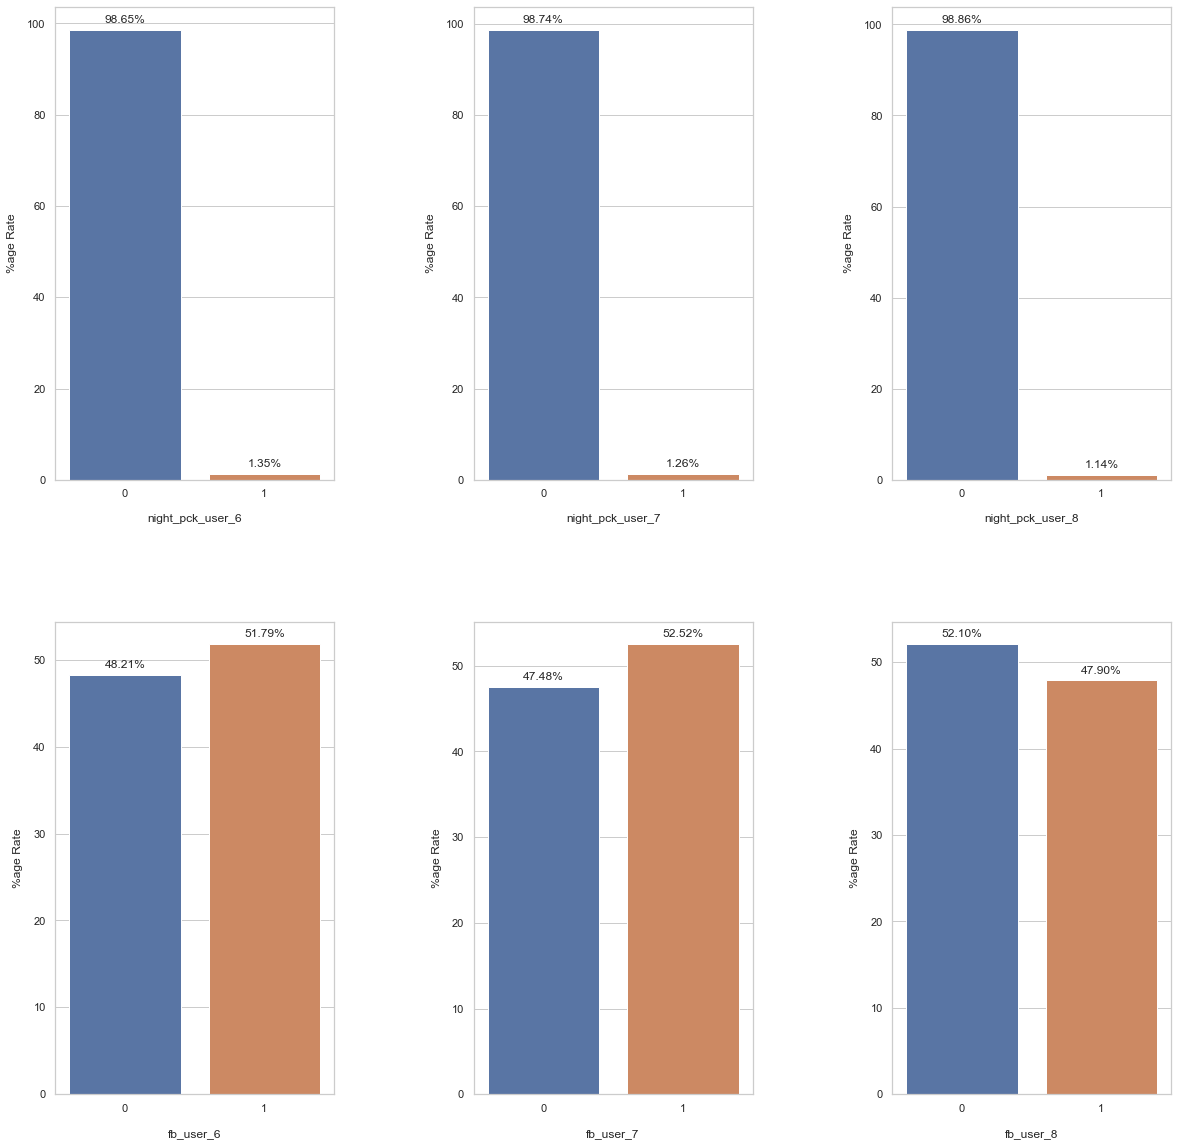

In [51]:
# categorical variables vs Percentage Rate
categorical_var = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (20, 20))

for col in categorical_var:
        
    series = round(((telecom_data[col].value_counts(dropna = False))/(len(telecom_data[col])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col, labelpad = 15)
    plt.ylabel('%age Rate', labelpad = 10)

    graph_labelling(ax)
    counter += 1

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the night_pck_user variables, inference can be drawn that 99% of users are not using nightly pack in all the 3 months.

Another observation is that that as the month increases, there is a decline in the fb usage.

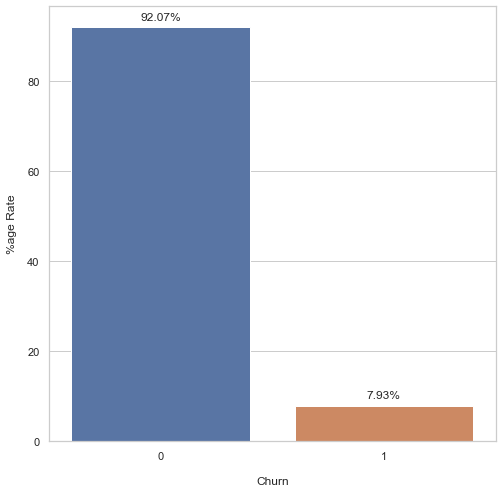

churned = 2364
not_churned = 27460
Ratio = 8.61%


In [52]:
churned = telecom_data[telecom_data["churn"] == 1].shape[0]
not_churned = telecom_data[telecom_data["churn"] == 0].shape[0]

plt.figure(figsize = (8, 8))

series = round(((telecom_data["churn"].value_counts(dropna = False))/(len(telecom_data["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('%age Rate', labelpad = 10)

graph_labelling(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()


print(f"churned = {churned}")
print(f"not_churned = {not_churned}")
print(f"Ratio = {(churned / not_churned) * 100:.2f}%")


Dataset is highly imbalanced. Proportion for churn to non-churn is somewhat around 8%.

Class is equipped with imbalance problem

### Univariate Analysis - Quantitative Variables

In [53]:
def univariate(xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (20, 10))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    plt.subplot(1, 2, 1)
    sns.distplot(data[x_axis], hist = True, kde = True, color = 'b')
    plt.title(title_1)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

    plt.subplot(1, 2, 2)

    sns.boxplot(x = x_axis, data = data, color = 'r')
    plt.title(title_2)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

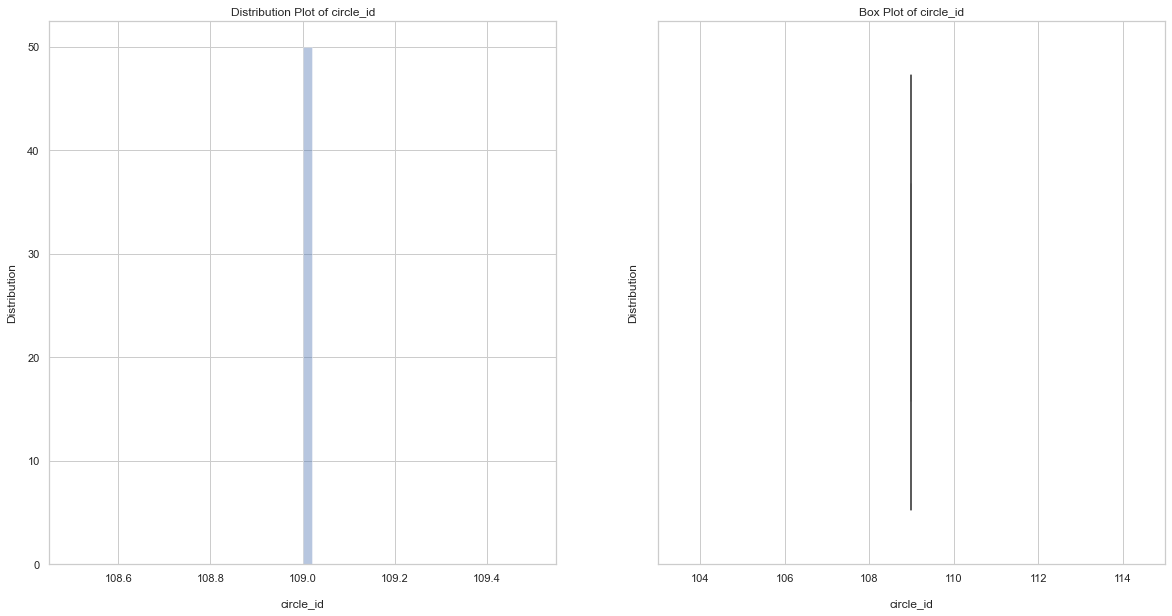

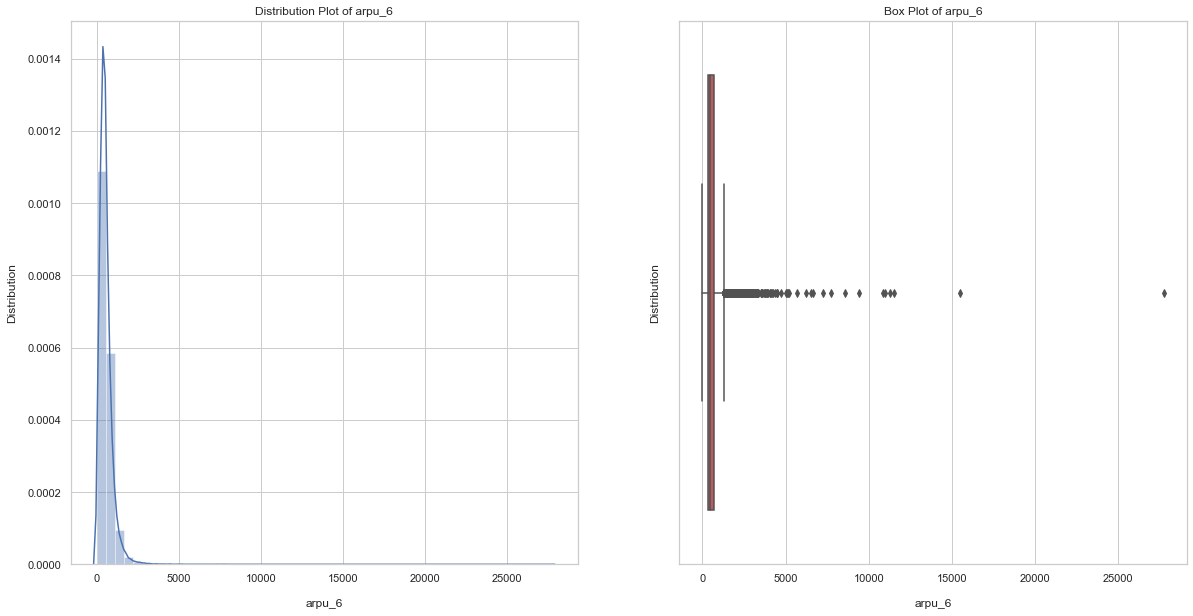

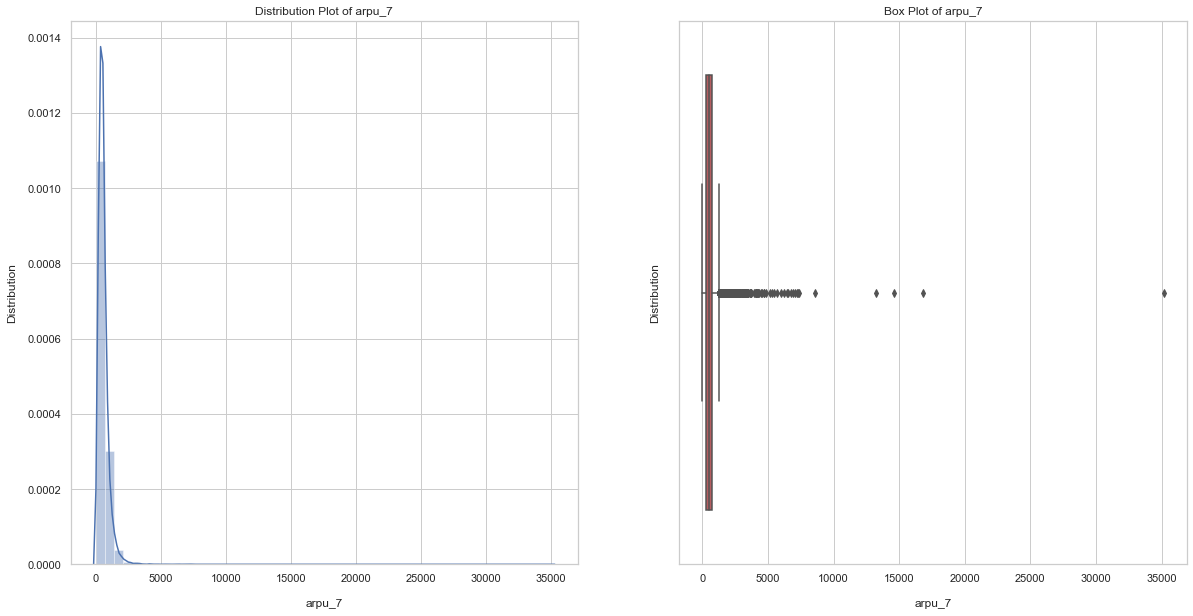

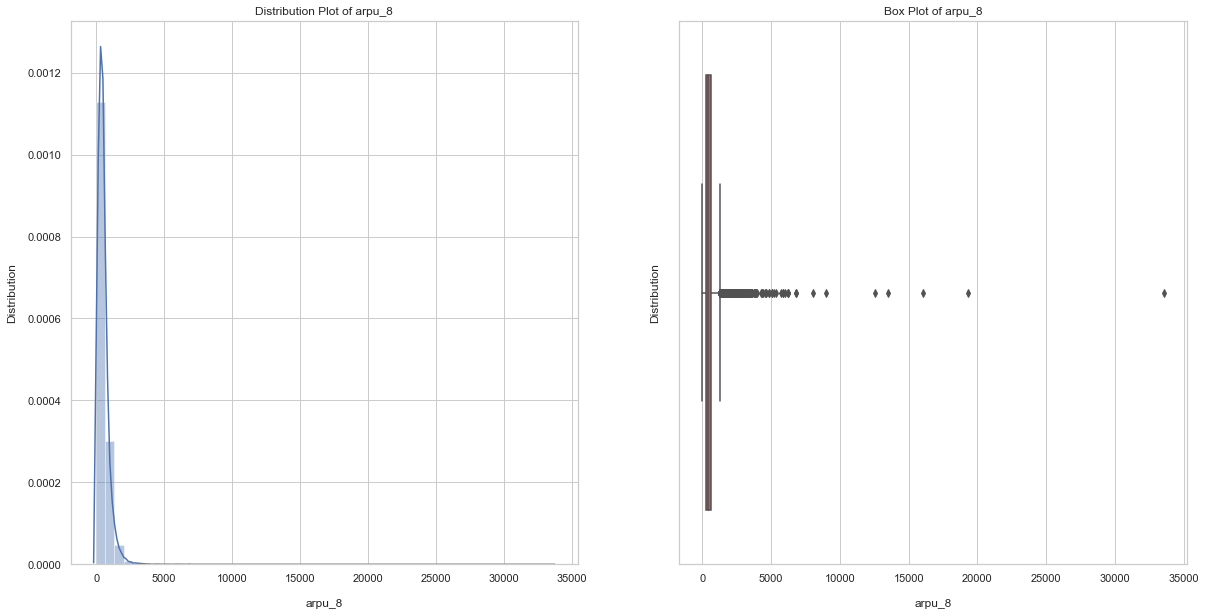

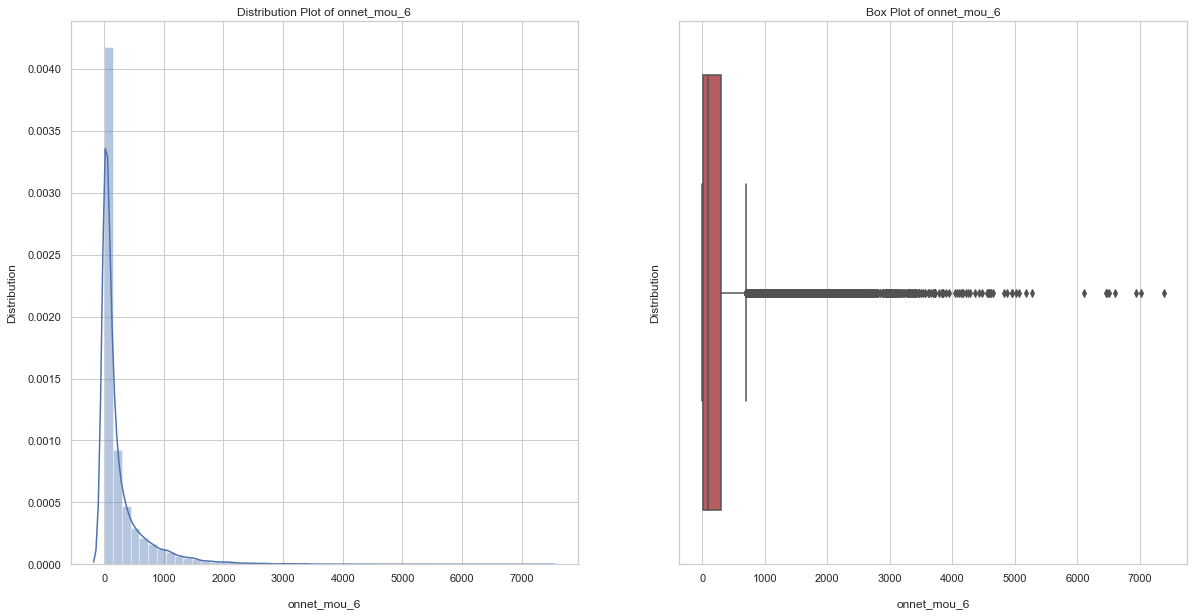

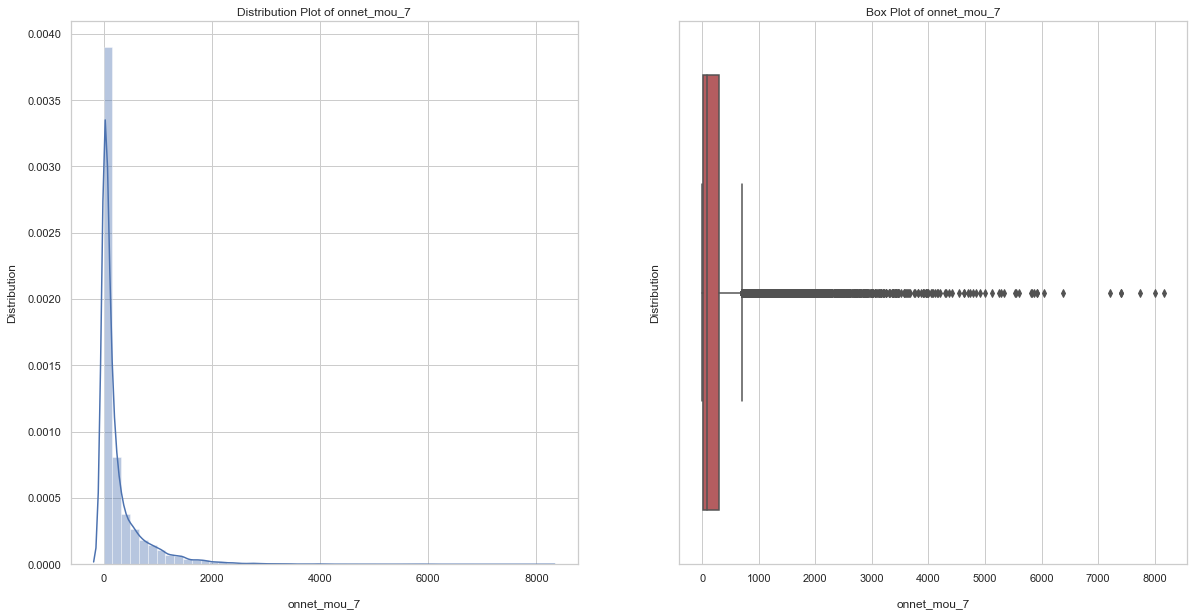

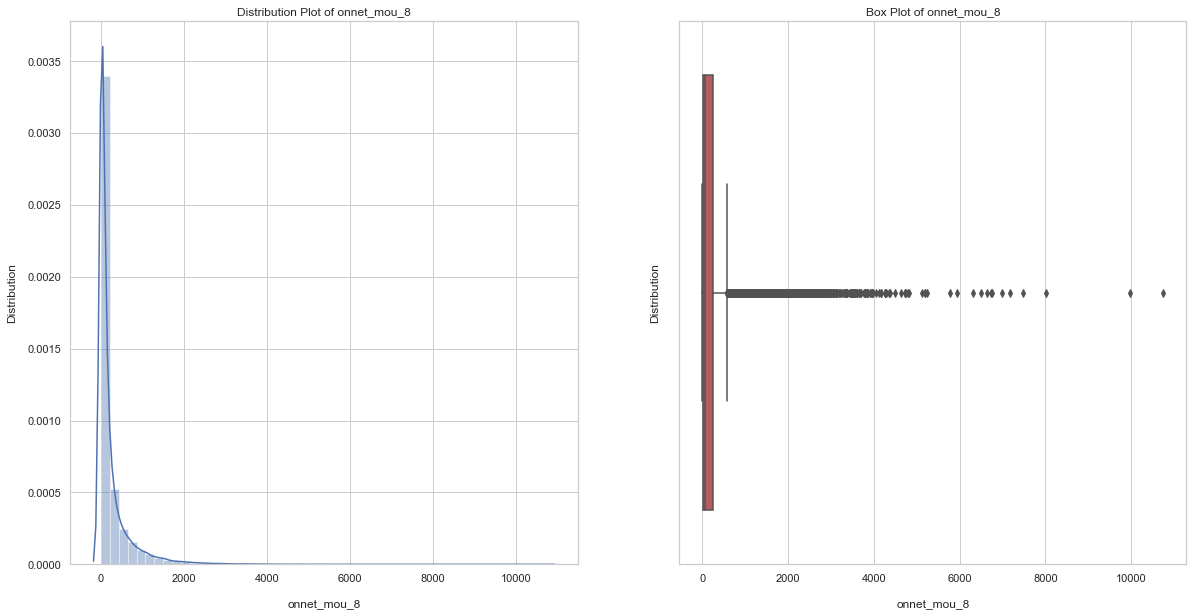

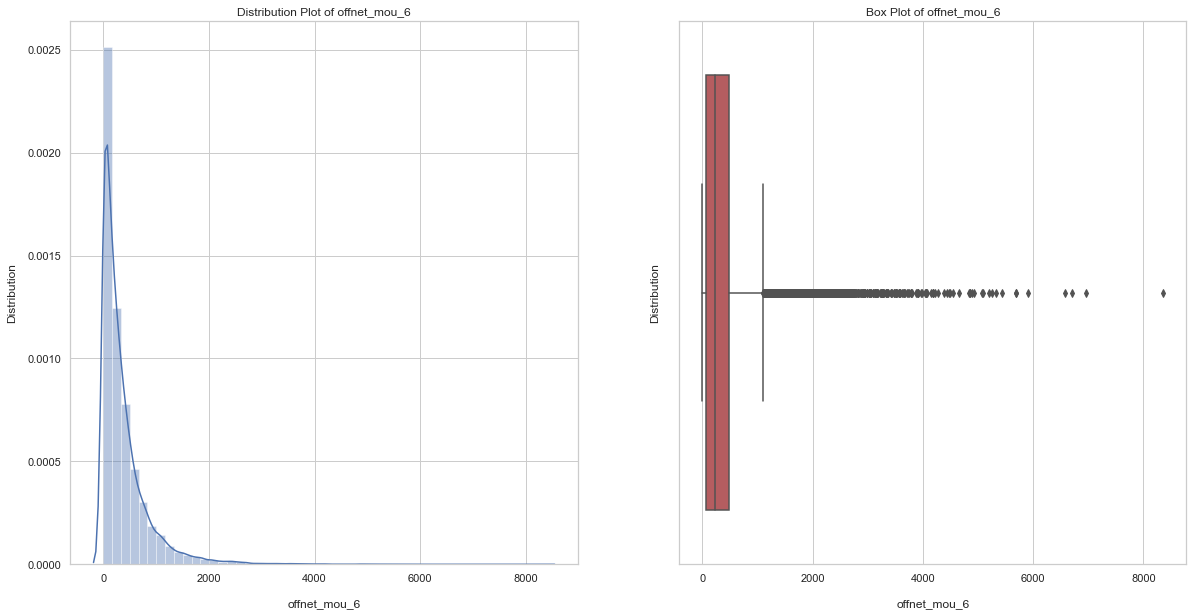

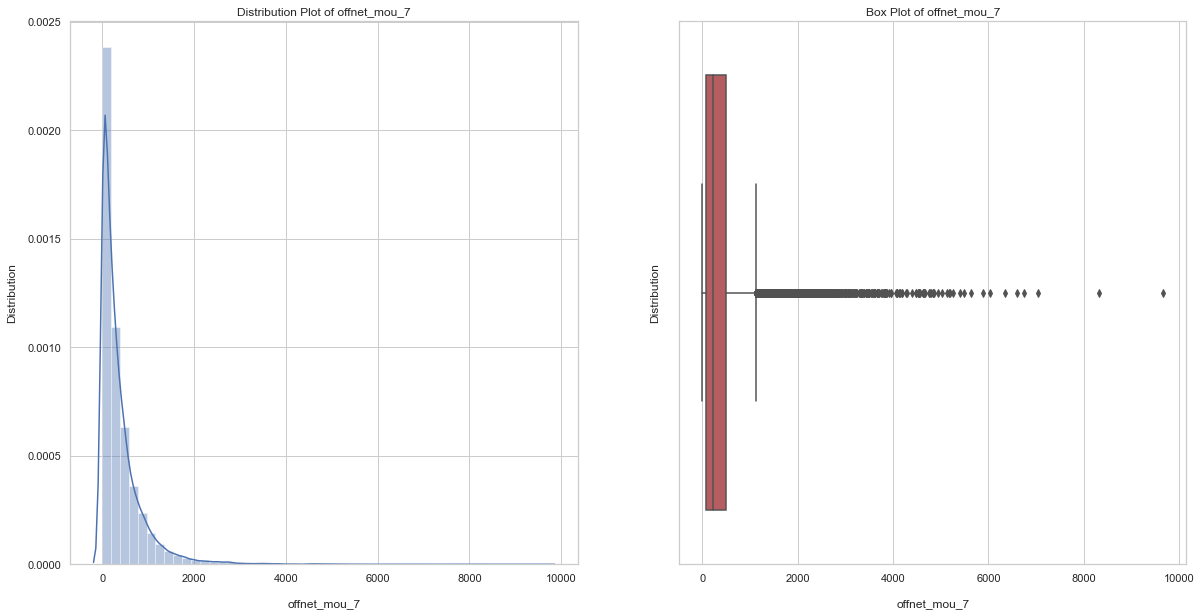

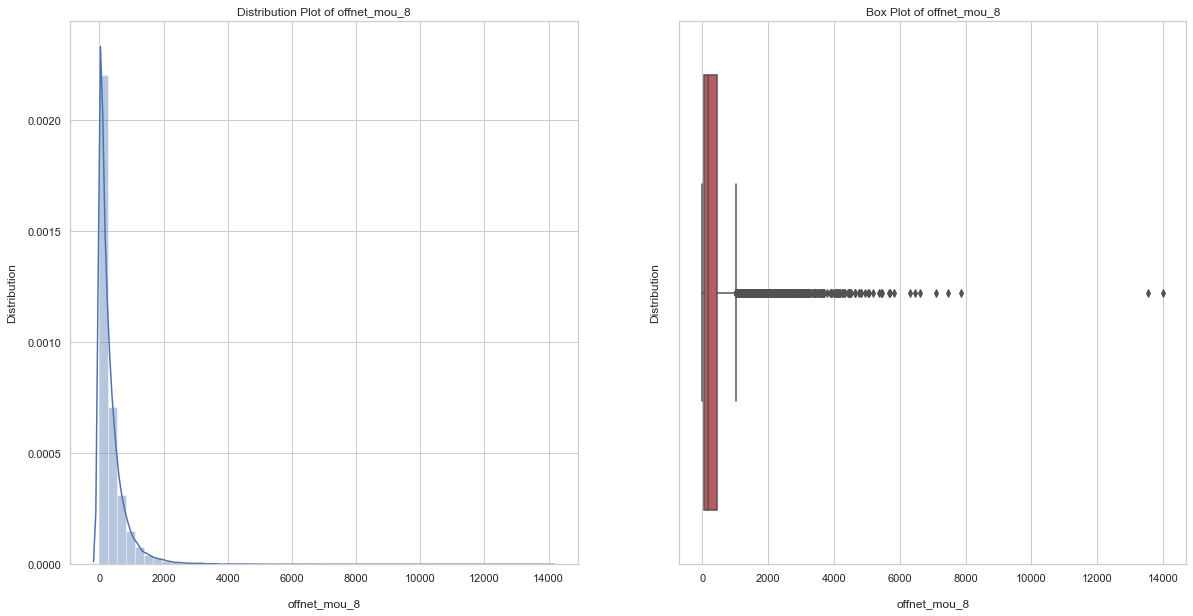

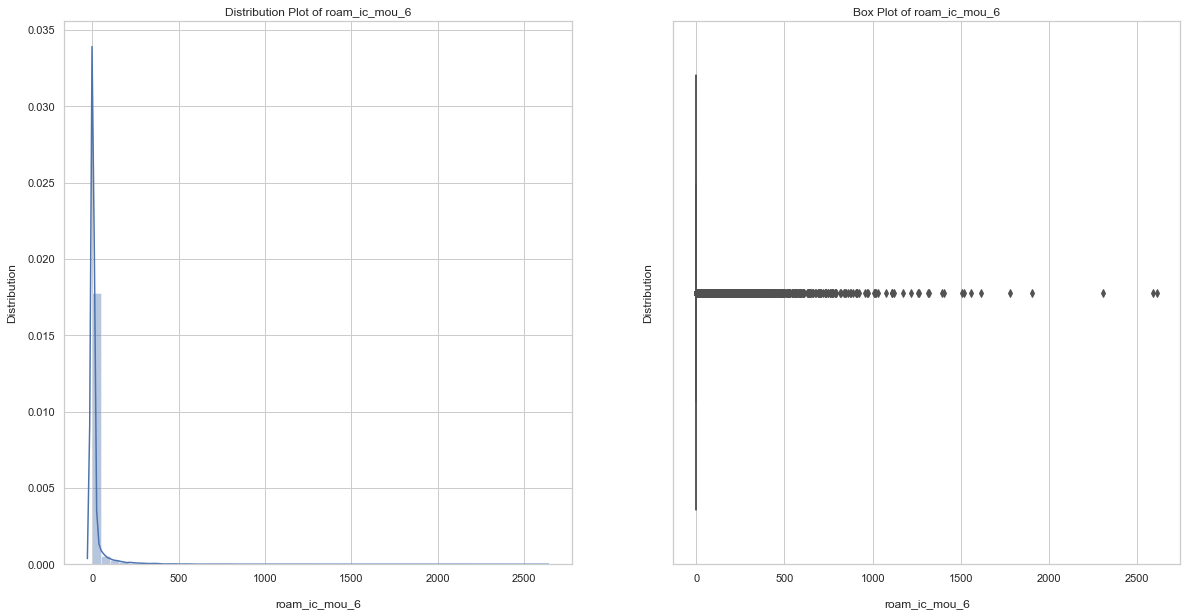

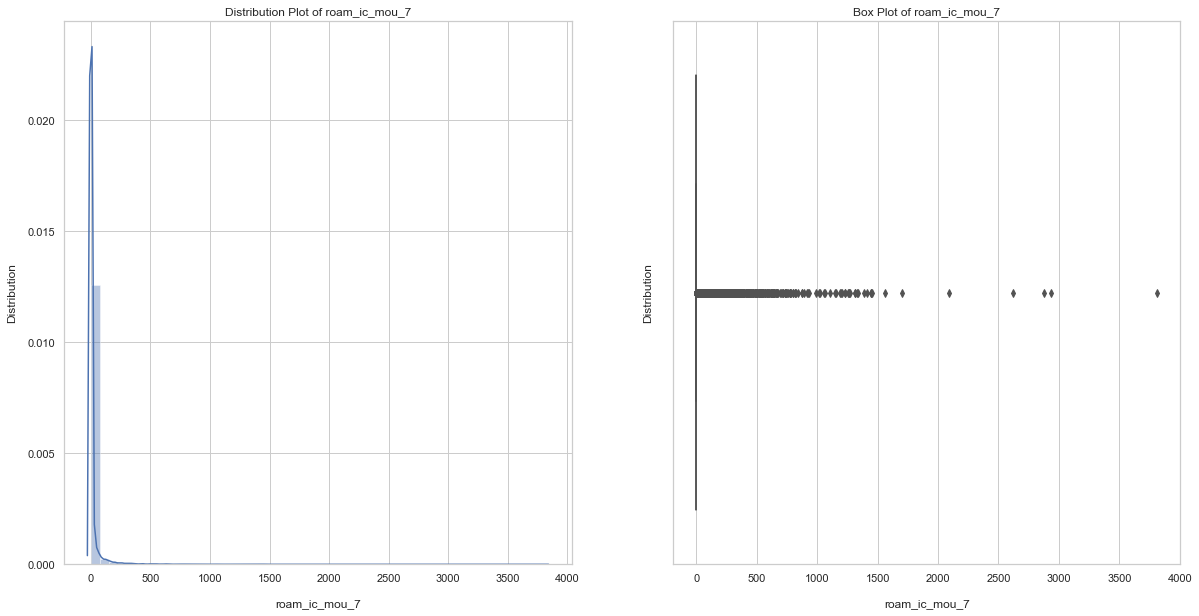

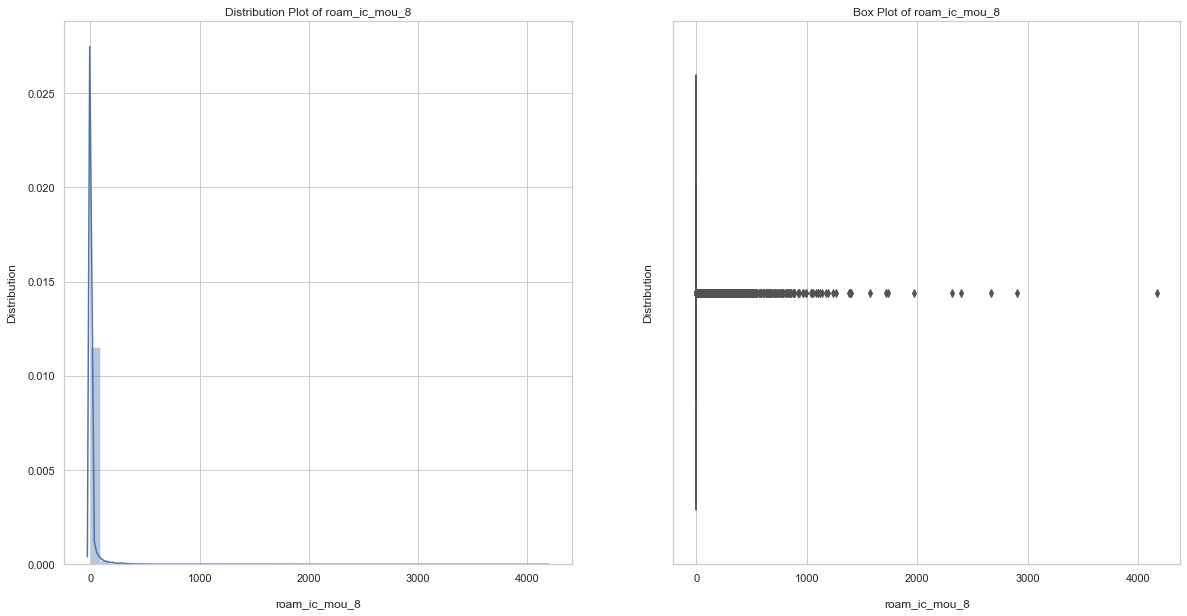

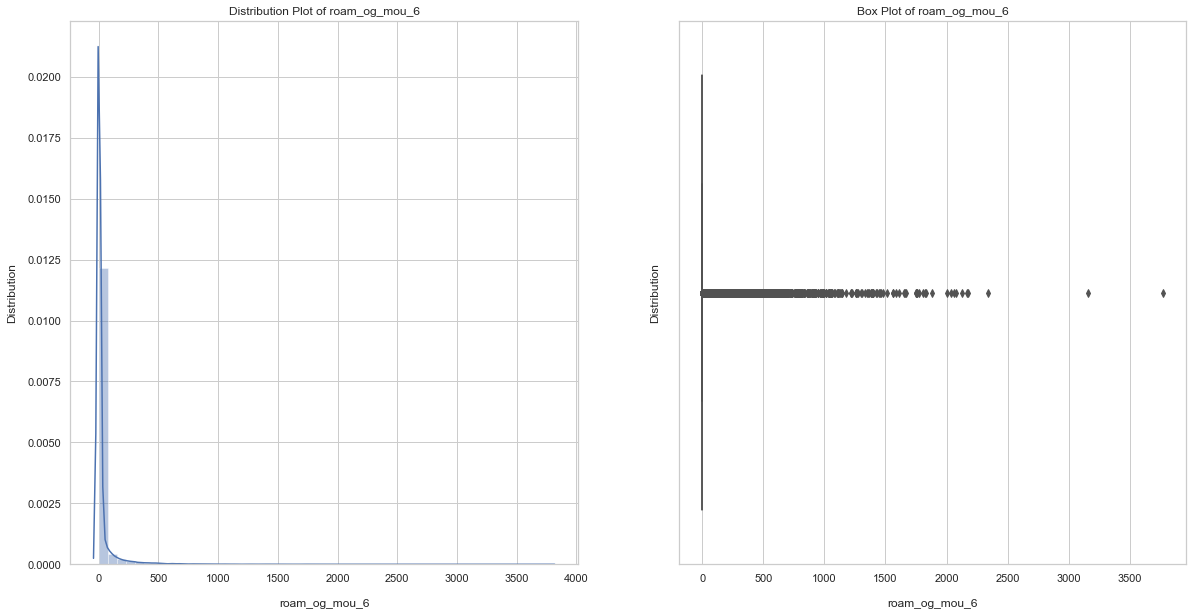

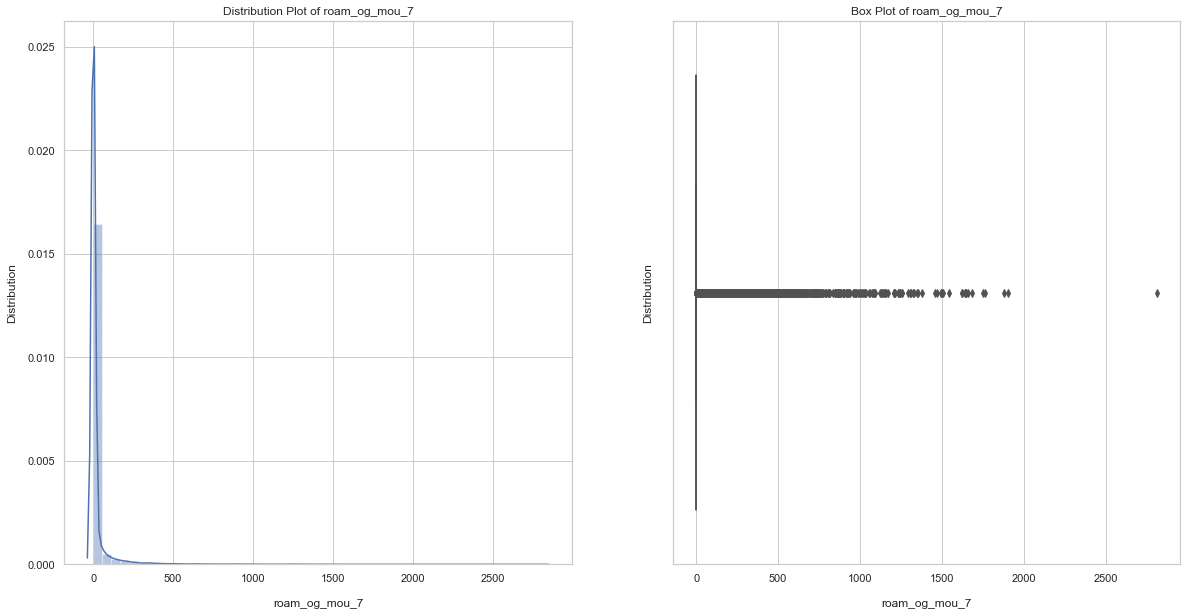

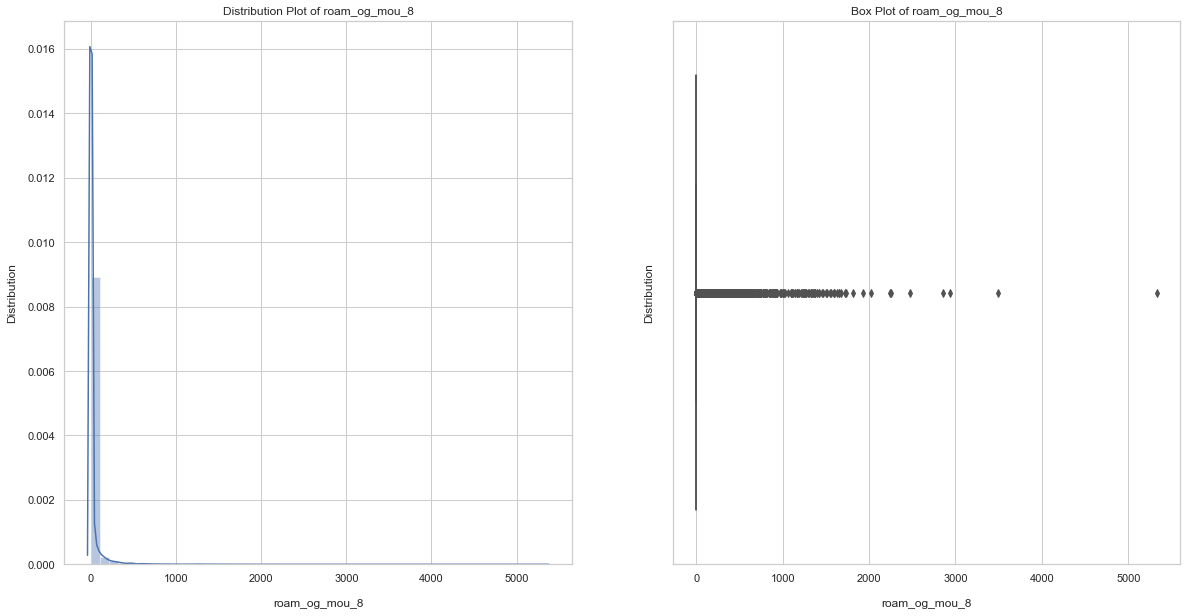

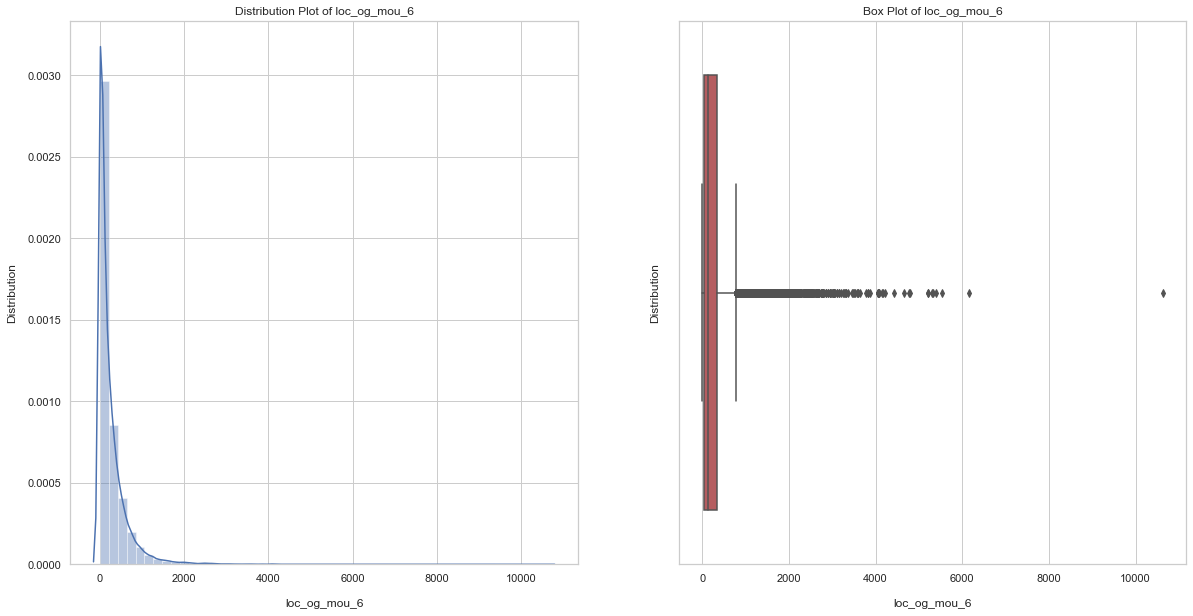

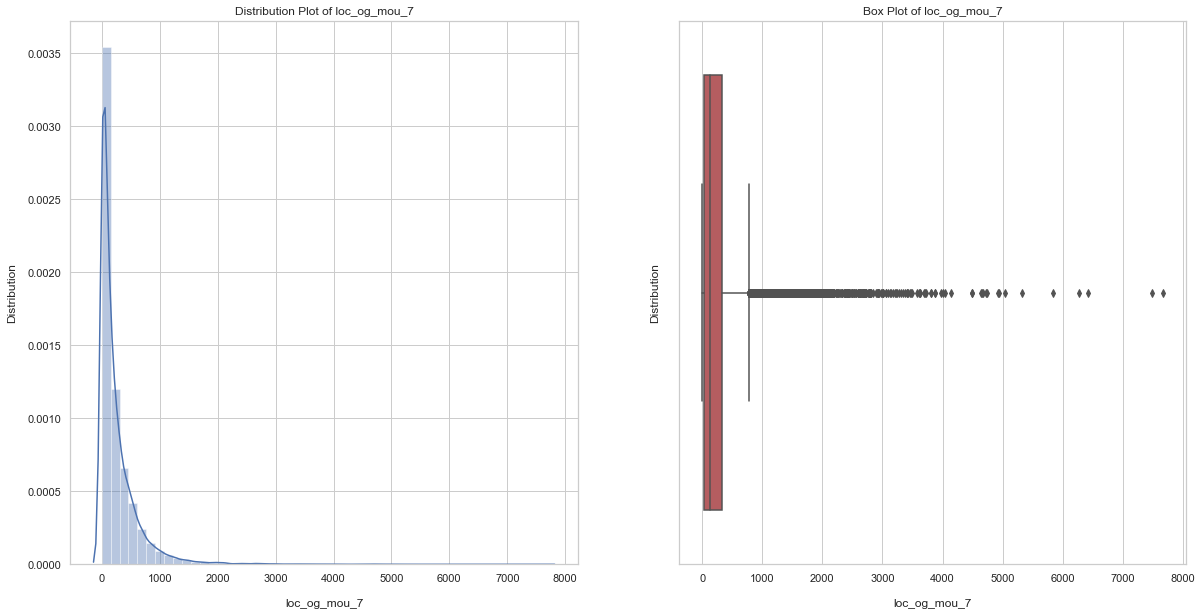

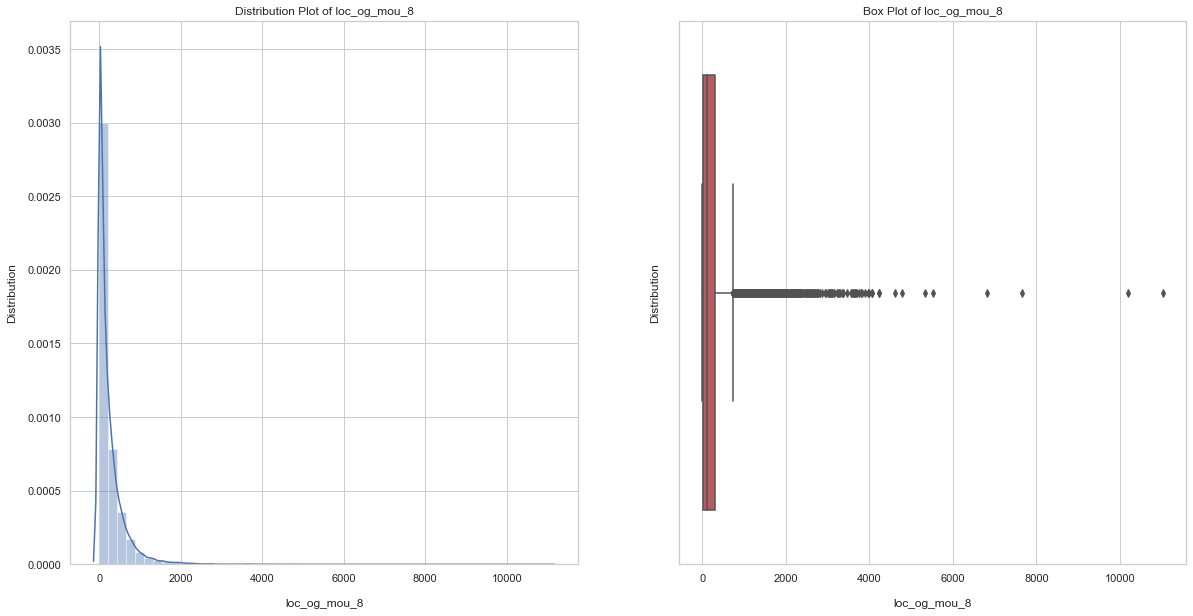

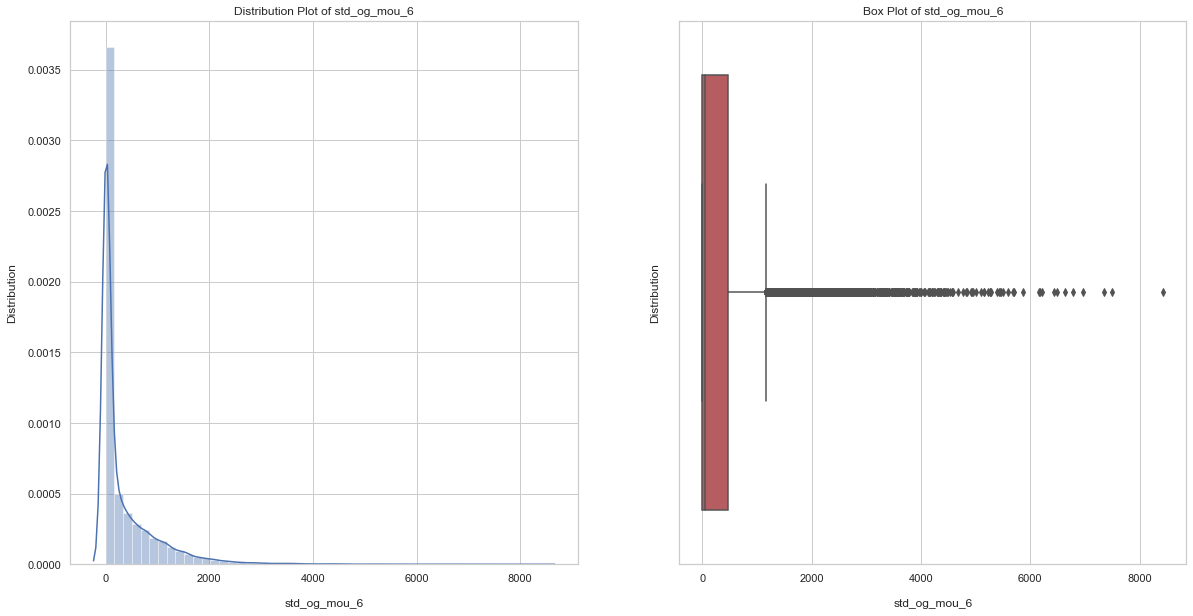

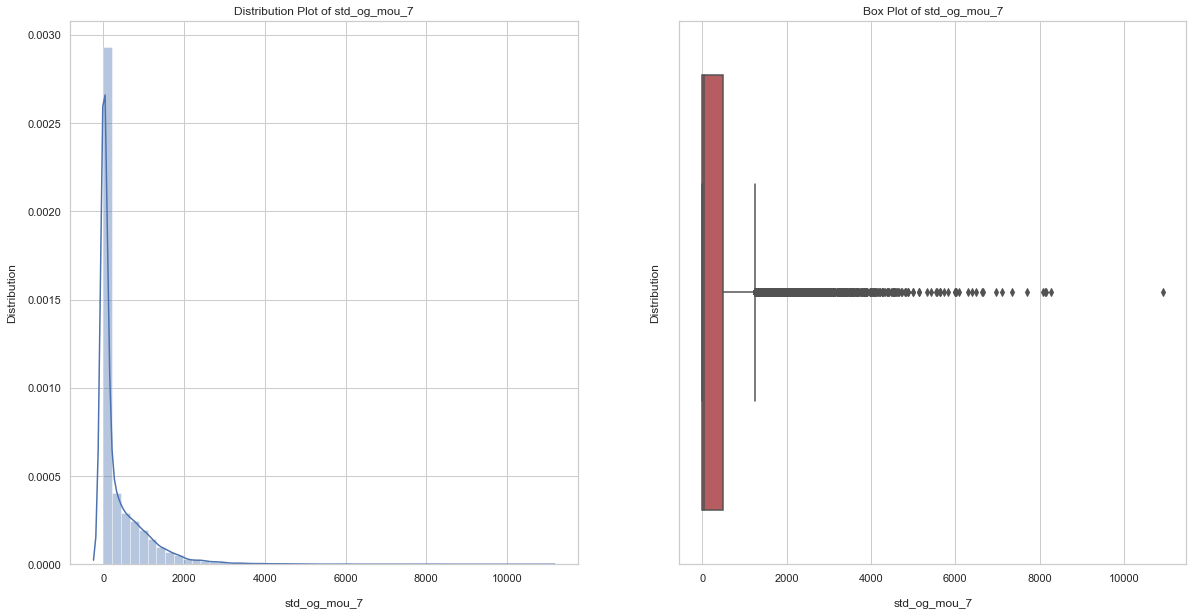

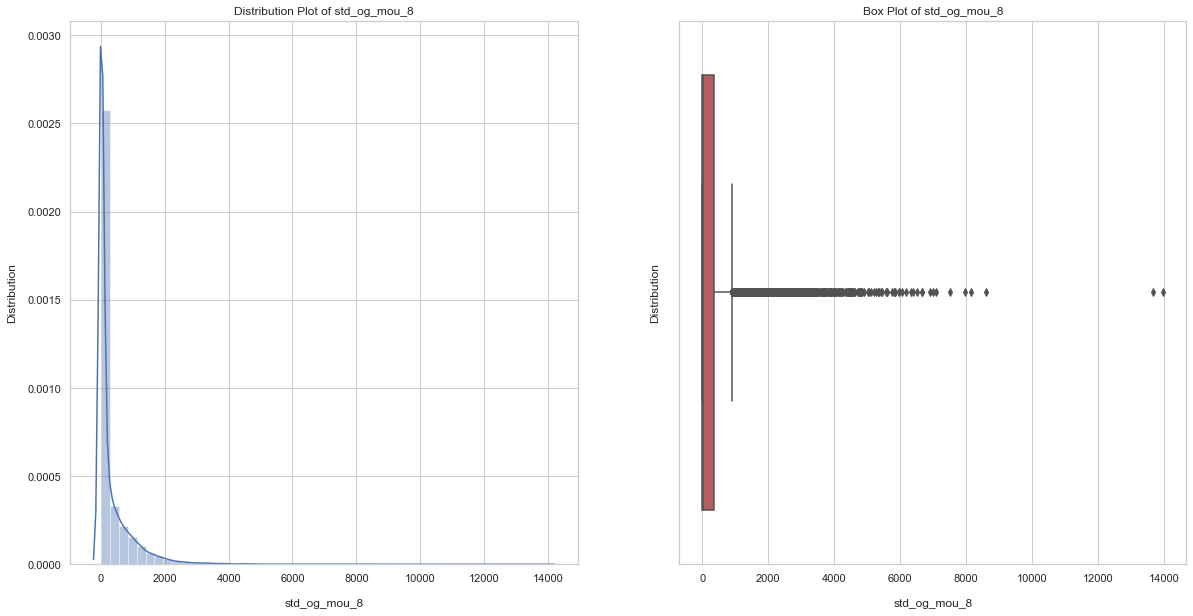

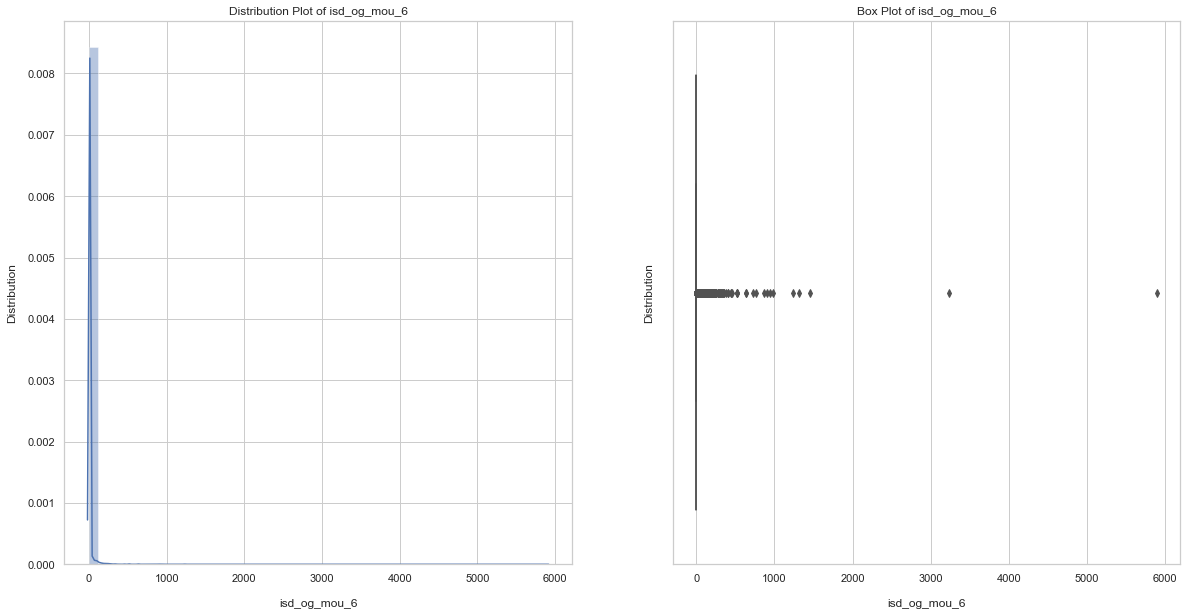

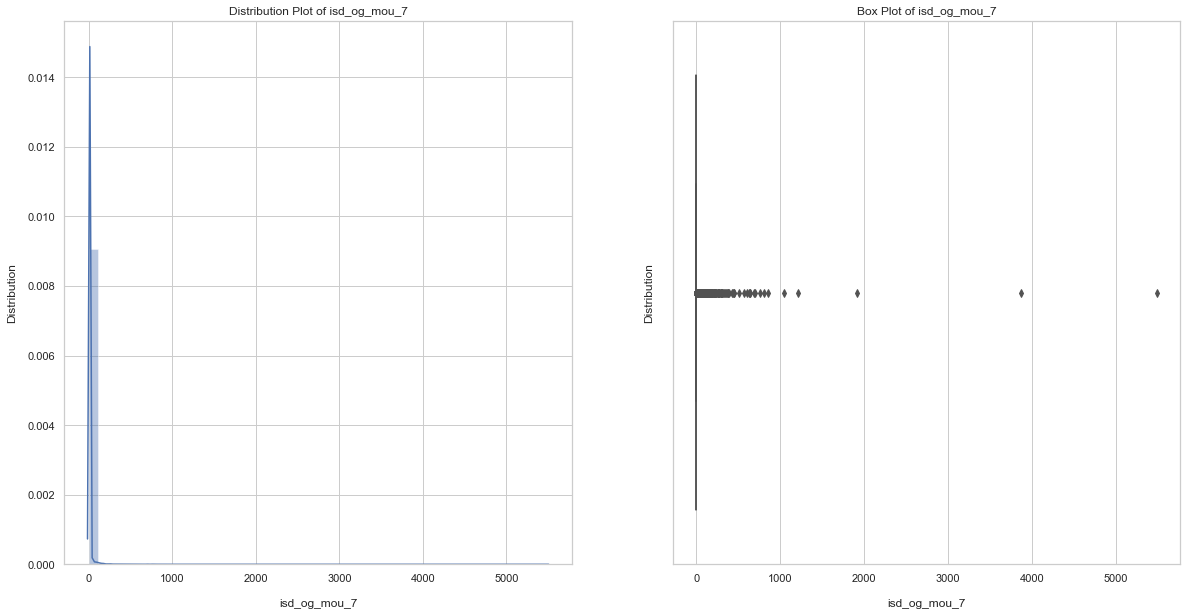

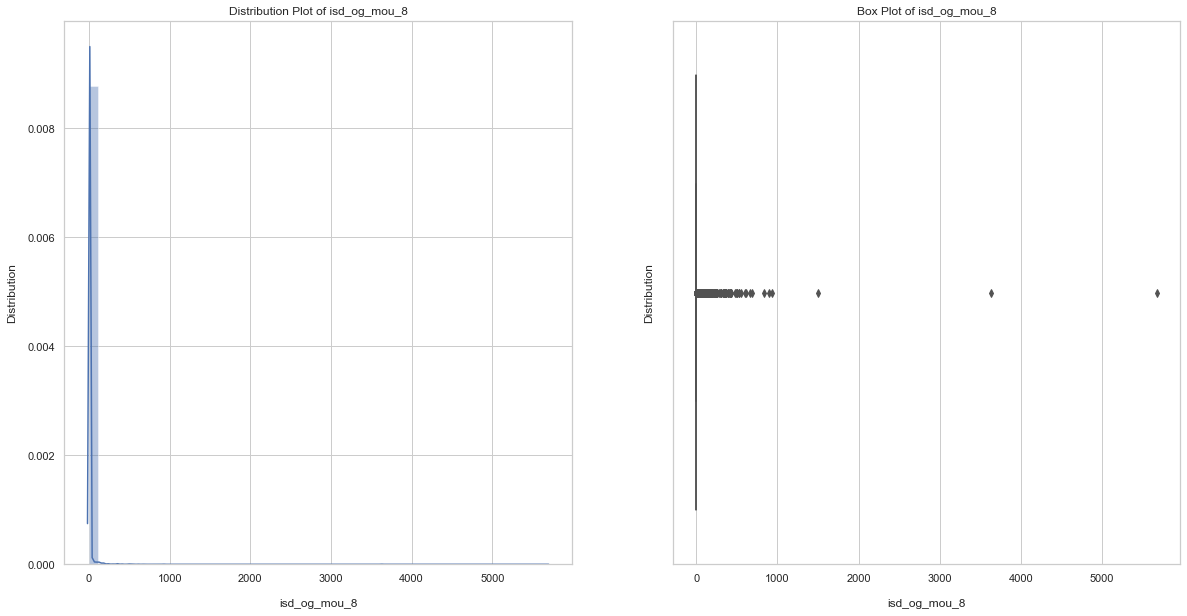

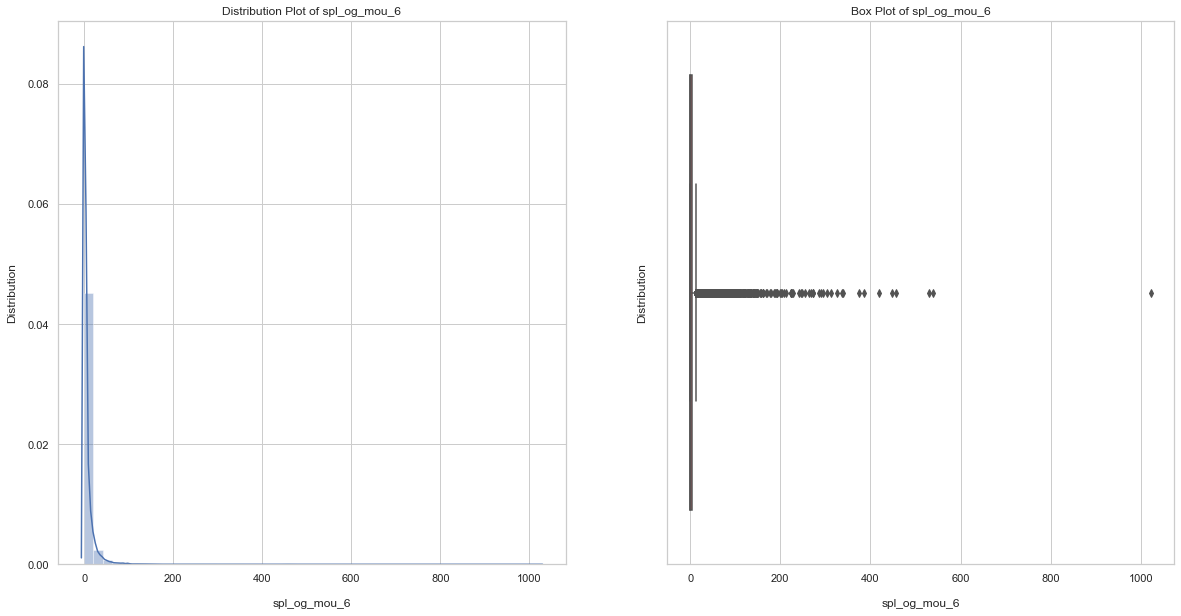

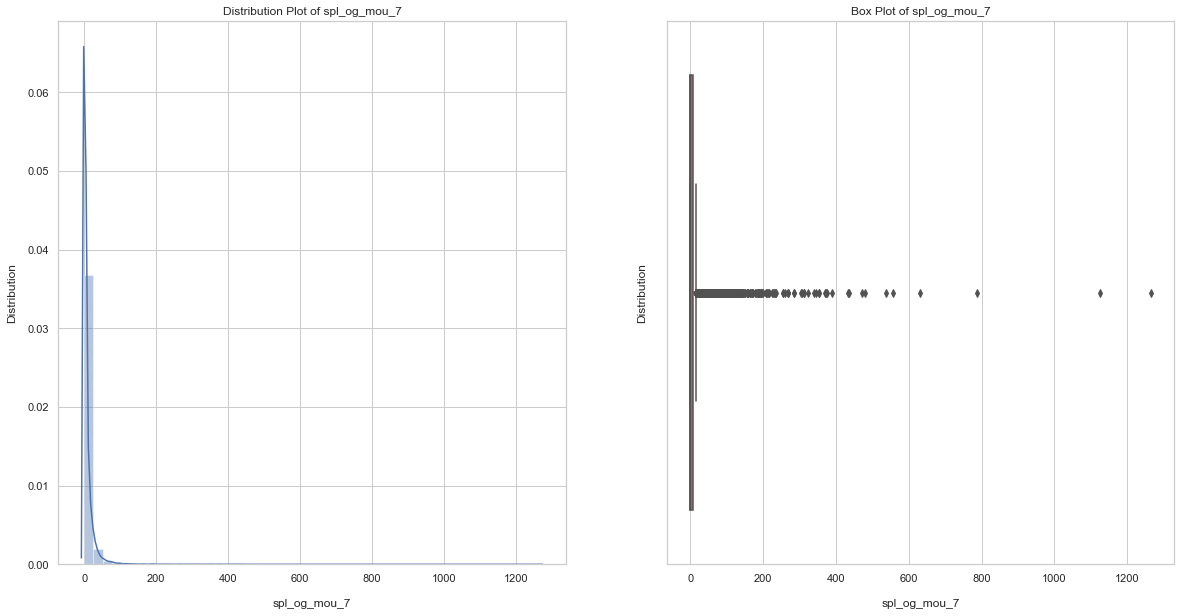

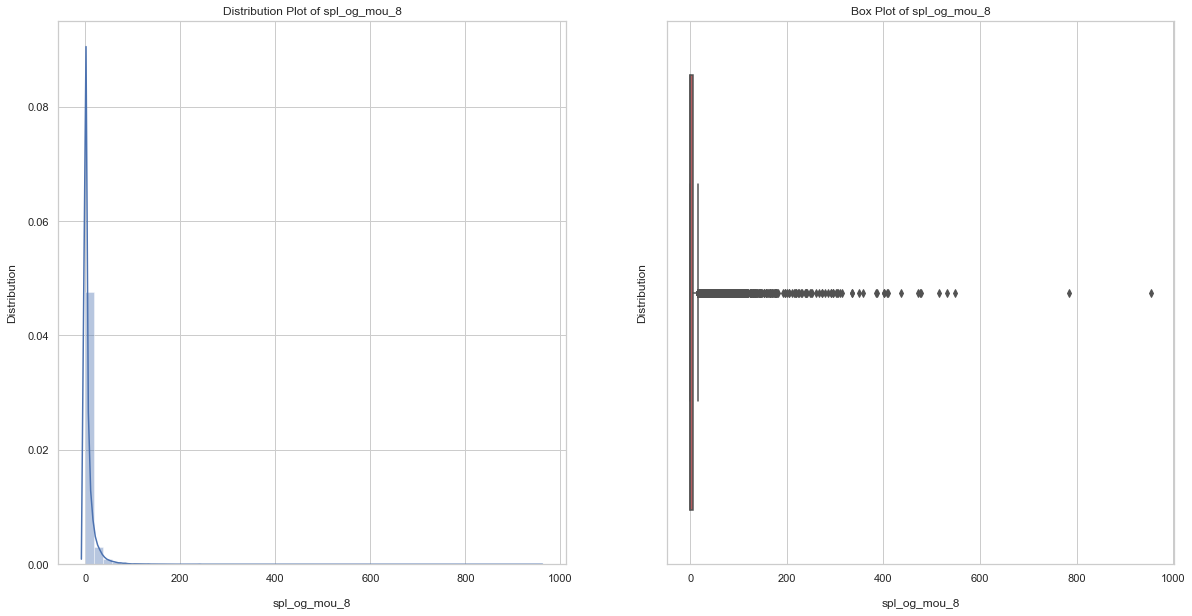

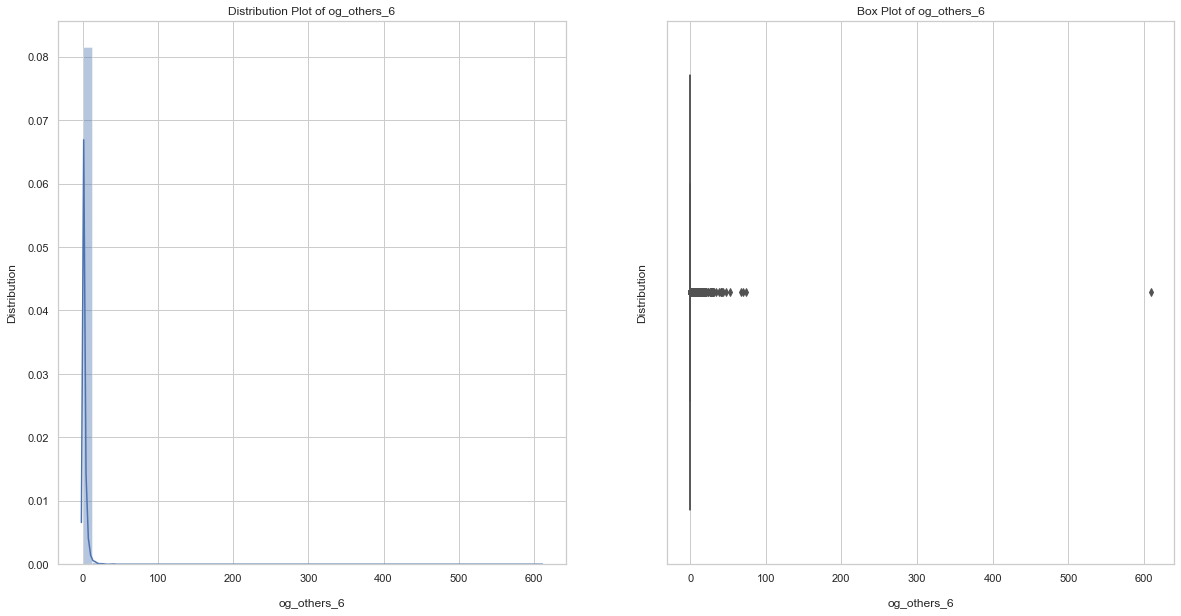

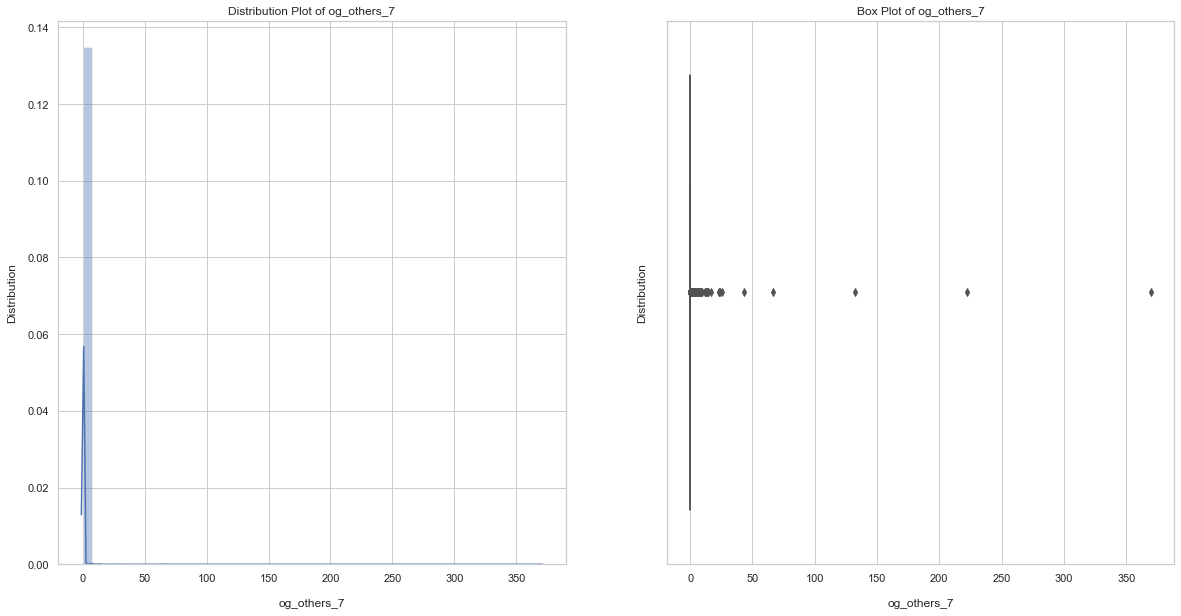

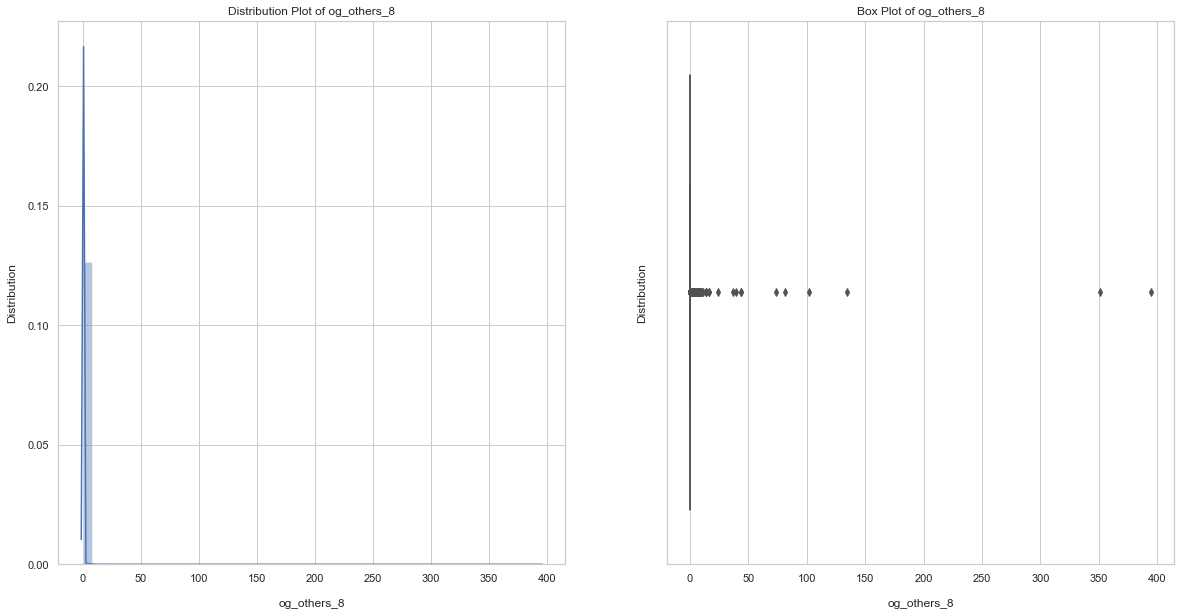

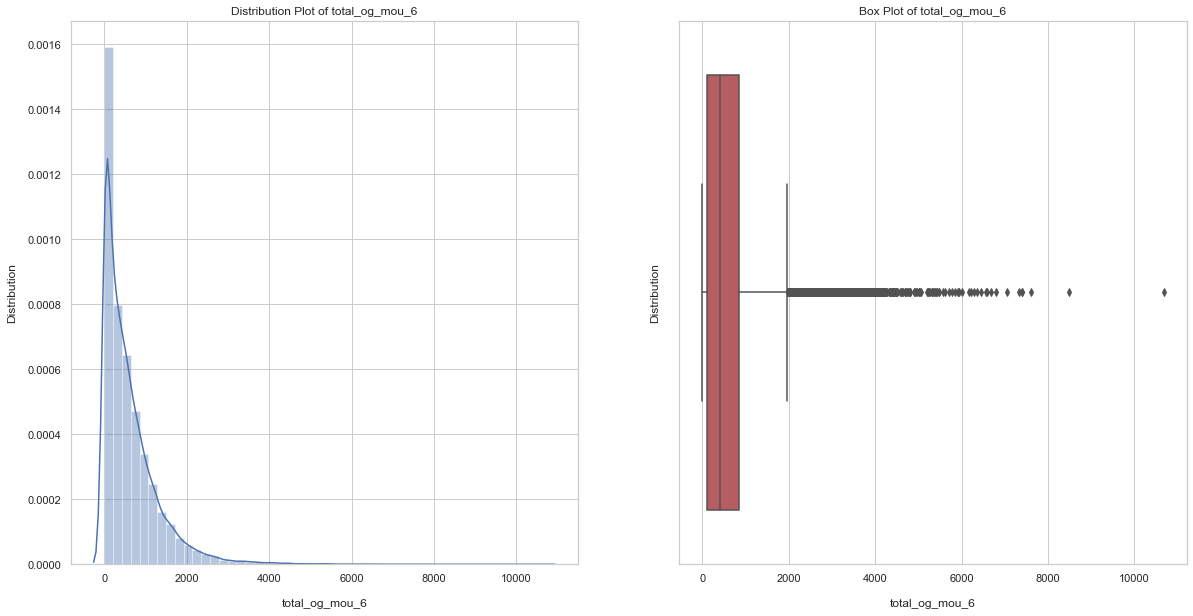

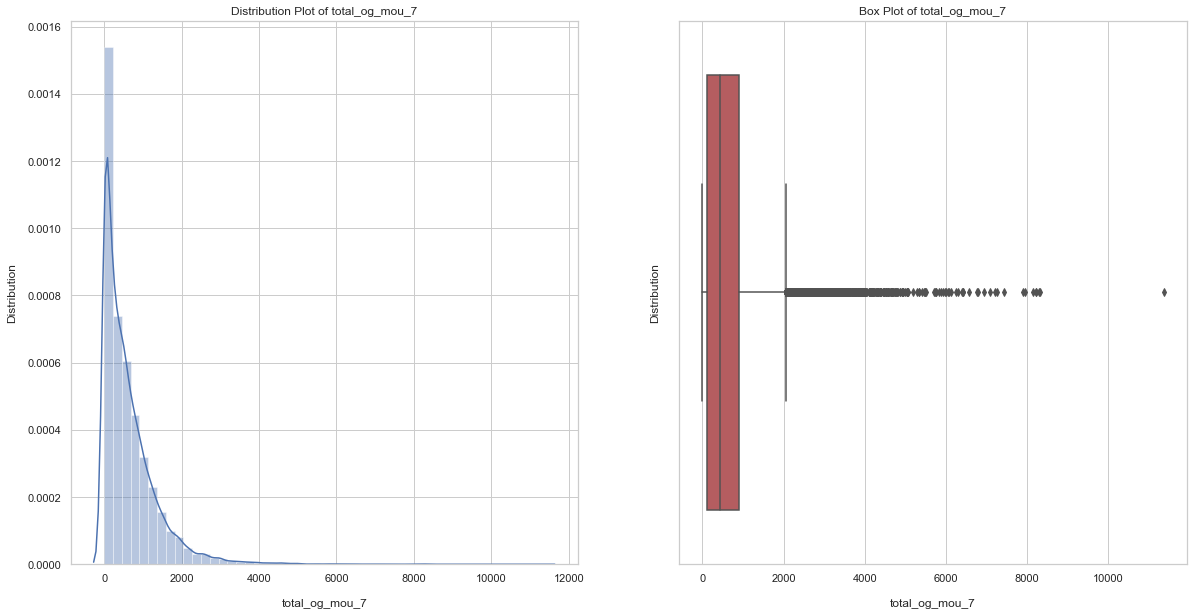

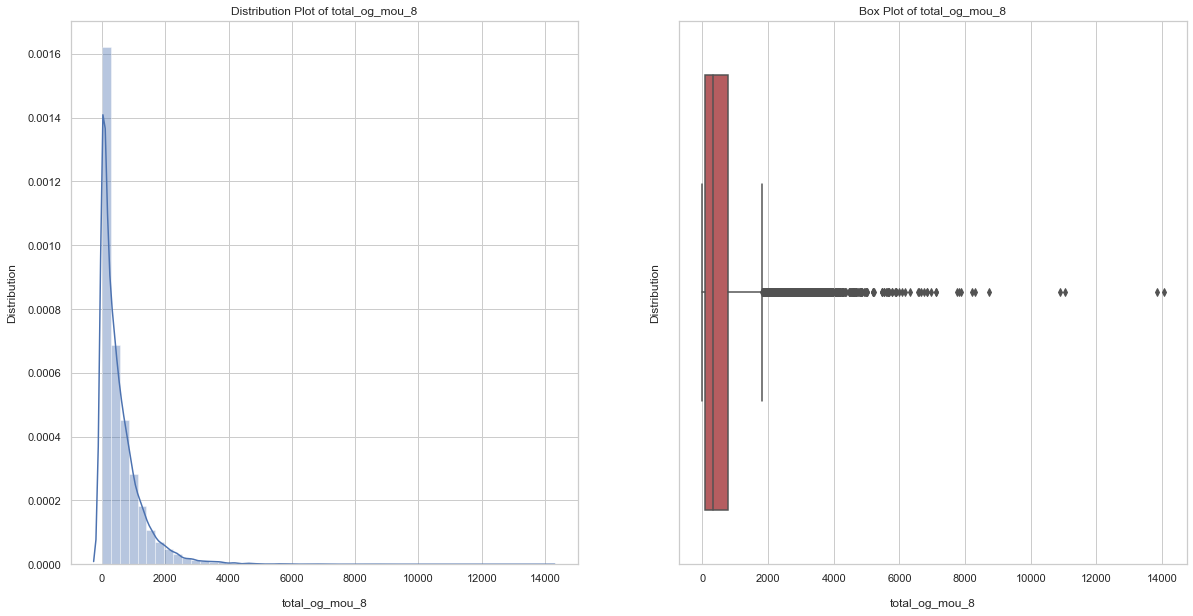

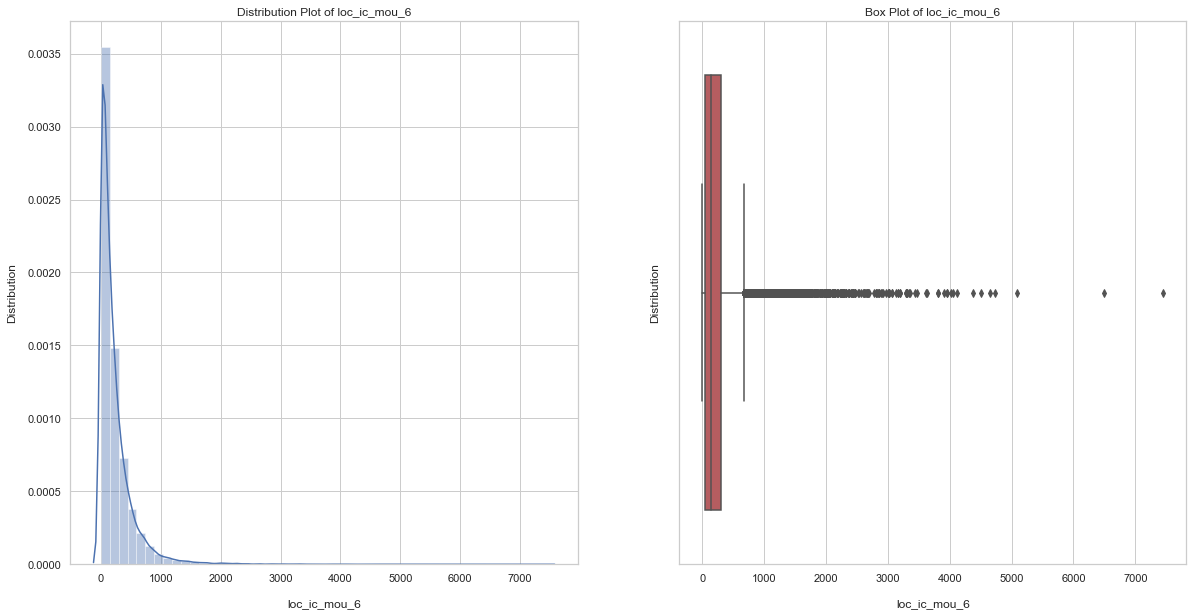

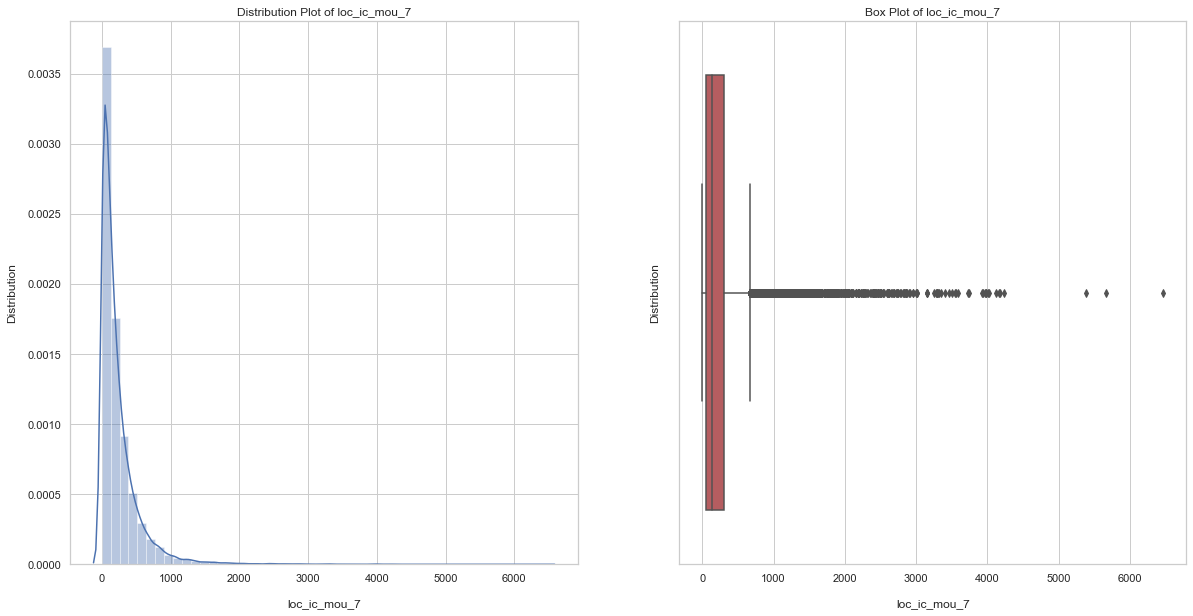

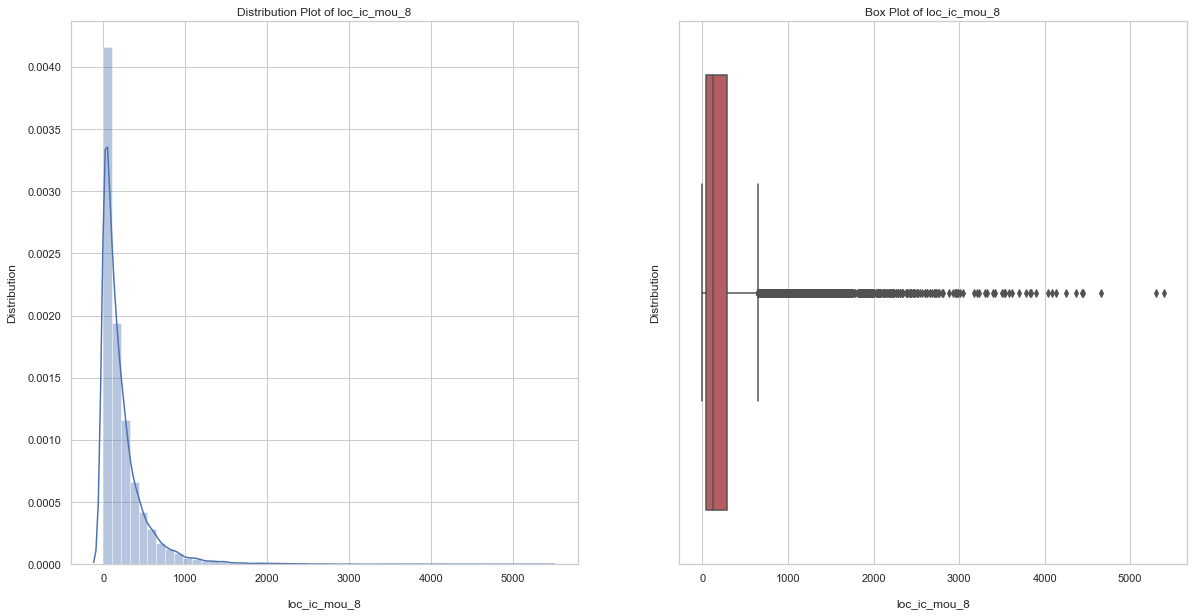

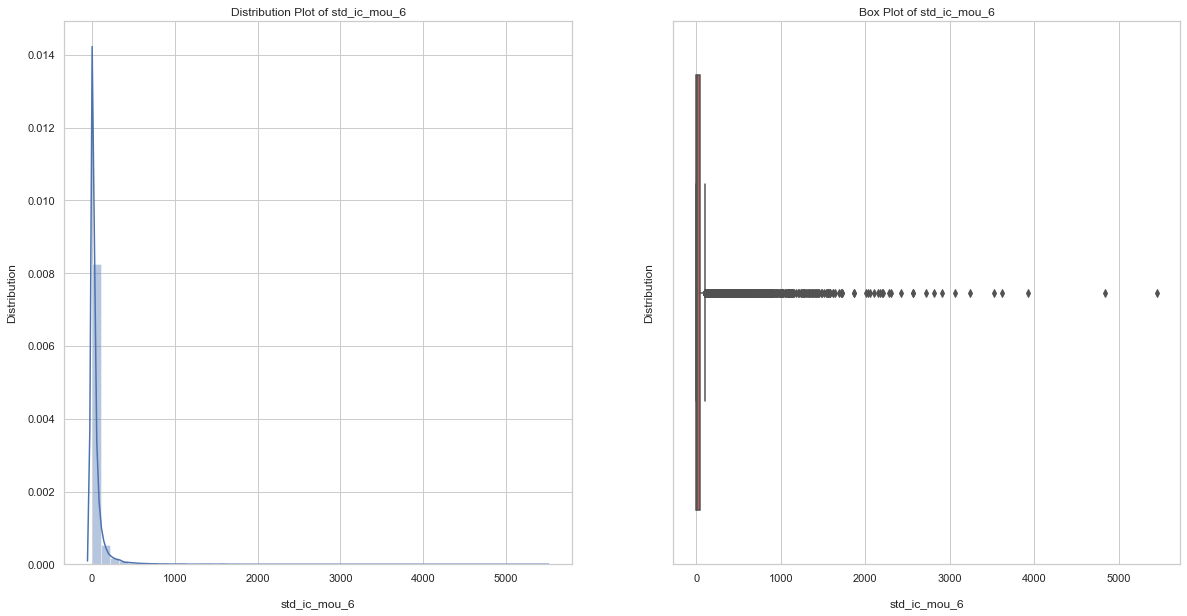

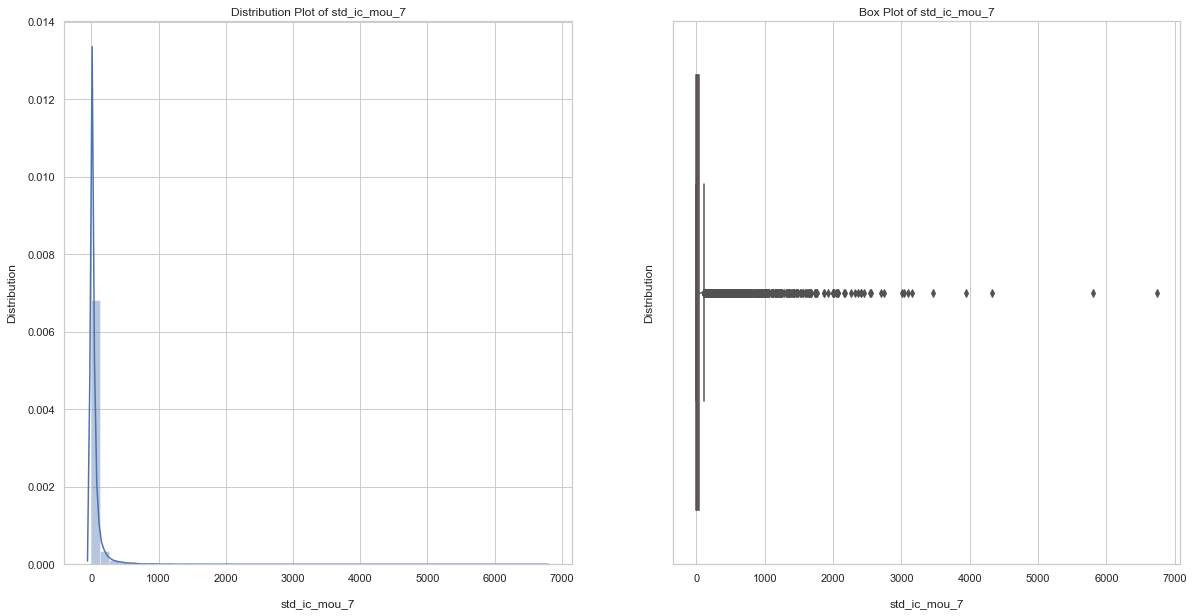

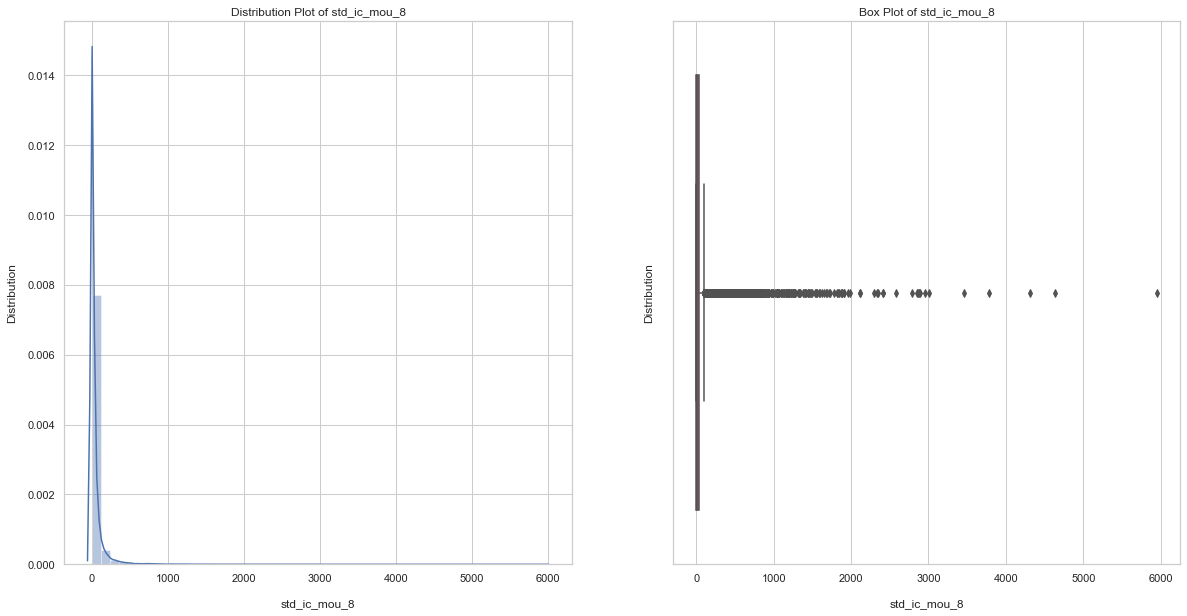

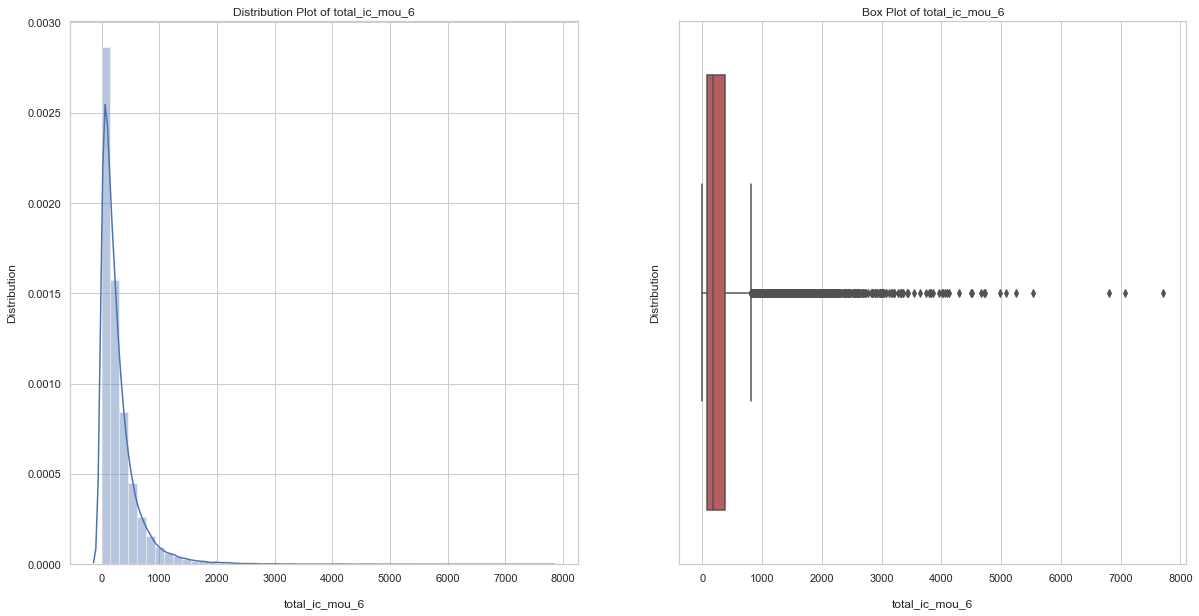

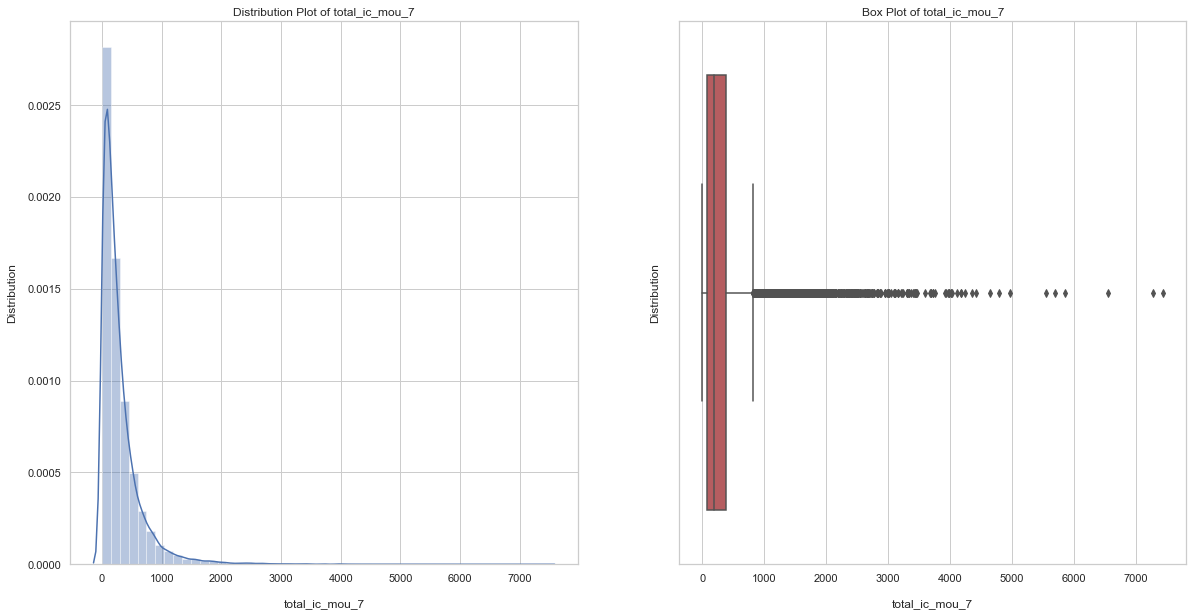

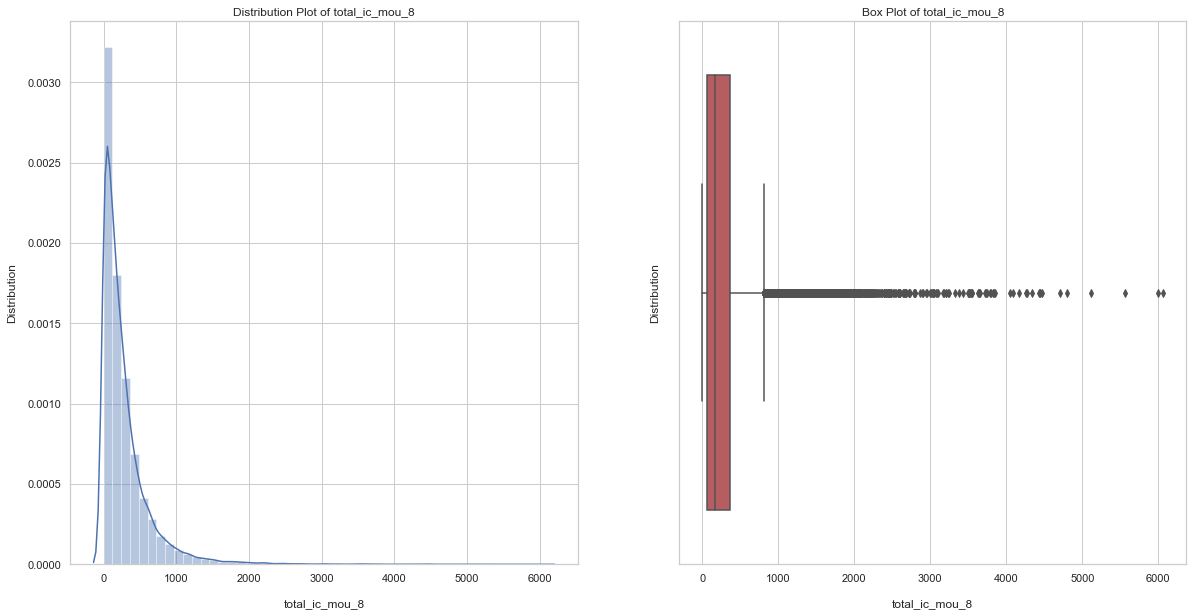

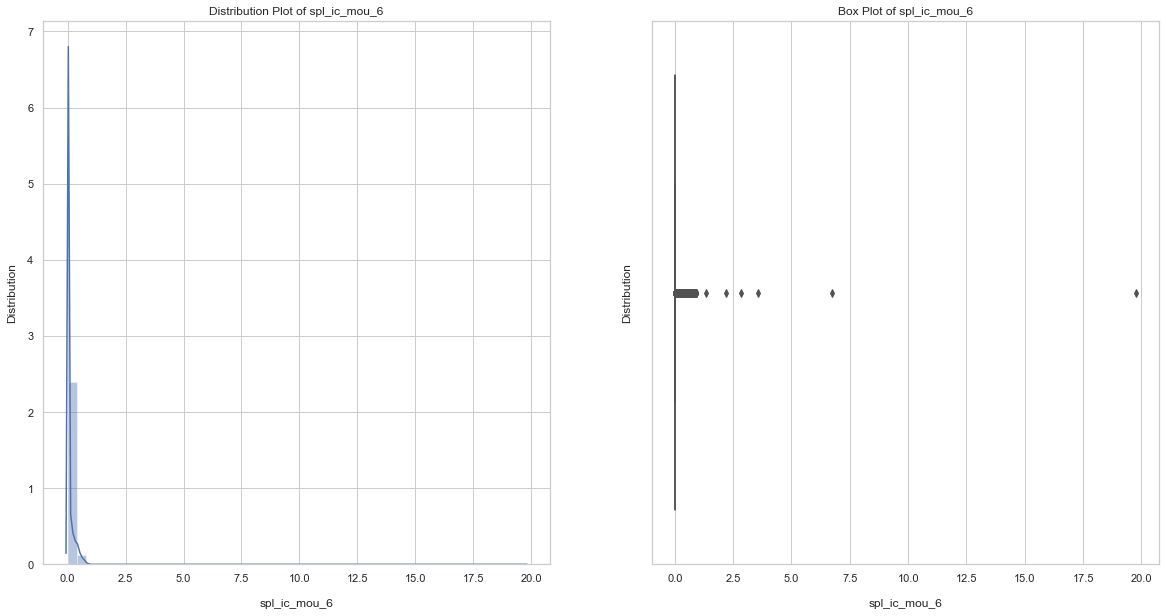

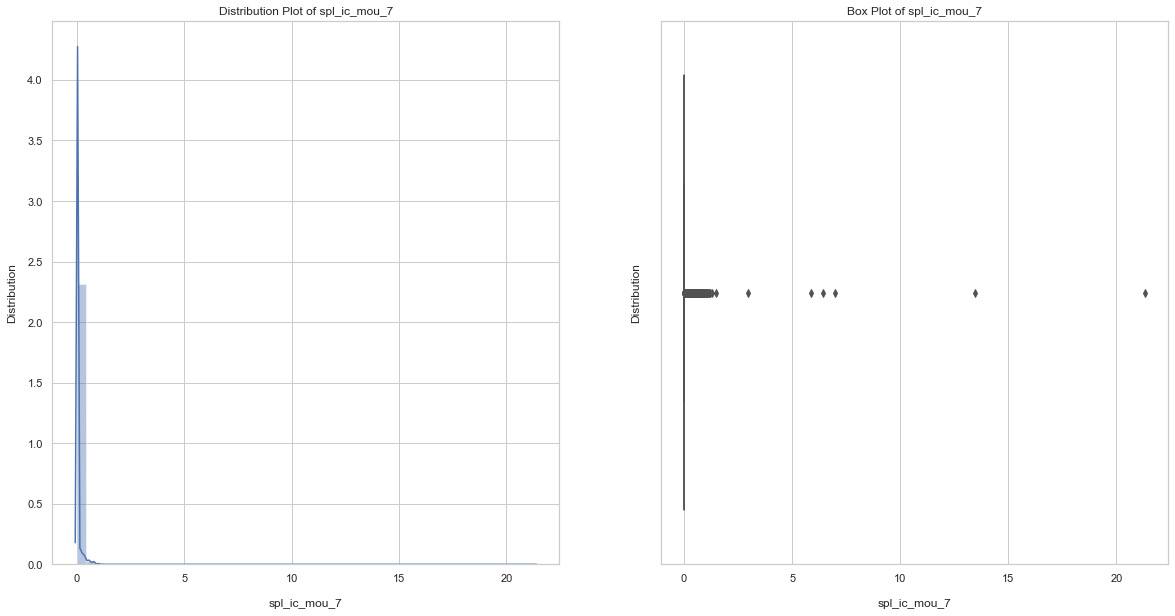

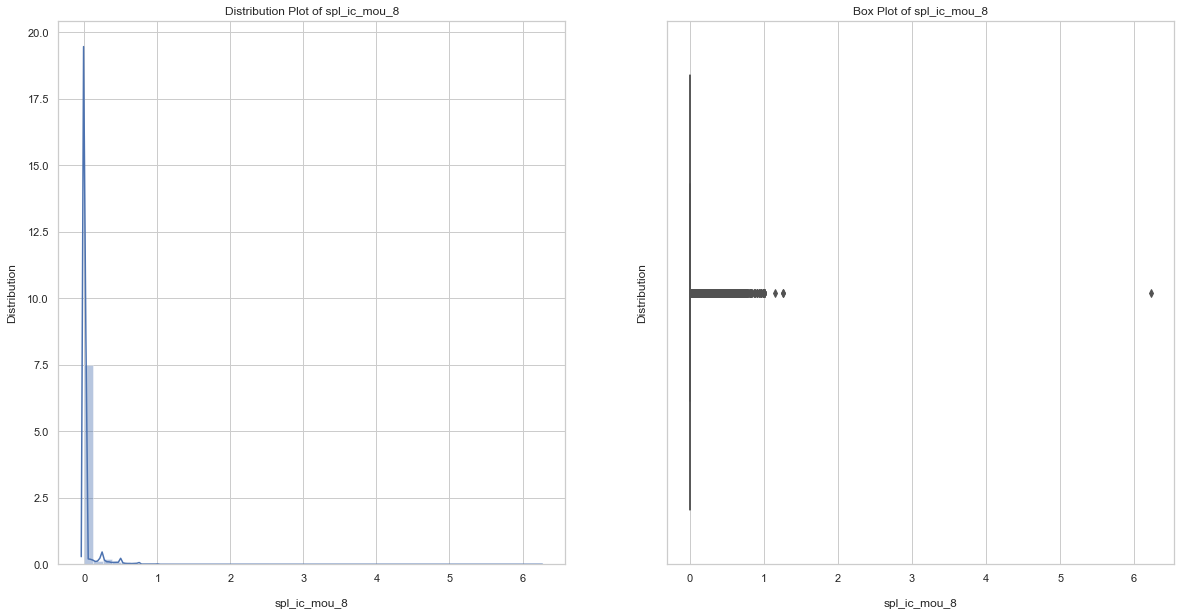

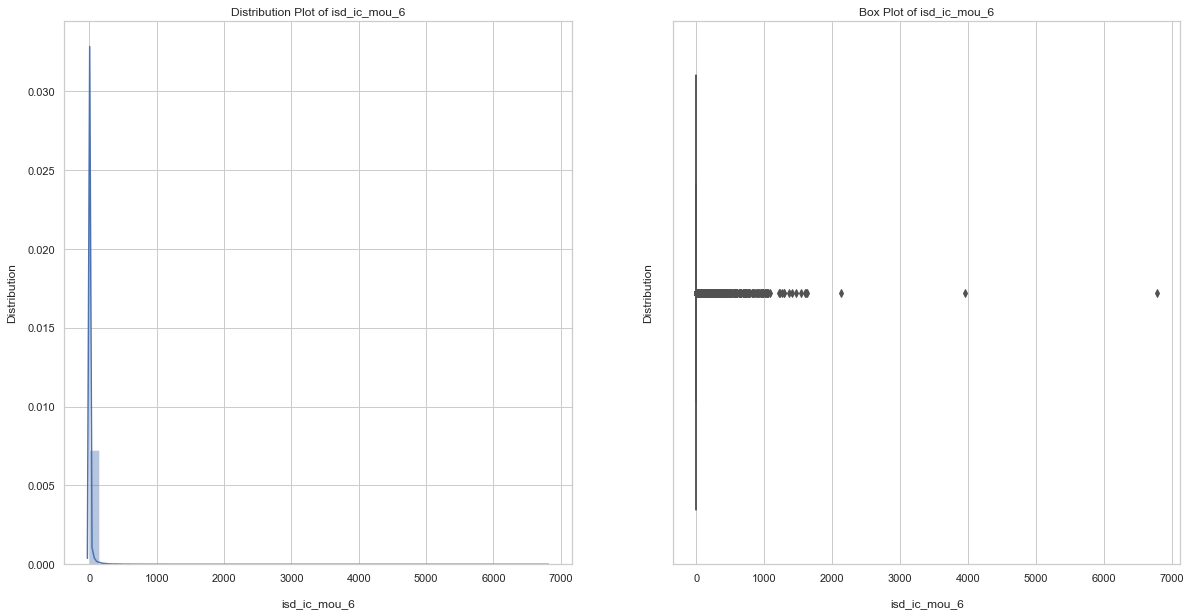

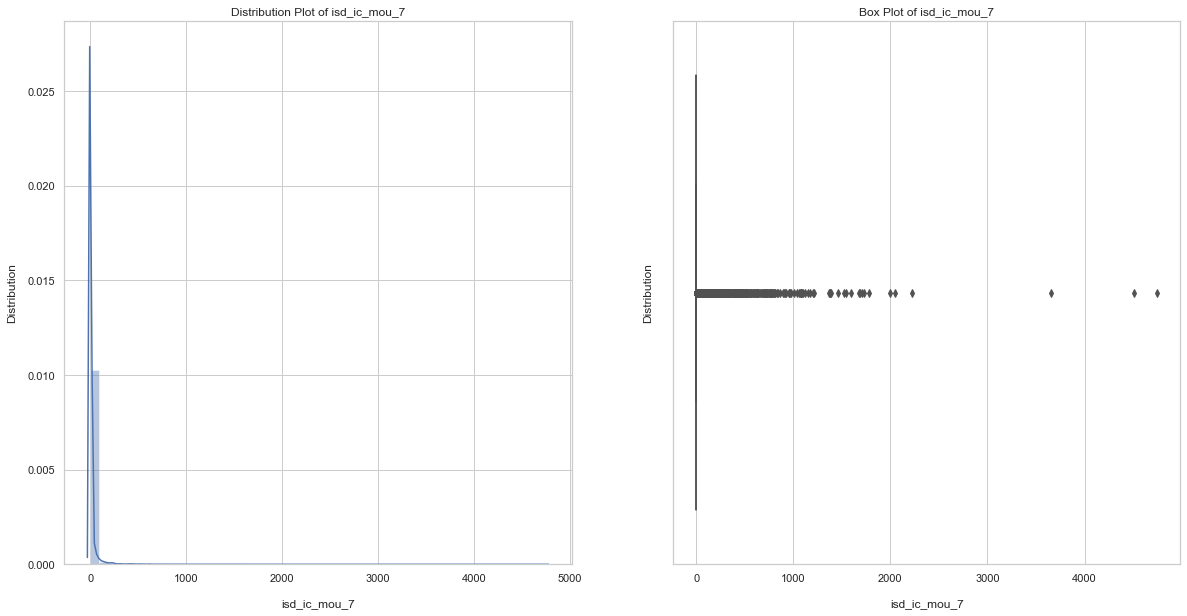

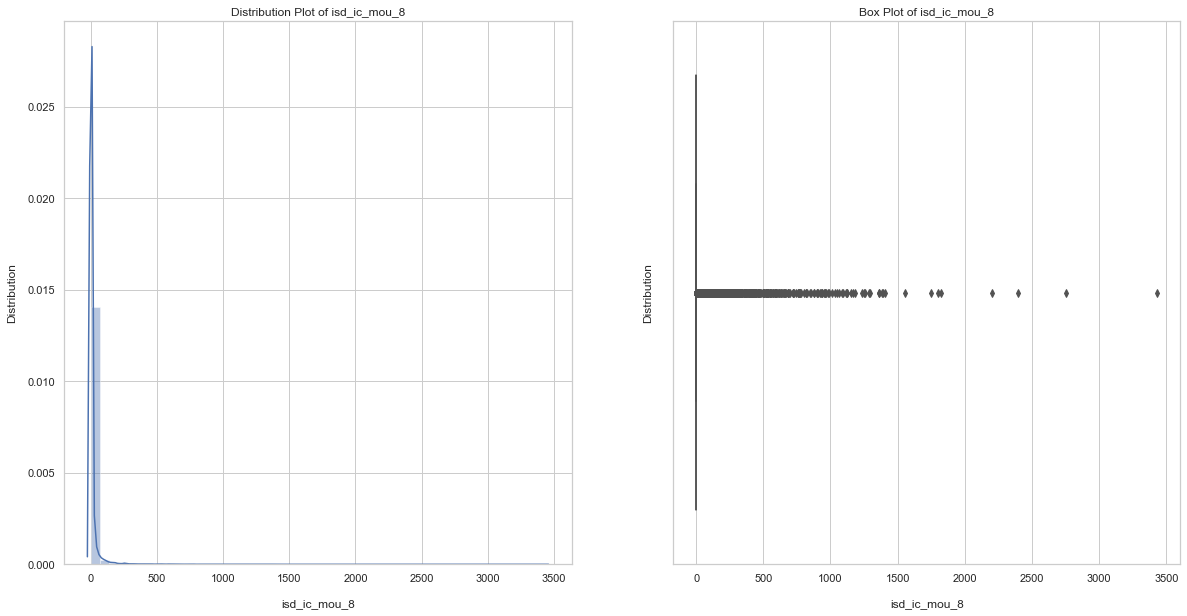

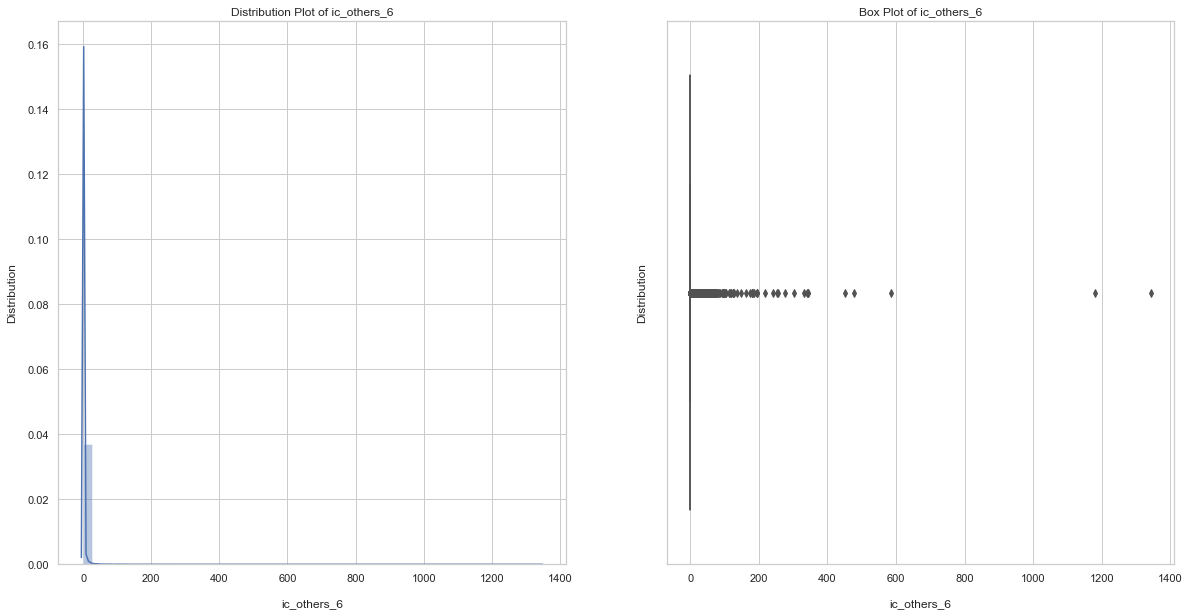

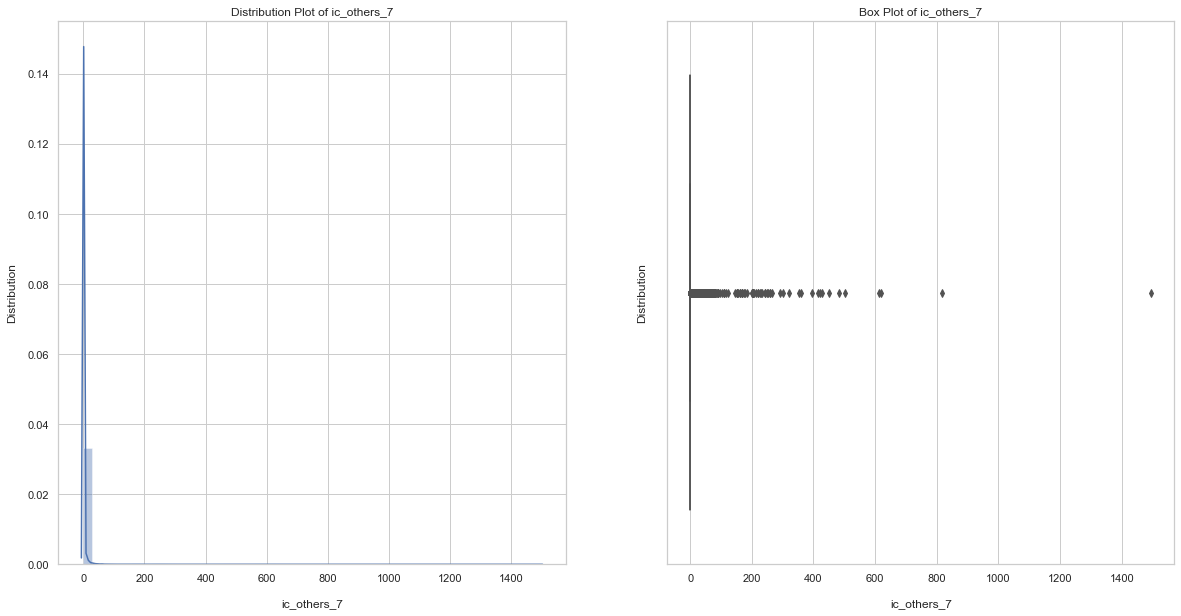

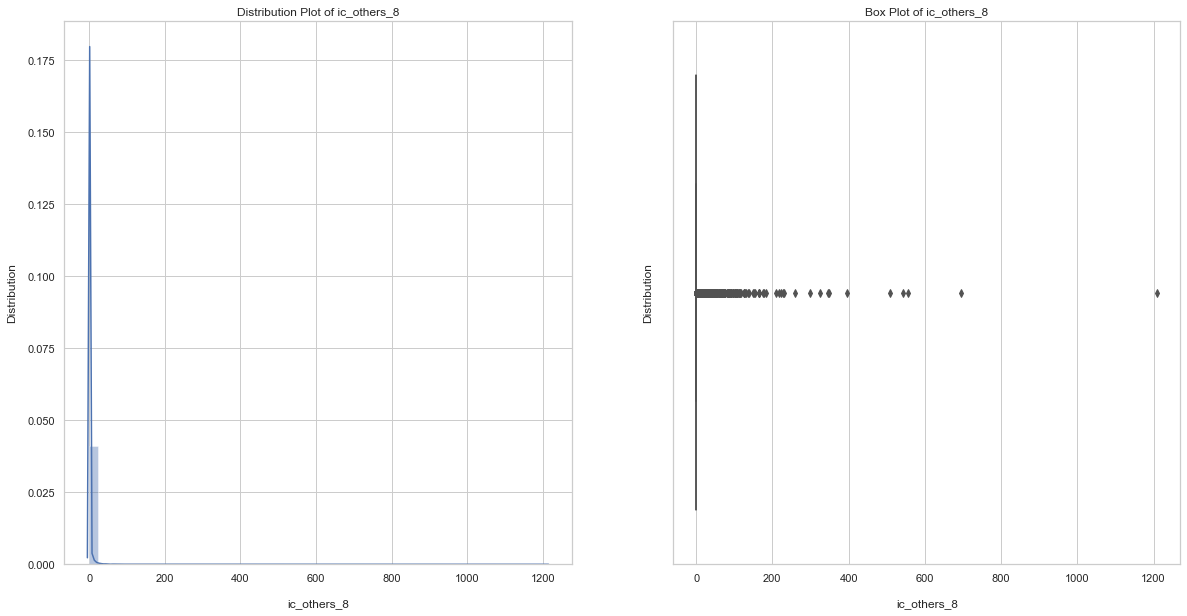

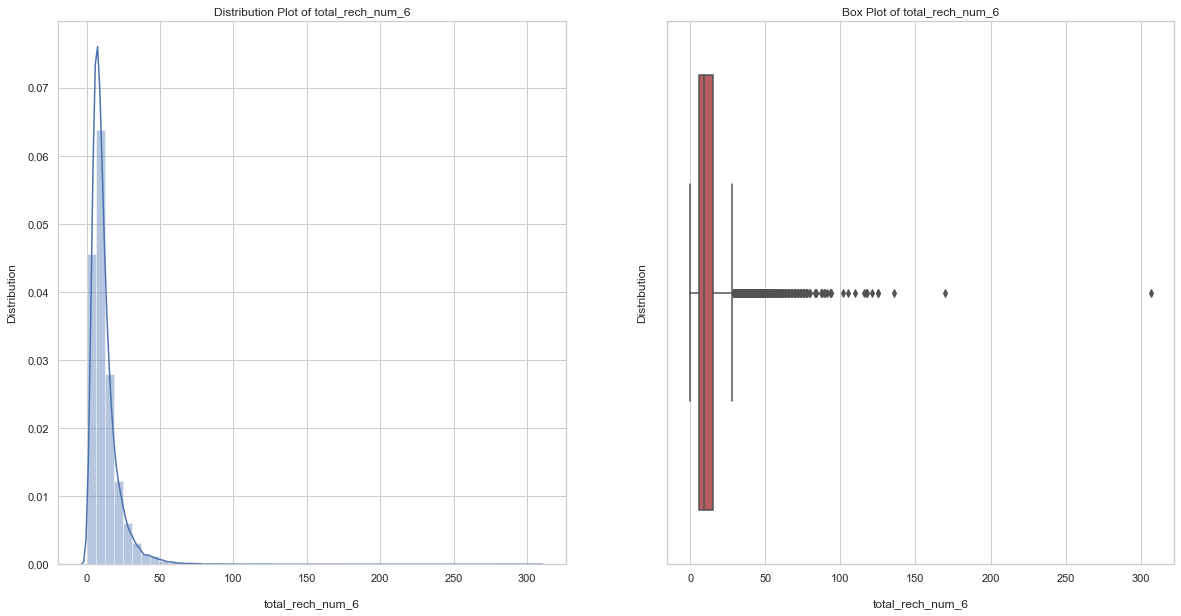

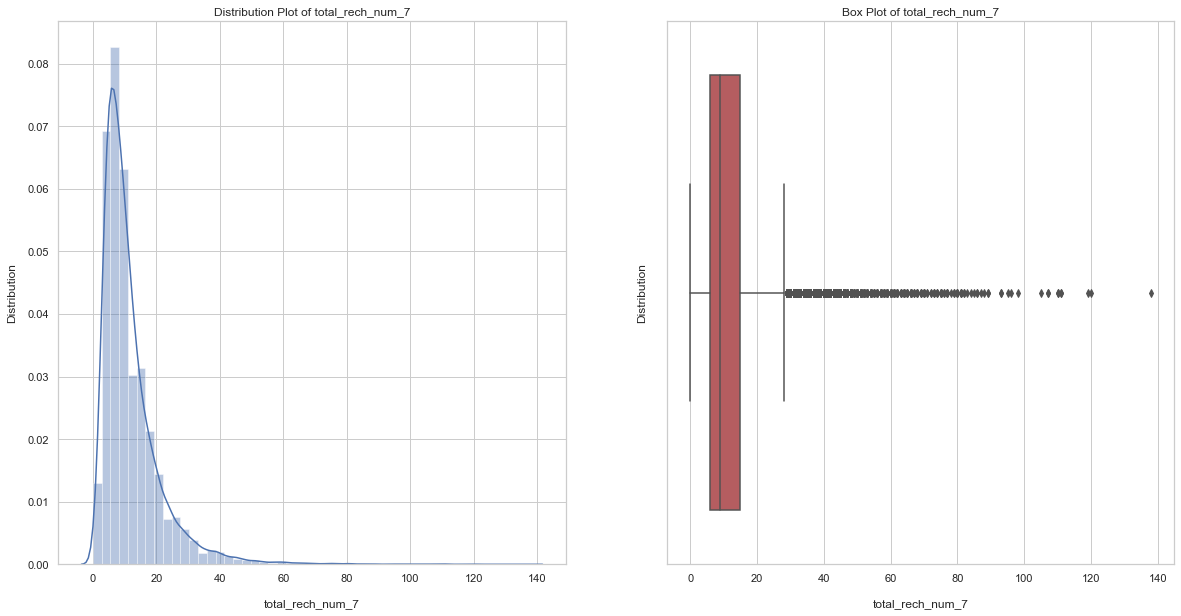

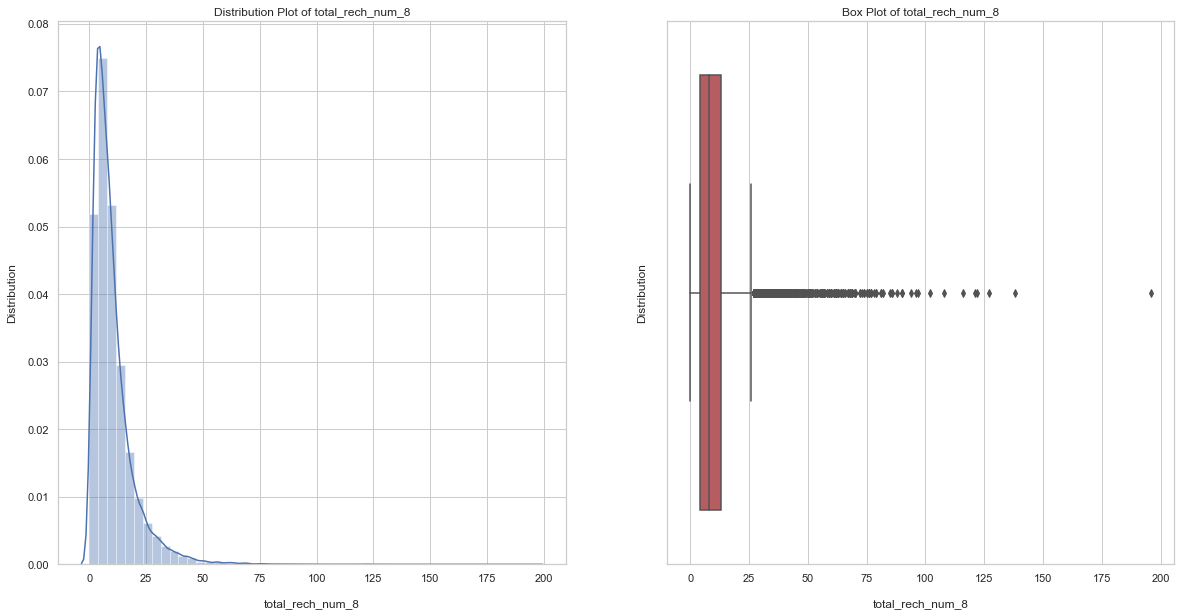

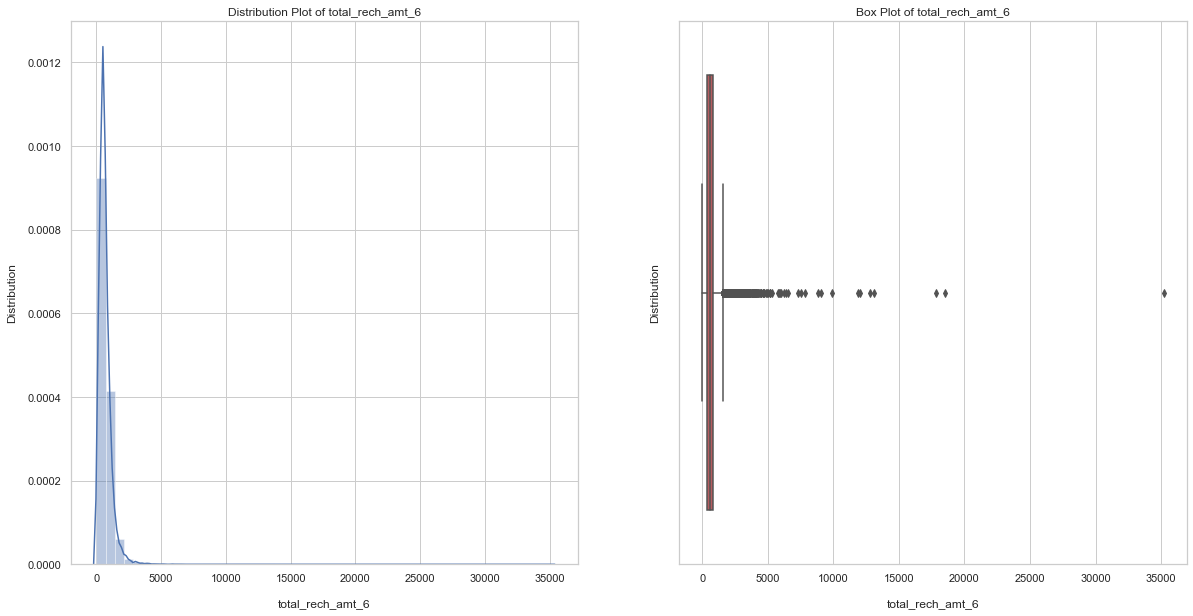

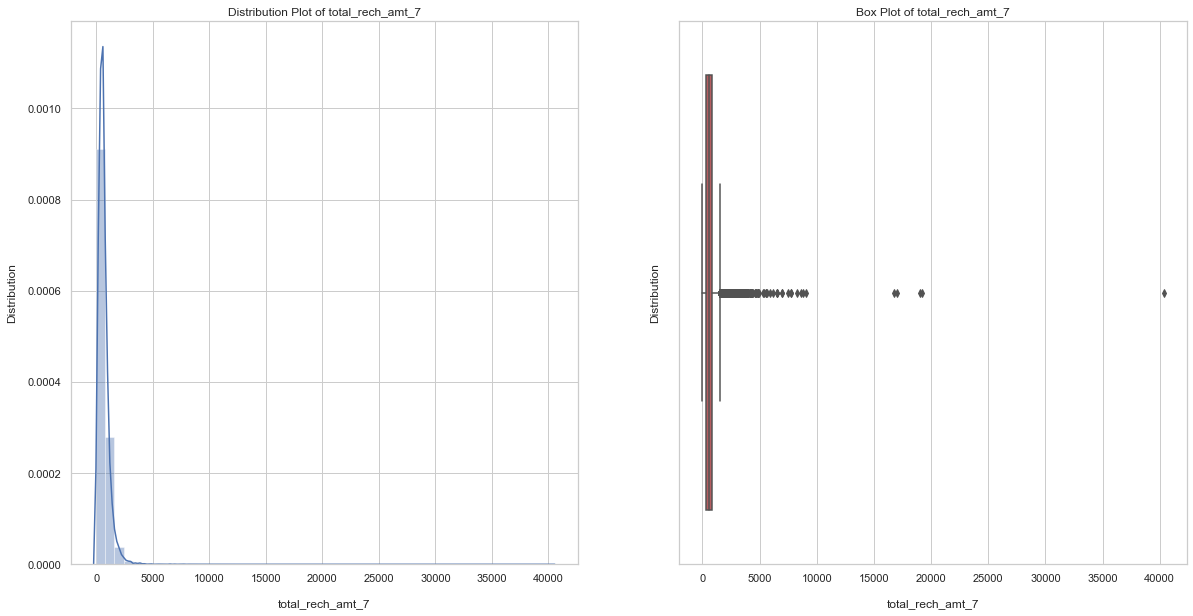

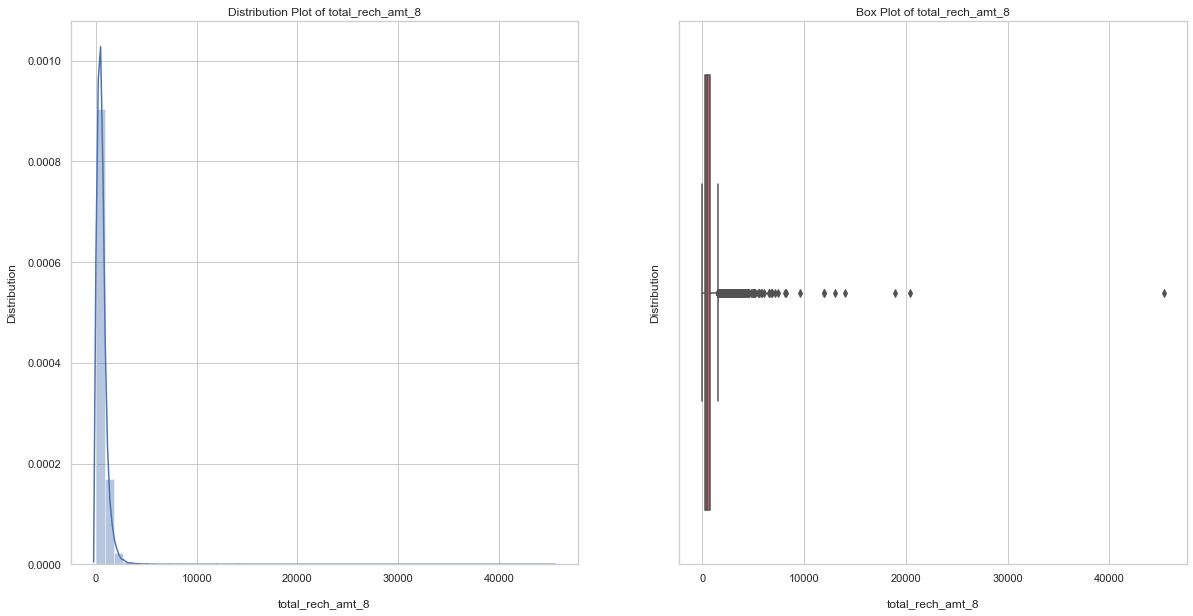

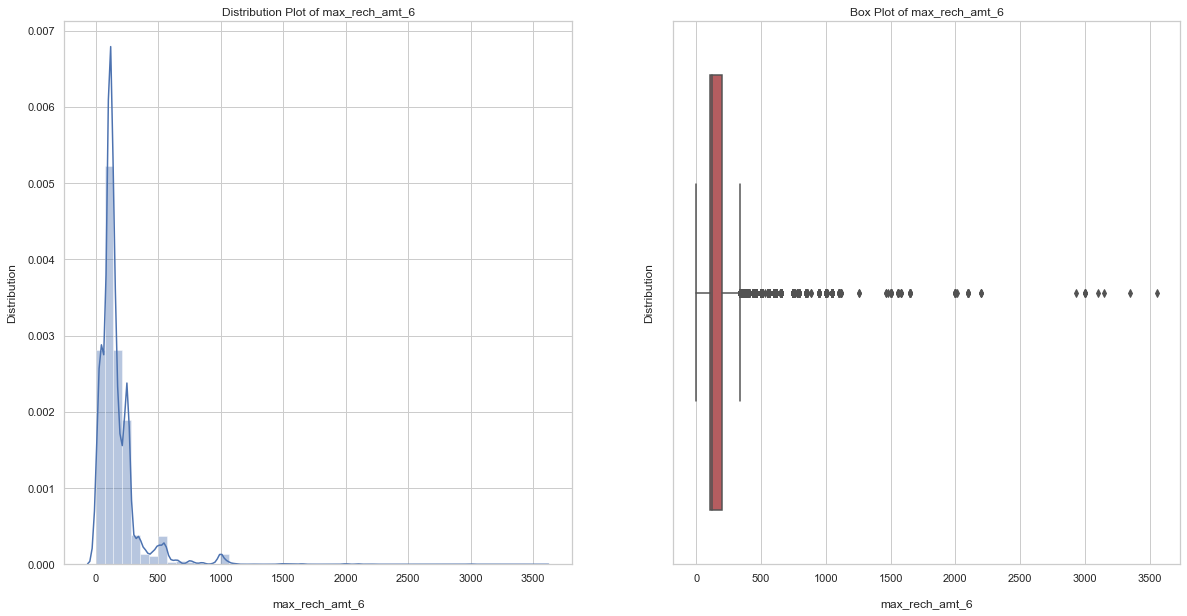

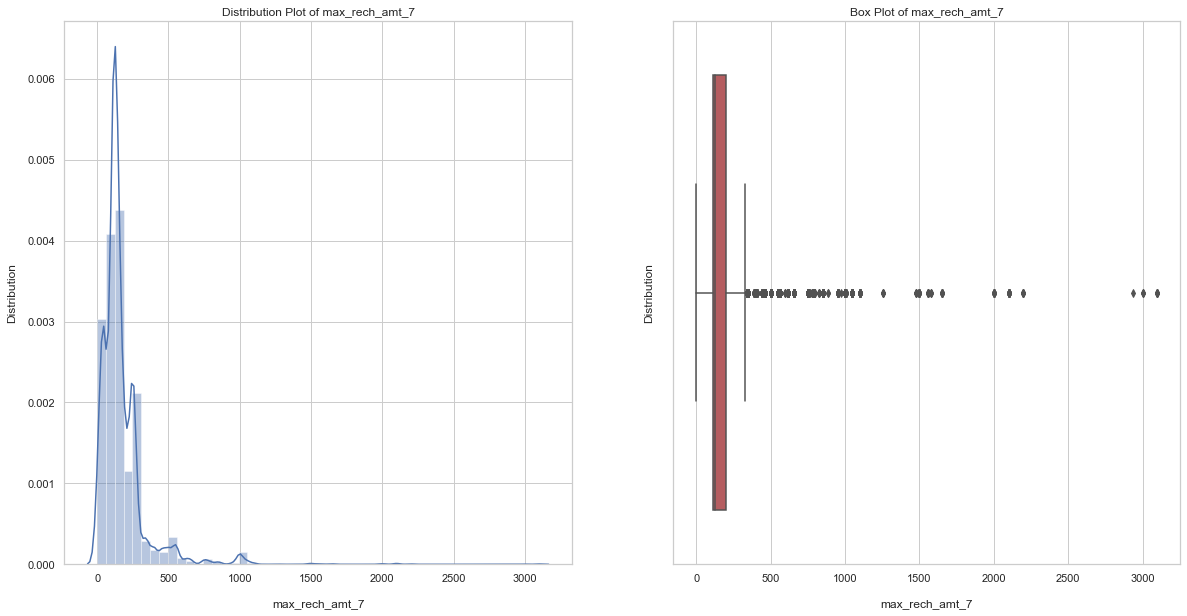

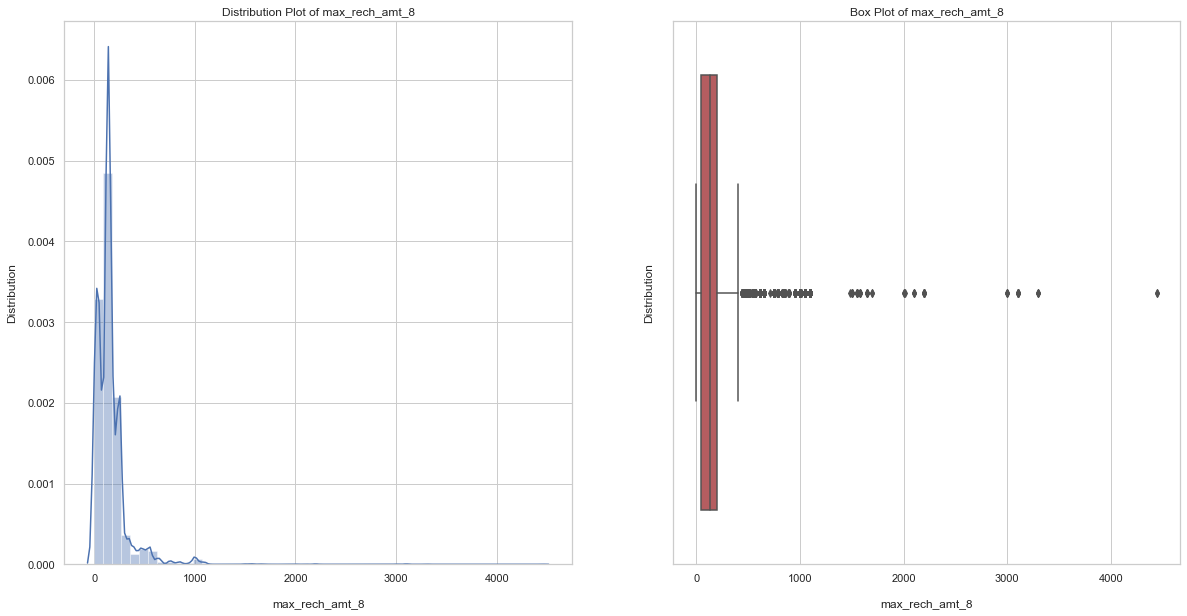

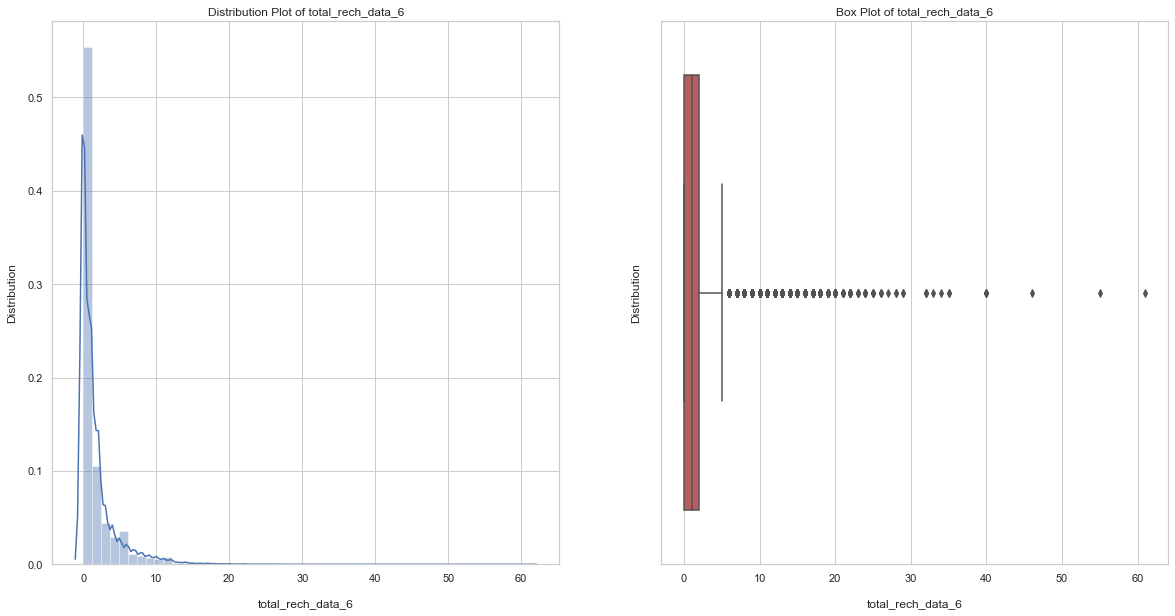

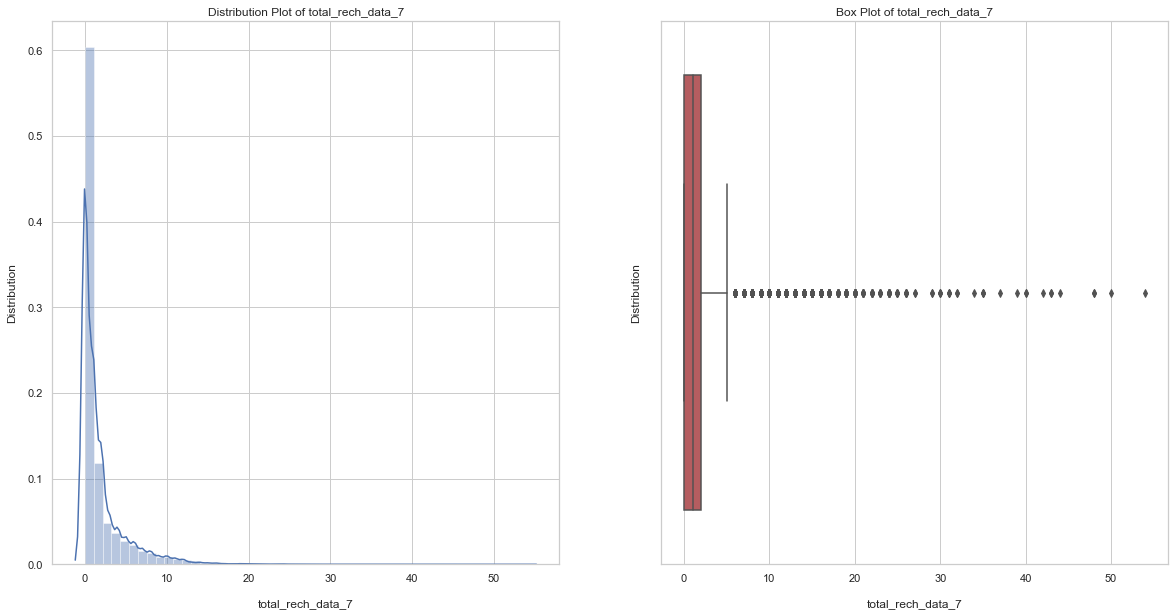

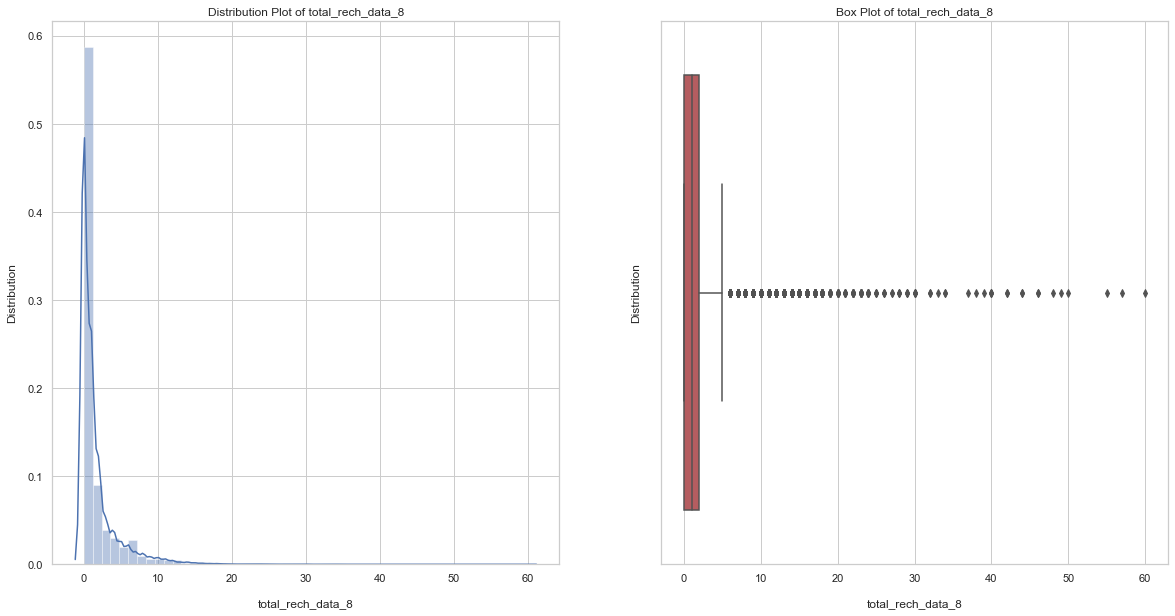

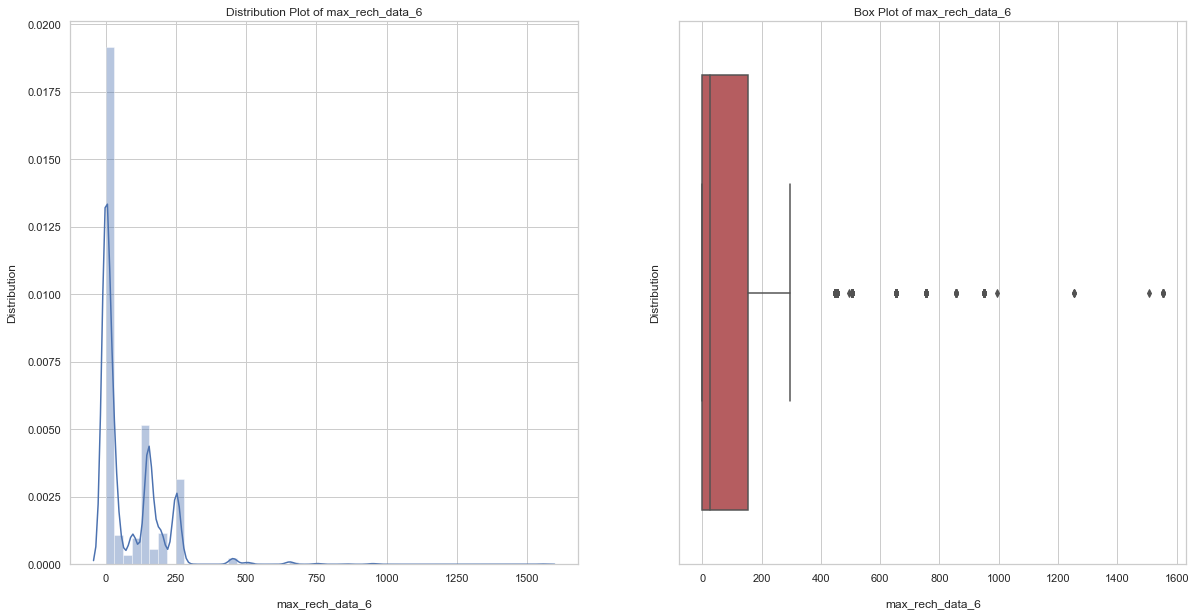

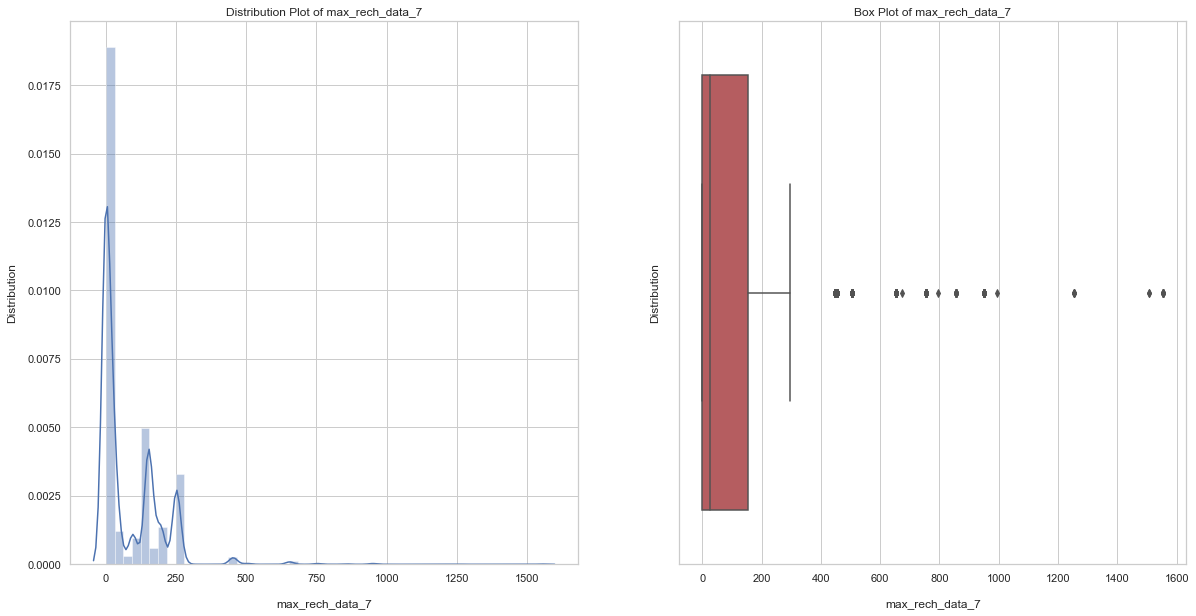

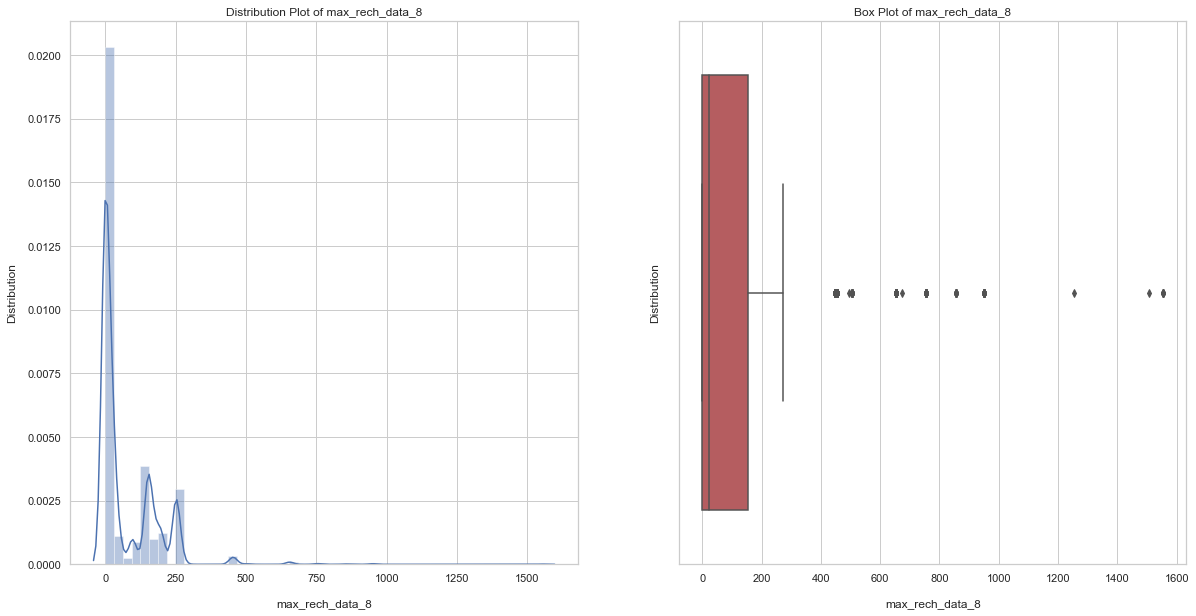

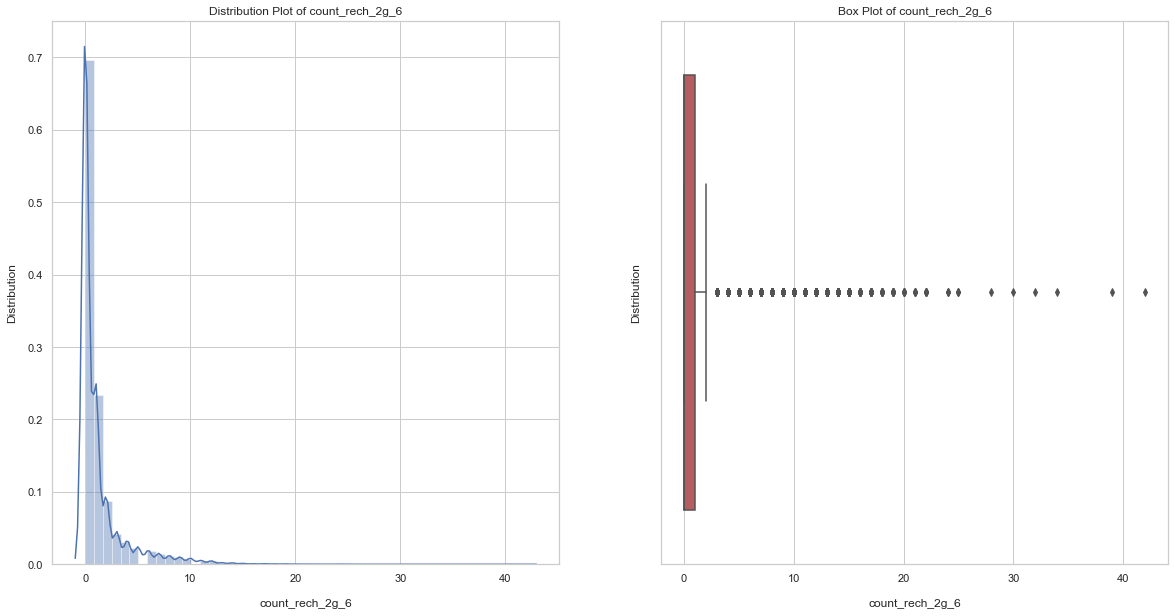

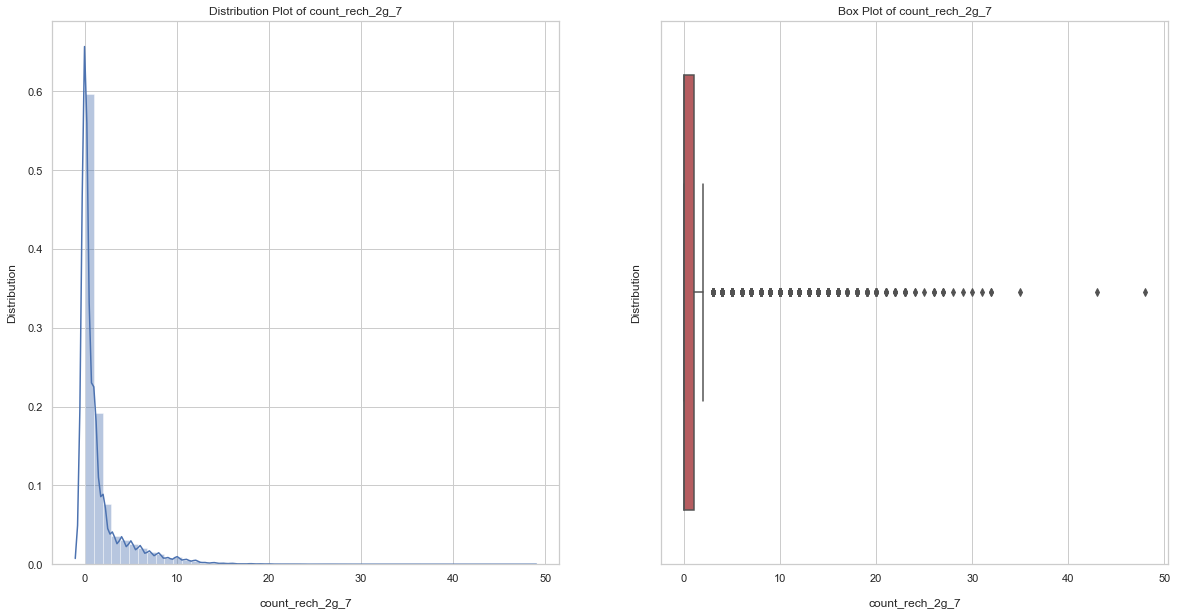

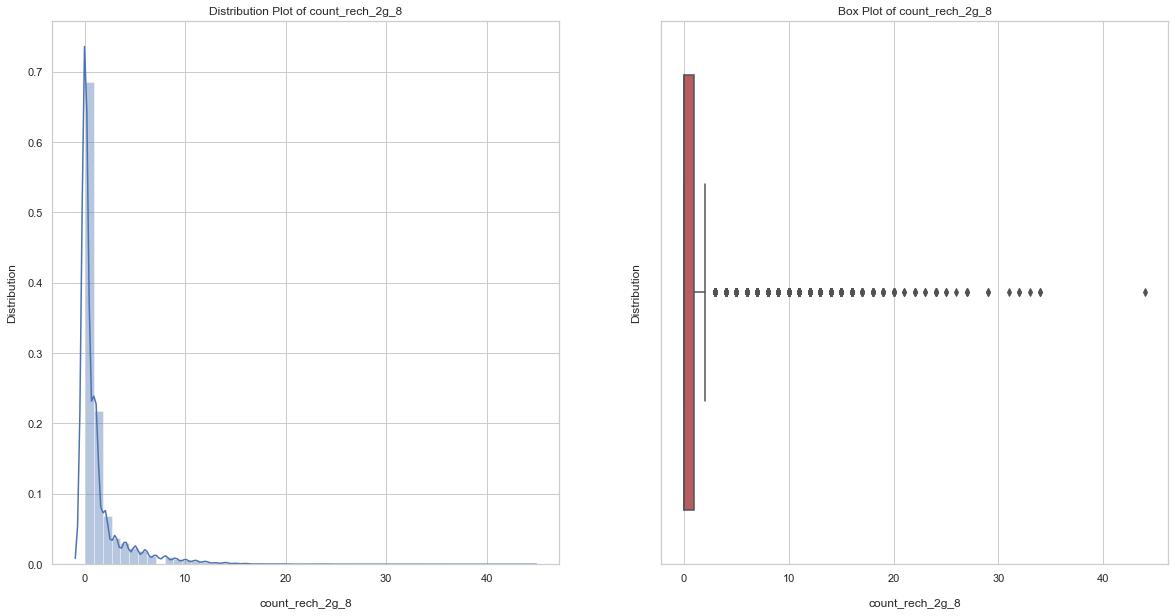

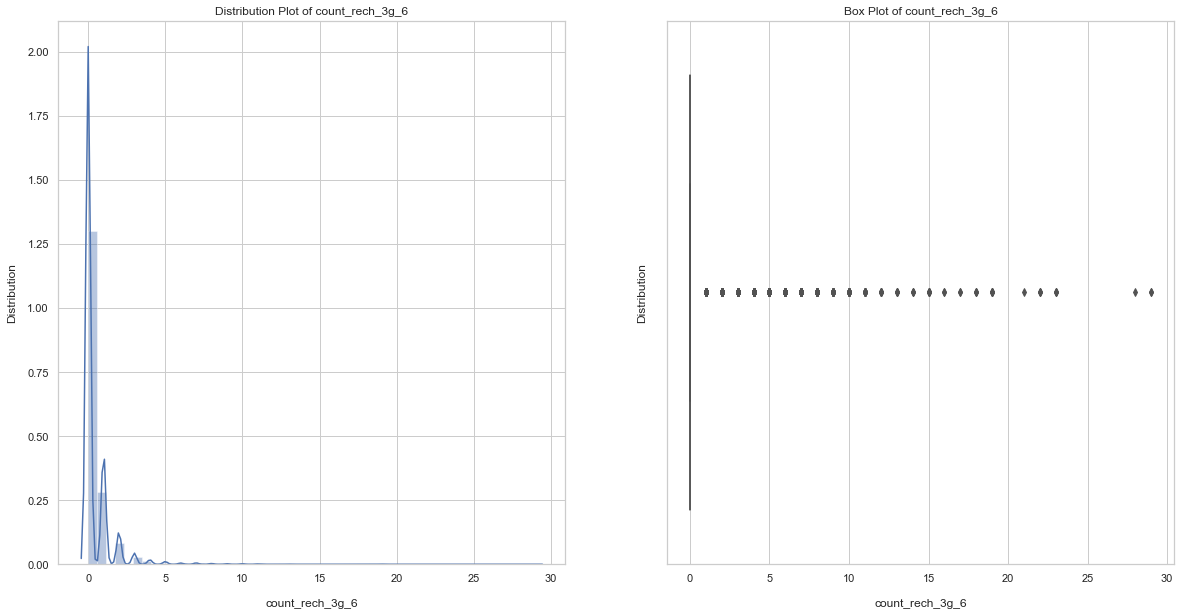

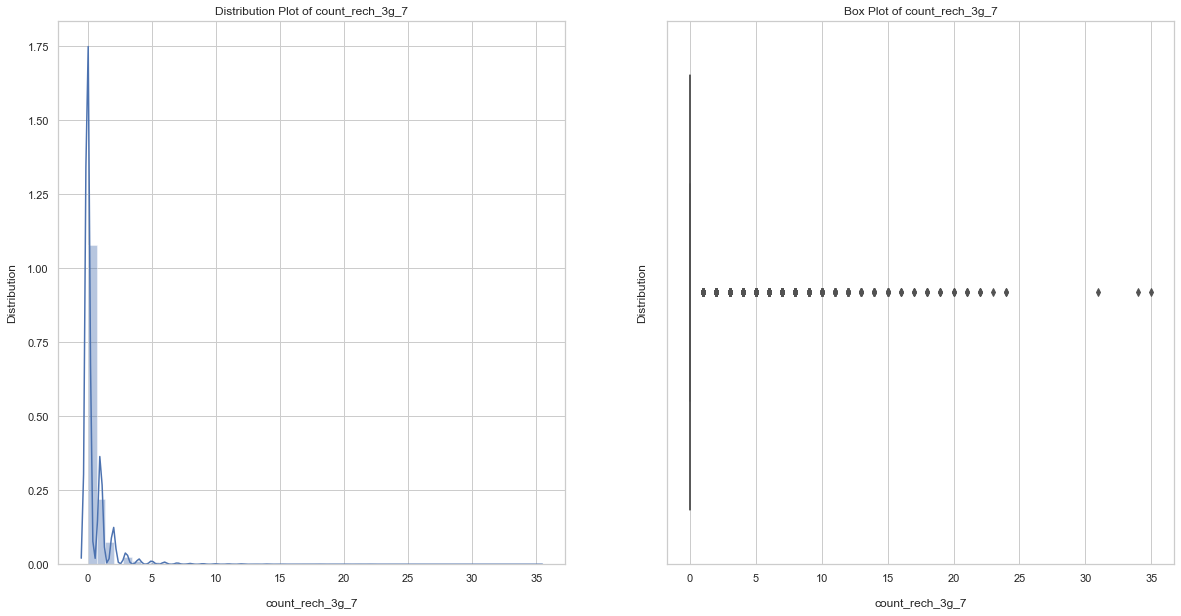

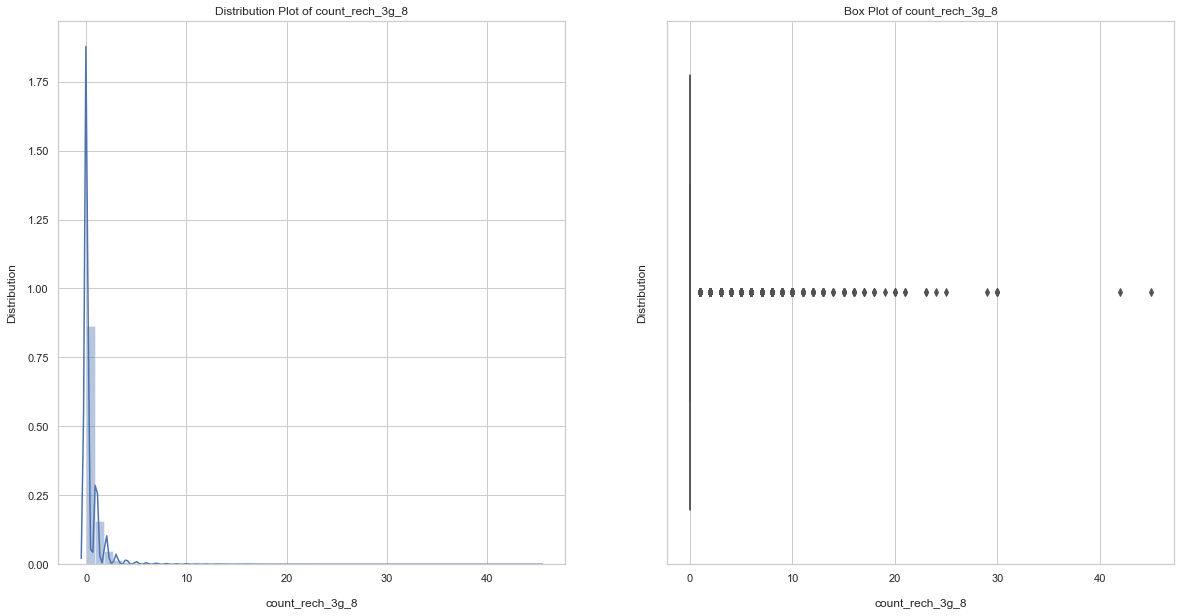

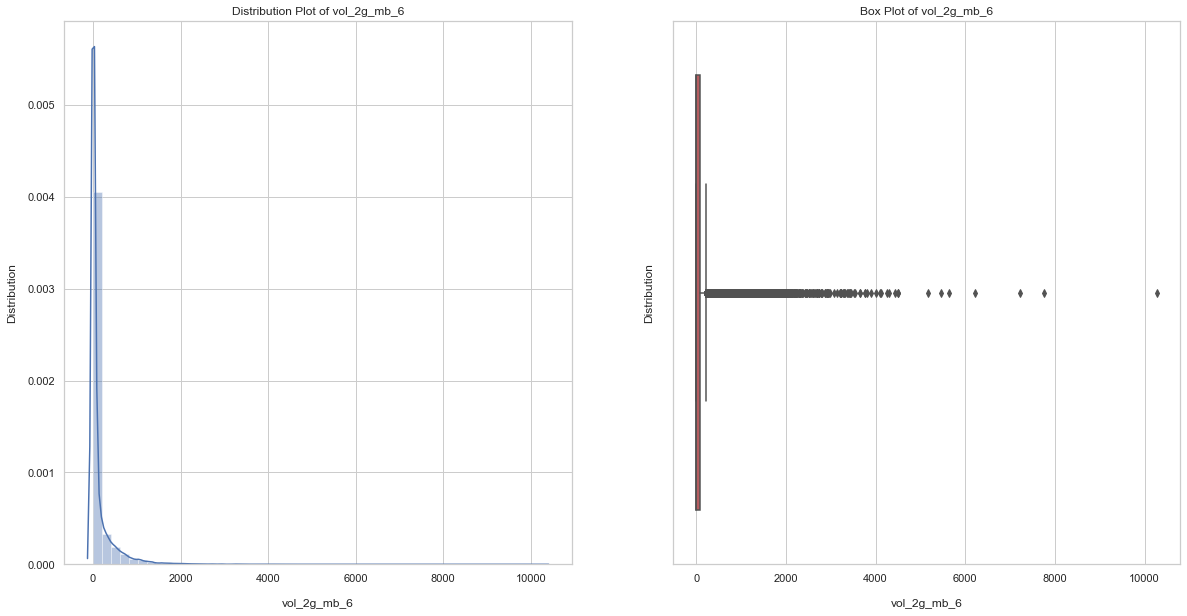

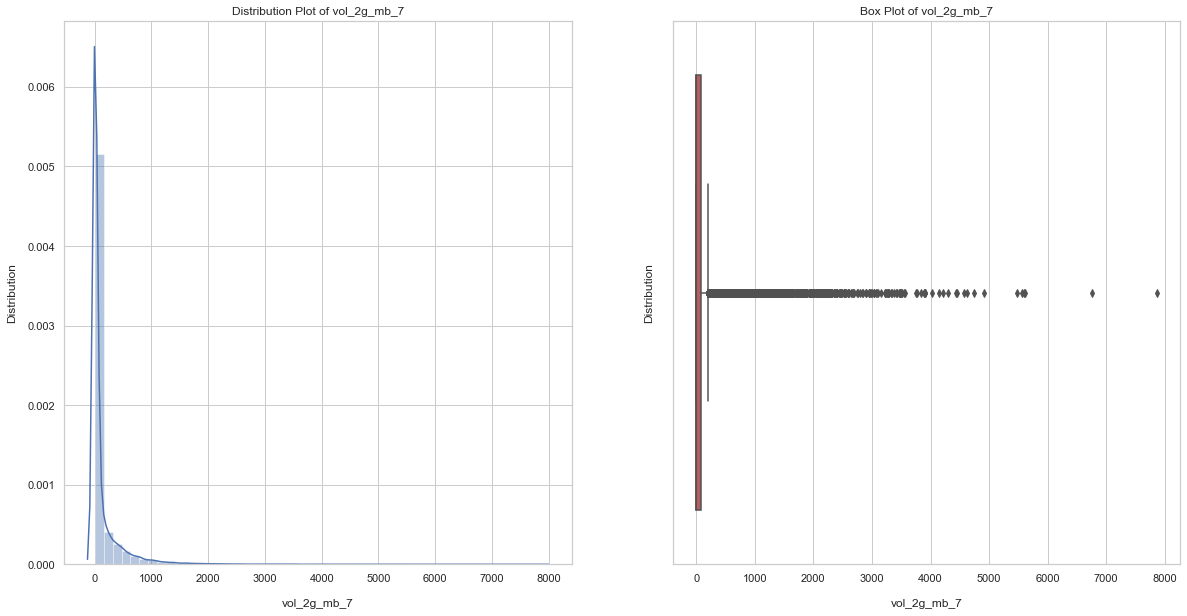

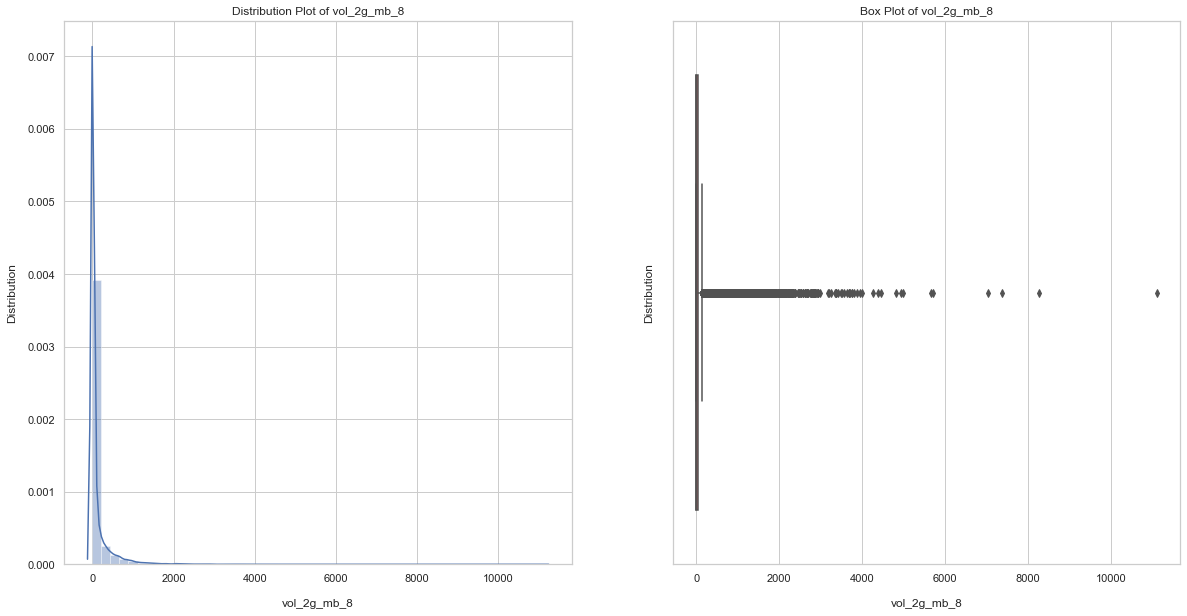

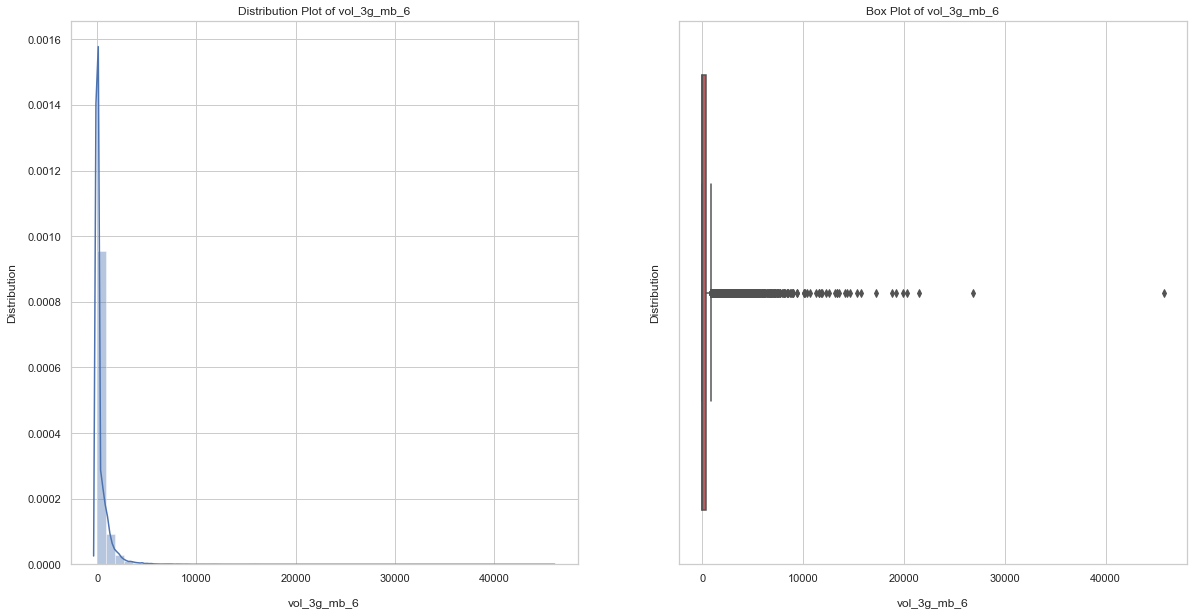

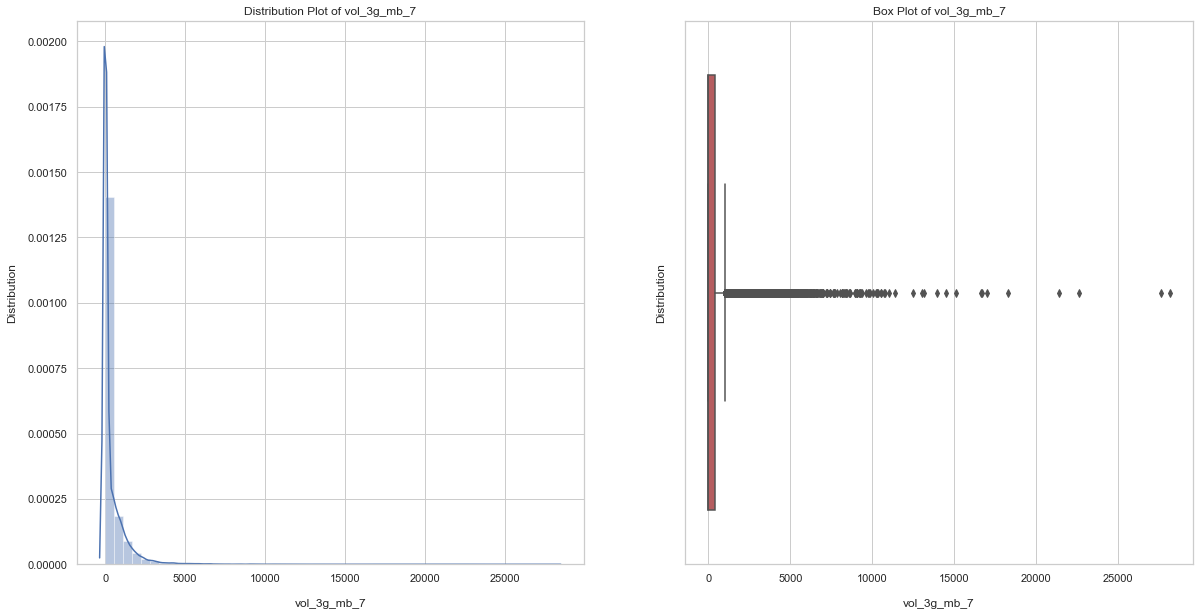

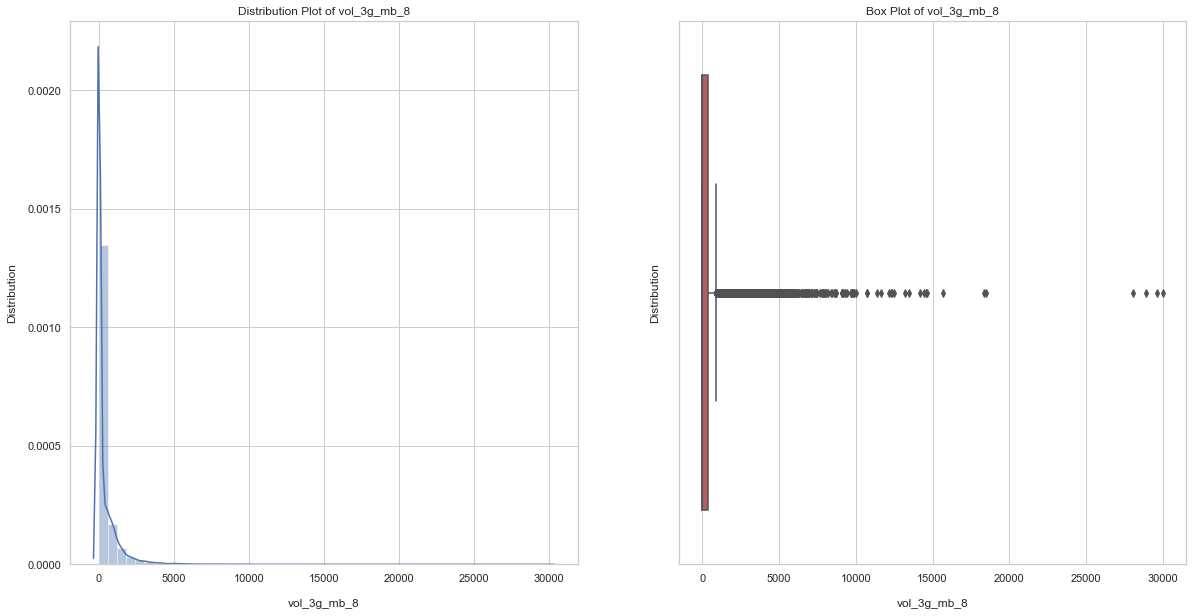

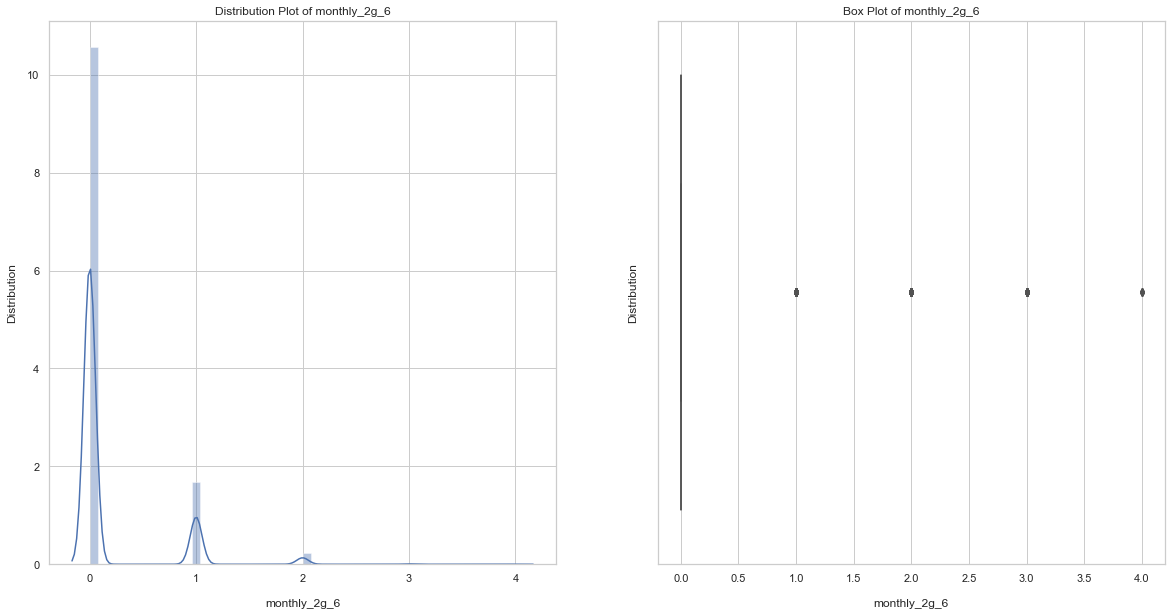

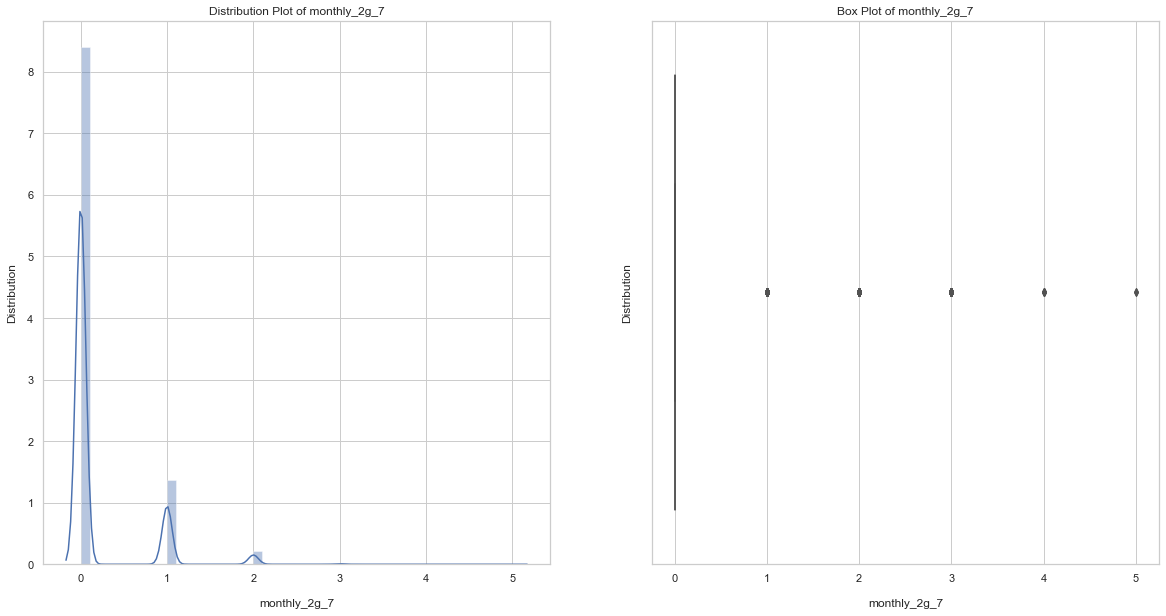

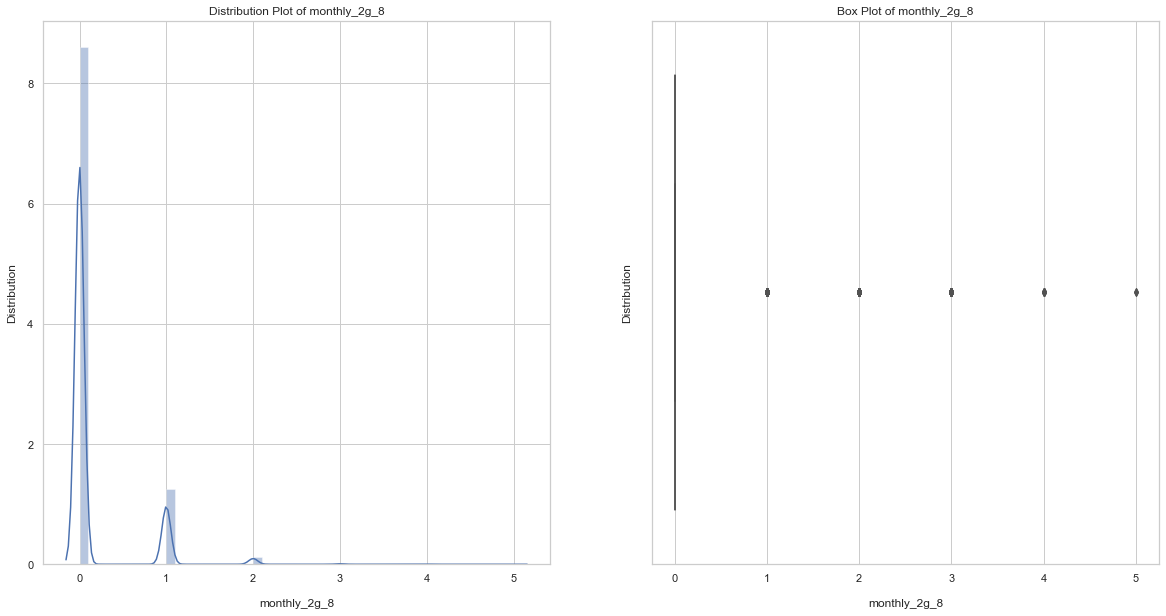

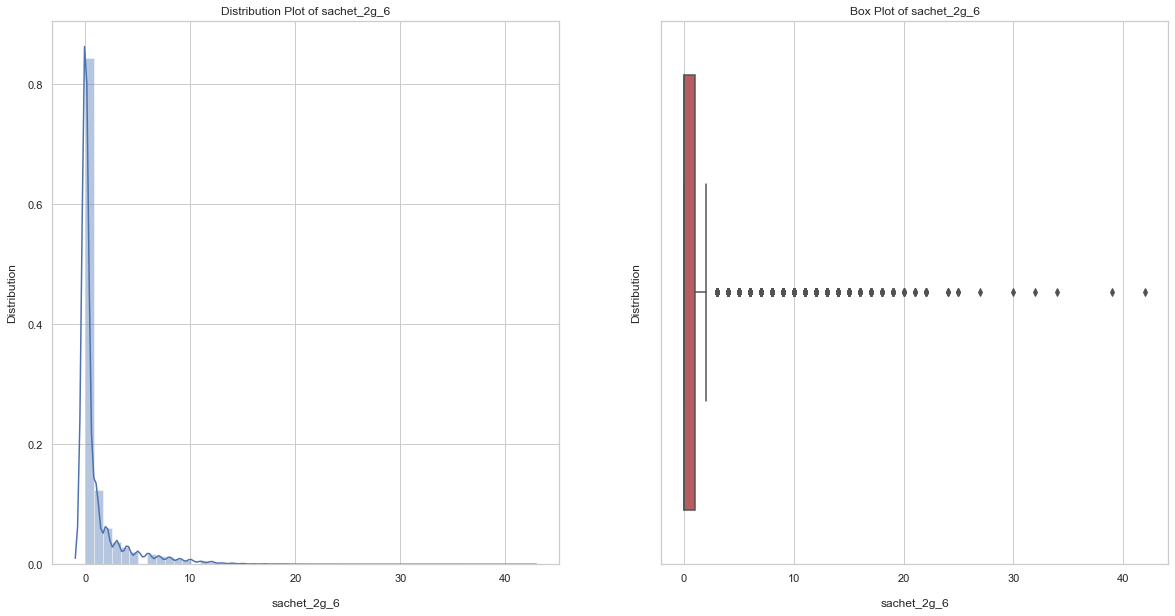

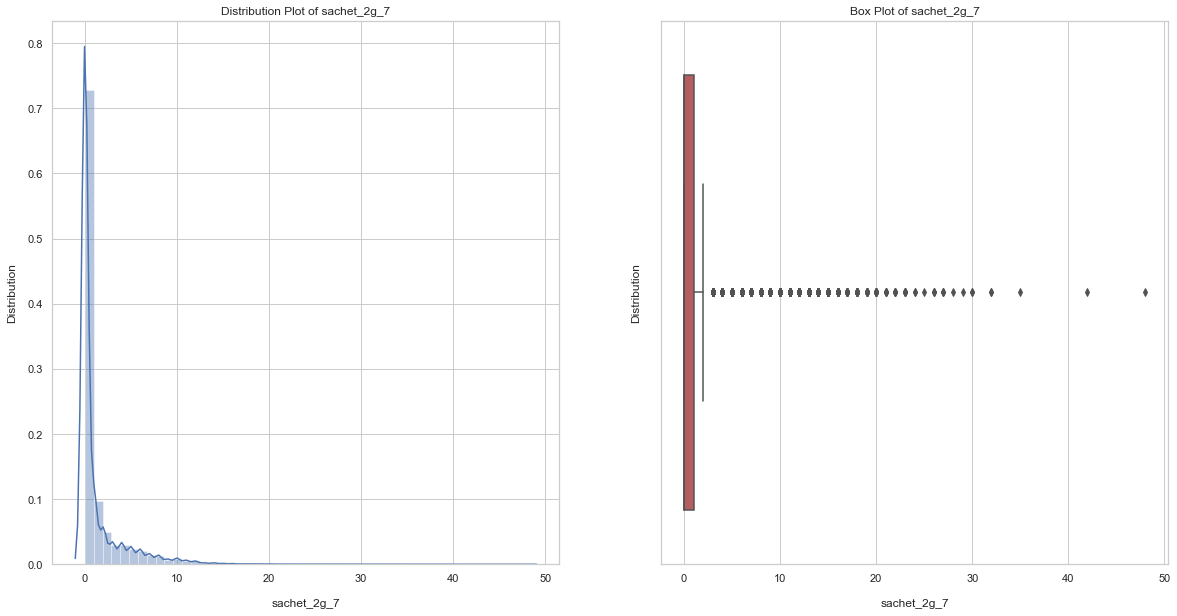

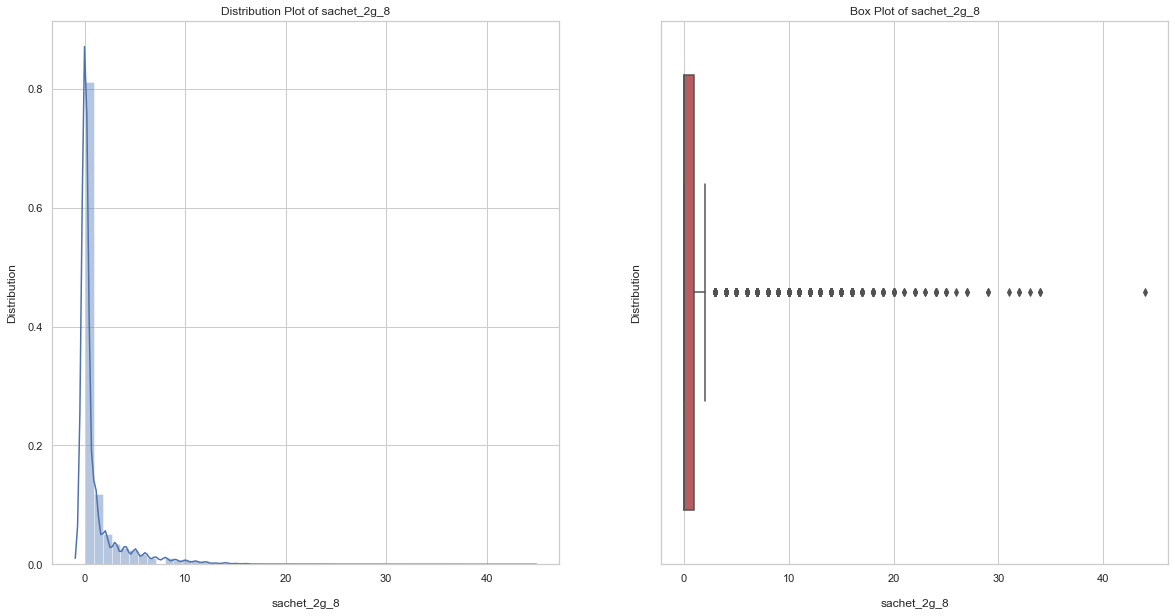

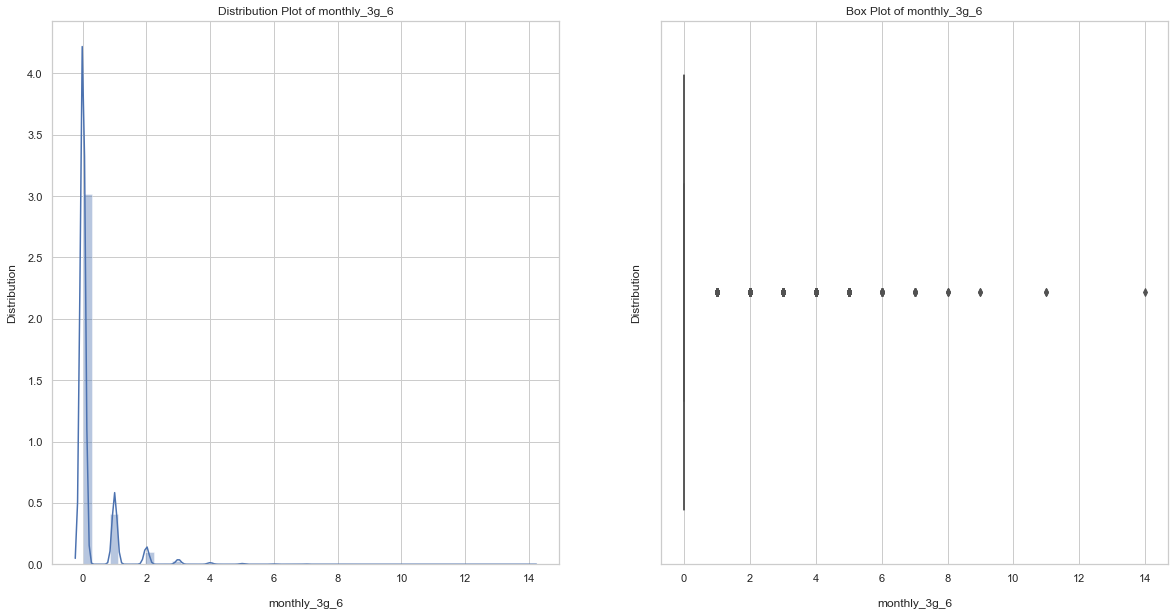

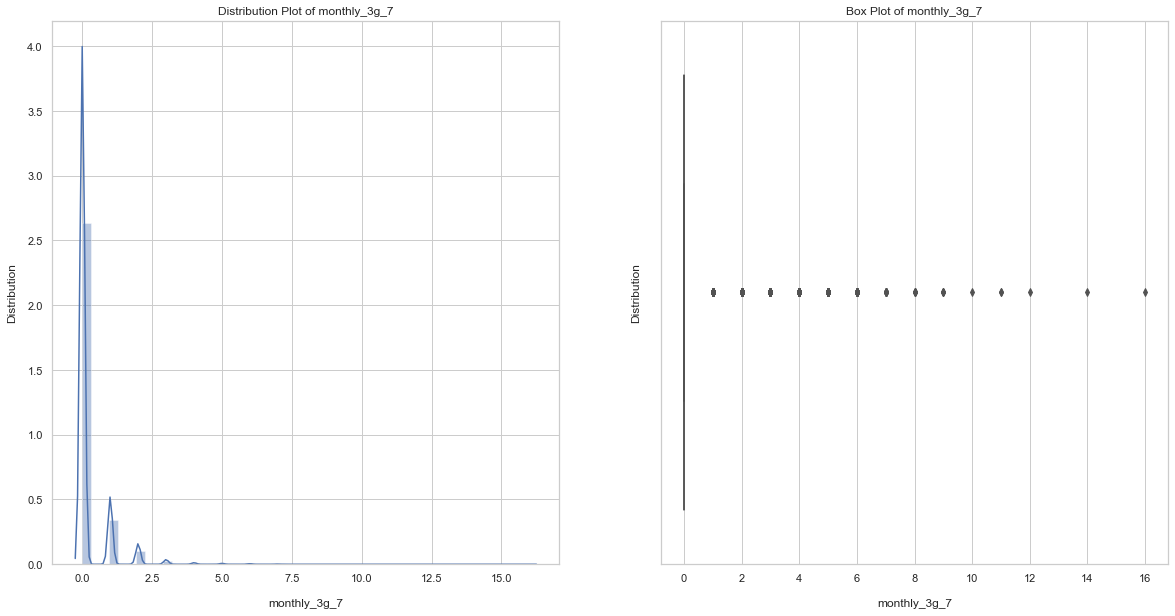

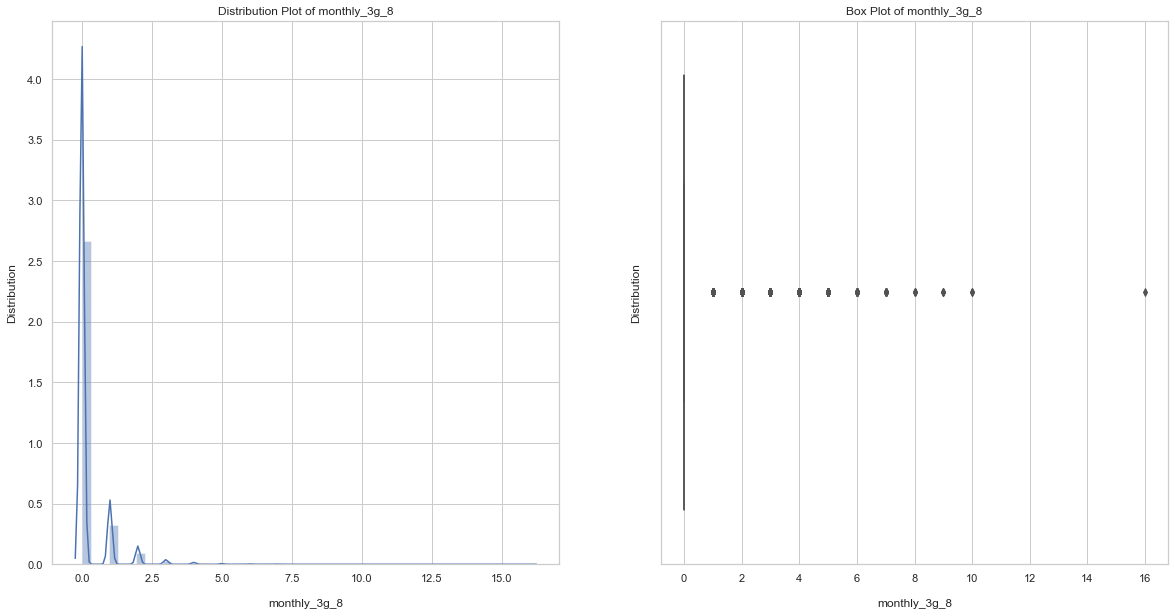

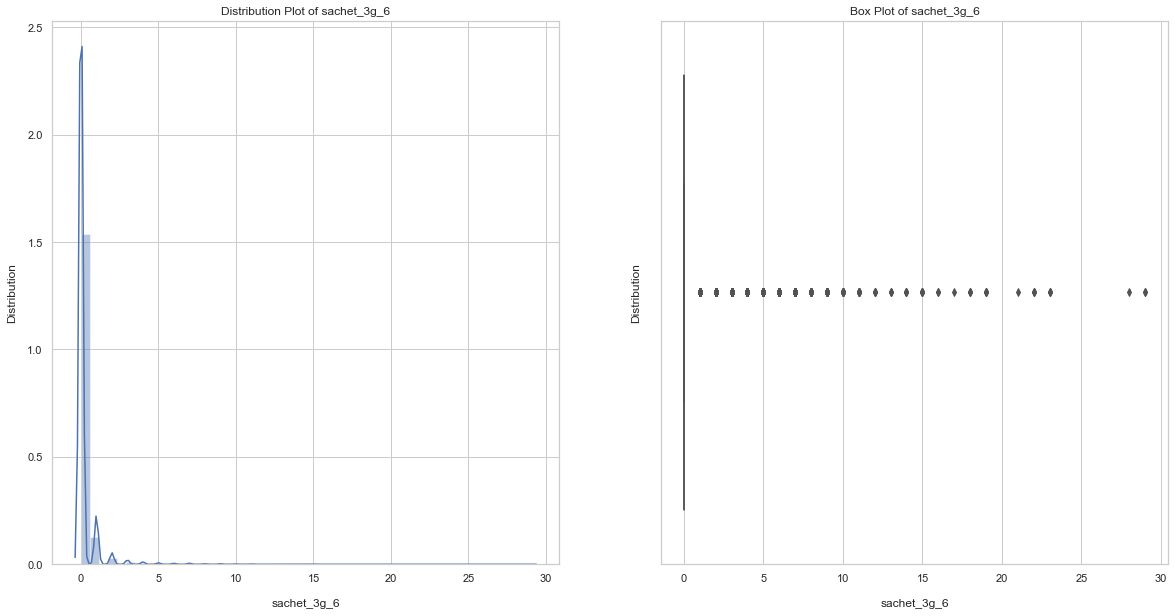

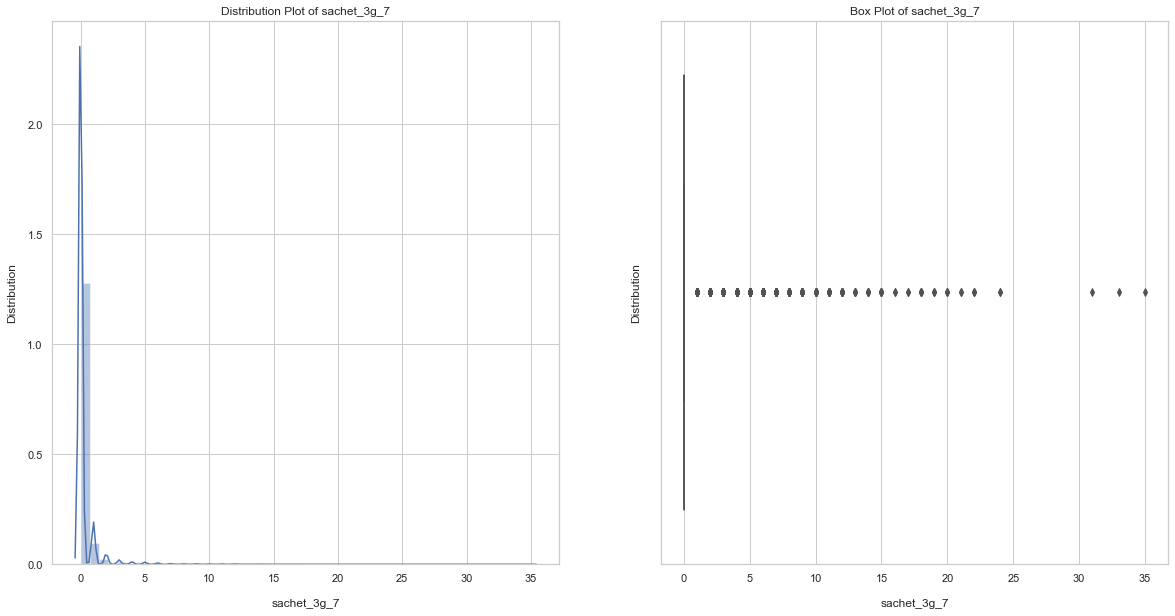

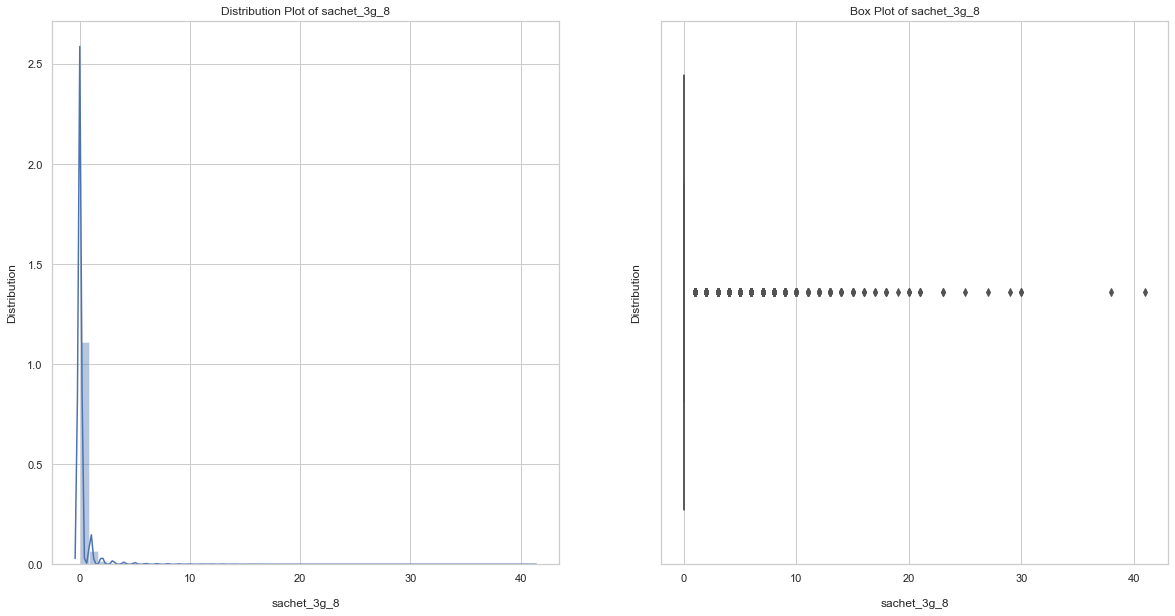

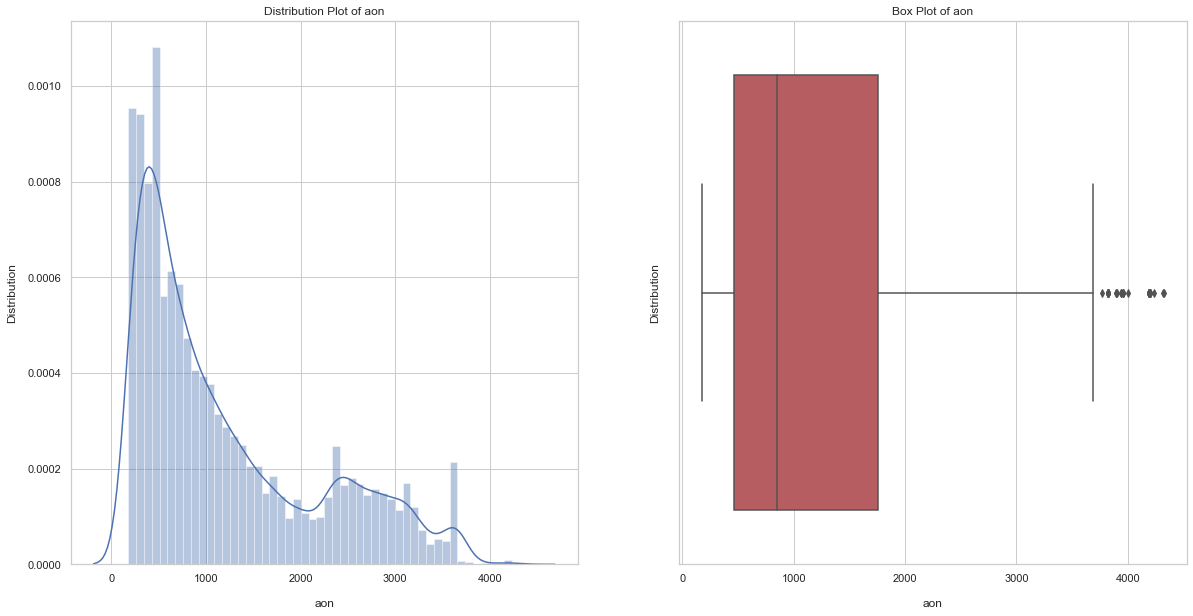

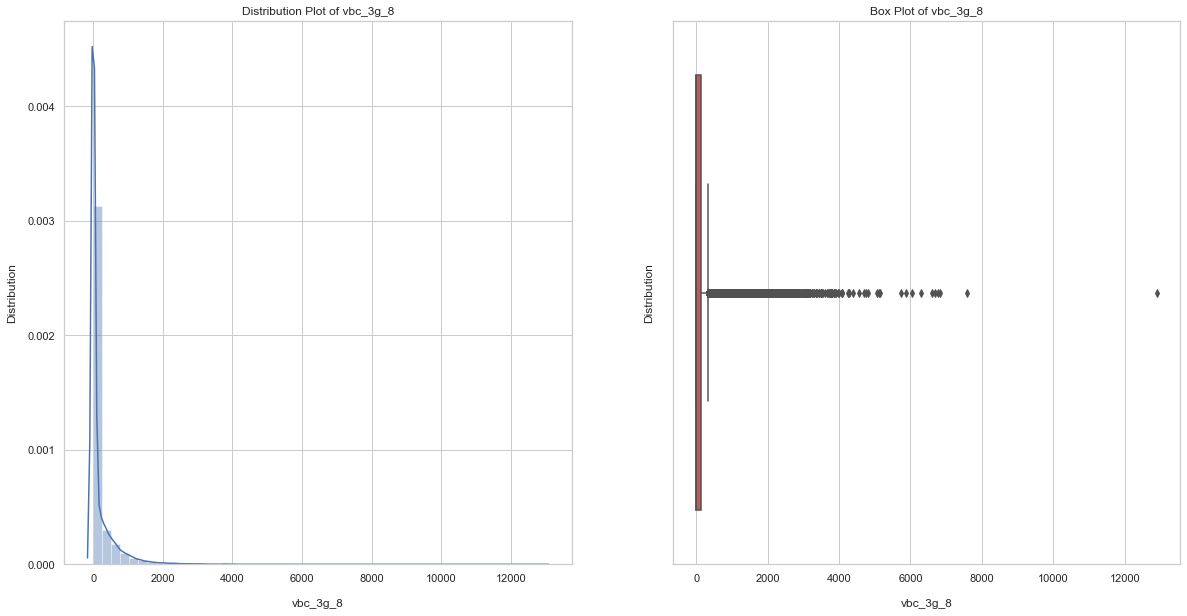

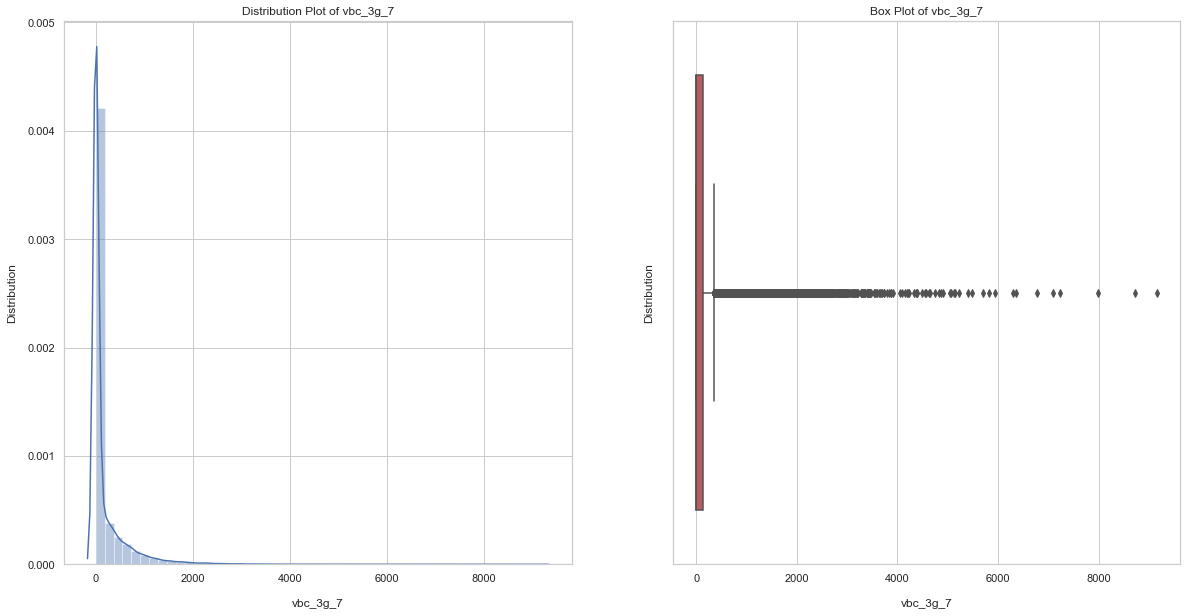

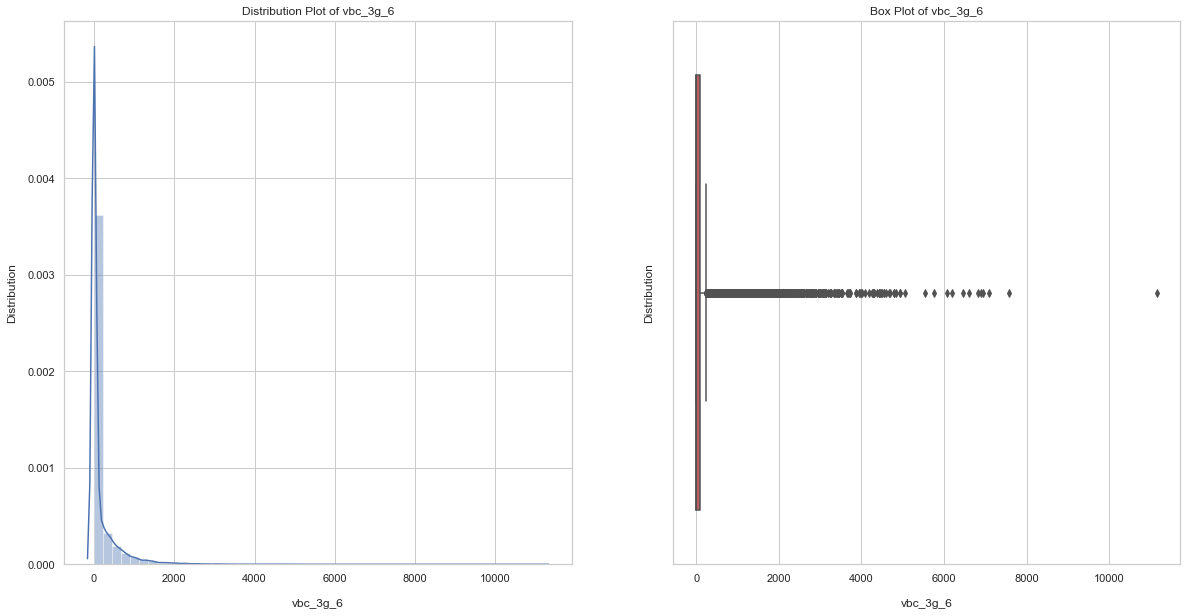

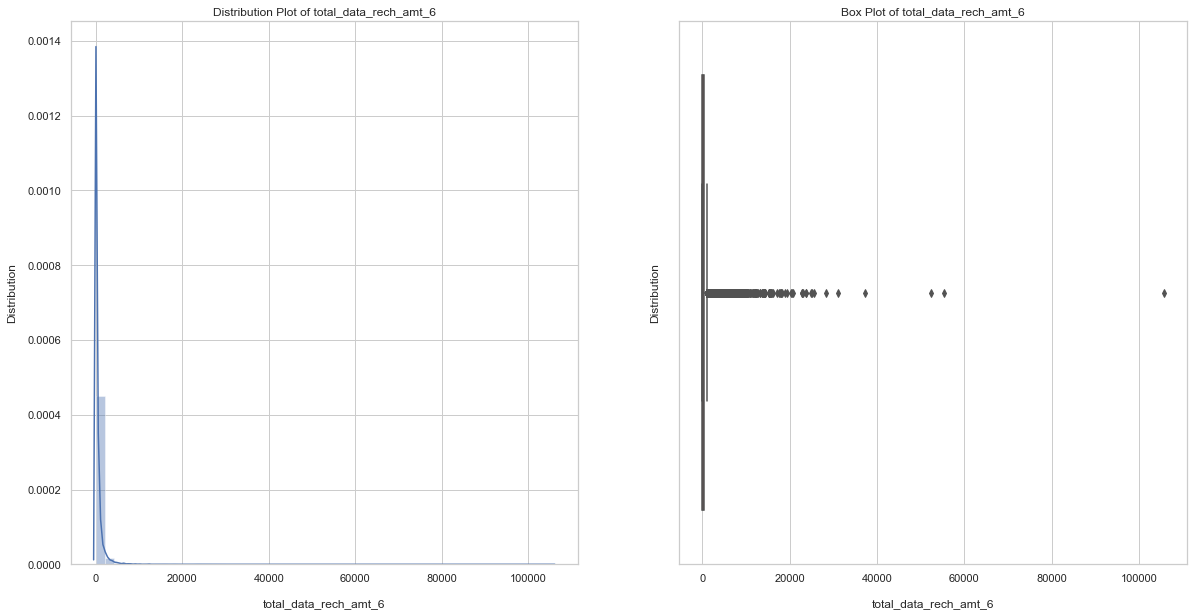

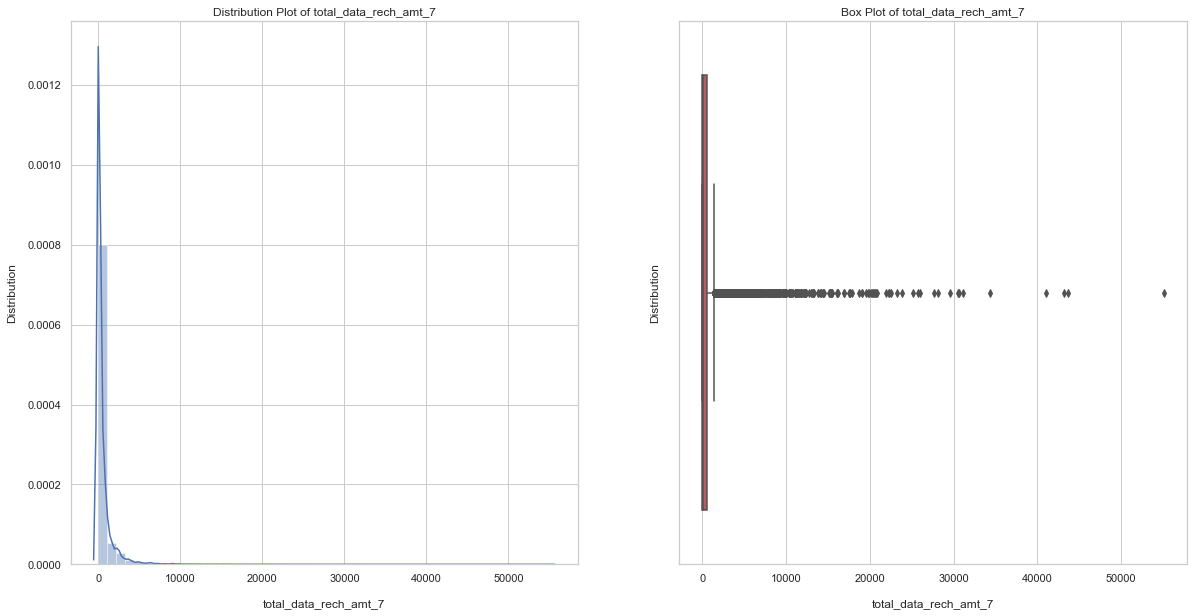

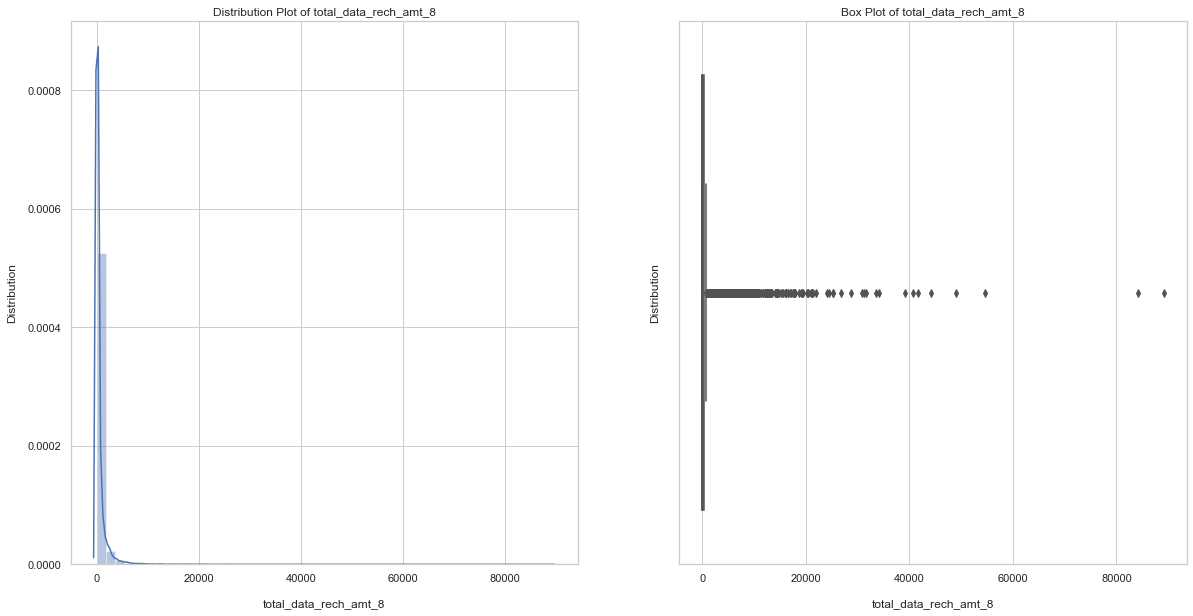

In [54]:

cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for t_col in telecom_data.columns:
    
    if t_col not in cols:
 
        univariate(
                        xlabel = t_col,
                        ylabel = "Distribution",
                        x_axis = t_col,
                        data = telecom_data,
                        wspace = 0.2
        )

        counter += 1

### Bivariate Analysis 

In [55]:
def bivariate(y_axis):
    
    plt.figure(figsize = (20, 15))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel

    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data, showfliers = False)
   
    plt.title(title_1)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(y_axis + "_6", labelpad = 10)

    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data, showfliers = False)
    plt.title(title_1)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(y_axis + "_7", labelpad = 10)

    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_data, showfliers = False)
    plt.title(title_1)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(y_axis + "_8", labelpad = 10)
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

TypeError: can only concatenate list (not "str") to list

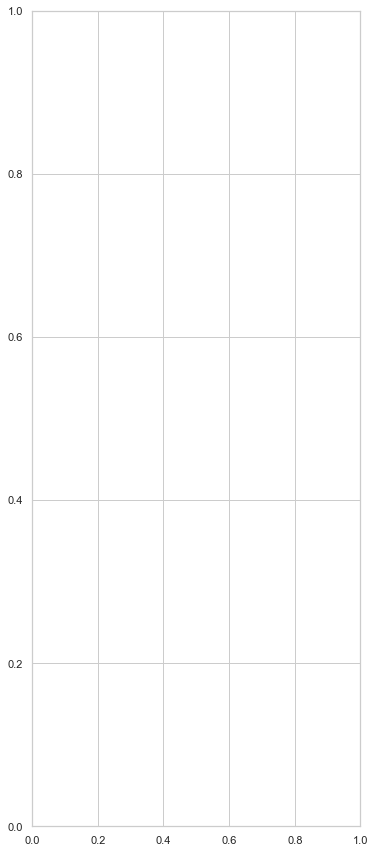

In [56]:

cols = ['arpu', 'onnet_mou', 'offnet_mou', 
                 'total_og_mou', 'total_ic_mou', 'total_rech_num', 'total_rech_amt', 'total_rech_data', 'vol_2g_mb', 'vol_3g_mb', 'vbc_3g', 'total_data_rech_amt']
counter = 1

for t_col in cols:
 
        bivariate(
                        y_axis = cols
        )

        counter += 1


In [ ]:
telecom_data.corr()


In [ ]:
plt.figure(figsize = (60, 60))
sns.heatmap(telecom_data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

Above correlation matrix depicts some highly correlated features

During Principal Component Analysis some of the features will get automatically dropped


### Feature Engineering
